# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Here we implement a standardized framework for optimizing the income from work and from the Finnish Unemployment Insurance scheme. Unemployment scheme is implemented as an environment in gym_unemployment.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=10_000

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.00196  |
| fps                | 1337     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 14.6     |
| total_timesteps    | 0        |
| value_loss         | 113      |
---------------------------------
---------------------------------
| explained_variance | 0.573    |

---------------------------------
| explained_variance | 0.877    |
| fps                | 1863     |
| nupdates           | 400      |
| policy_entropy     | 1.35     |
| policy_loss        | 0.0115   |
| total_timesteps    | 654759   |
| value_loss         | 0.0262   |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 1866     |
| nupdates           | 500      |
| policy_entropy     | 1.32     |
| policy_loss        | -0.0484  |
| total_timesteps    | 818859   |
| value_loss         | 0.0241   |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 1869     |
| nupdates           | 600      |
| policy_entropy     | 1.3      |
| policy_loss        | -0.0352  |
| total_timesteps    | 982959   |
| value_loss         | 0.0249   |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.935    |
| fps                | 1909     |
| nupdates           | 3100     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.0187  |
| total_timesteps    | 5085459  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1909     |
| nupdates           | 3200     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0231  |
| total_timesteps    | 5249559  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1910     |
| nupdates           | 3300     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.00137 |
| total_timesteps    | 5413659  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1742     |
| nupdates           | 5800     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0146  |
| total_timesteps    | 9516159  |
| value_loss         | 0.00574  |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1739     |
| nupdates           | 5900     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0187  |
| total_timesteps    | 9680259  |
| value_loss         | 0.00542  |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1736     |
| nupdates           | 6000     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.00527 |
| total_timesteps    | 9844359  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1651     |
| nupdates           | 8500     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.0104  |
| total_timesteps    | 13946859 |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1650     |
| nupdates           | 8600     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0188  |
| total_timesteps    | 14110959 |
| value_loss         | 0.00581  |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1649     |
| nupdates           | 8700     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.00659 |
| total_timesteps    | 14275059 |
| value_loss         | 0.00868  |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 1683     |
| nupdates           | 11200    |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0137  |
| total_timesteps    | 18377559 |
| value_loss         | 0.0177   |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1684     |
| nupdates           | 11300    |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0138  |
| total_timesteps    | 18541659 |
| value_loss         | 0.00662  |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1685     |
| nupdates           | 11400    |
| policy_entropy     | 0.906    |
| policy_loss        | -0.0117  |
| total_timesteps    | 18705759 |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1707     |
| nupdates           | 13900    |
| policy_entropy     | 0.874    |
| policy_loss        | -0.00762 |
| total_timesteps    | 22808259 |
| value_loss         | 0.00916  |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1709     |
| nupdates           | 14000    |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0065  |
| total_timesteps    | 22972359 |
| value_loss         | 0.00696  |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1710     |
| nupdates           | 14100    |
| policy_entropy     | 0.958    |
| policy_loss        | -0.00243 |
| total_timesteps    | 23136459 |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 1730     |
| nupdates           | 16600    |
| policy_entropy     | 0.869    |
| policy_loss        | -0.00179 |
| total_timesteps    | 27238959 |
| value_loss         | 0.00593  |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1730     |
| nupdates           | 16700    |
| policy_entropy     | 0.896    |
| policy_loss        | -0.00743 |
| total_timesteps    | 27403059 |
| value_loss         | 0.00527  |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1731     |
| nupdates           | 16800    |
| policy_entropy     | 0.796    |
| policy_loss        | -0.00691 |
| total_timesteps    | 27567159 |
| value_loss         | 0.00382  |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 1744     |
| nupdates           | 19300    |
| policy_entropy     | 0.91     |
| policy_loss        | -0.01    |
| total_timesteps    | 31669659 |
| value_loss         | 0.00415  |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1745     |
| nupdates           | 19400    |
| policy_entropy     | 0.828    |
| policy_loss        | 0.00144  |
| total_timesteps    | 31833759 |
| value_loss         | 0.00638  |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1745     |
| nupdates           | 19500    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.016   |
| total_timesteps    | 31997859 |
| value_loss         | 0.00588  |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1753     |
| nupdates           | 22000    |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0128  |
| total_timesteps    | 36100359 |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 1754     |
| nupdates           | 22100    |
| policy_entropy     | 0.874    |
| policy_loss        | -0.00945 |
| total_timesteps    | 36264459 |
| value_loss         | 0.00354  |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1754     |
| nupdates           | 22200    |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0185  |
| total_timesteps    | 36428559 |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1765     |
| nupdates           | 24700    |
| policy_entropy     | 0.883    |
| policy_loss        | -0.0231  |
| total_timesteps    | 40531059 |
| value_loss         | 0.0096   |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1765     |
| nupdates           | 24800    |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0107  |
| total_timesteps    | 40695159 |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1765     |
| nupdates           | 24900    |
| policy_entropy     | 0.891    |
| policy_loss        | -0.0101  |
| total_timesteps    | 40859259 |
| value_loss         | 0.00642  |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 1774     |
| nupdates           | 27400    |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0112  |
| total_timesteps    | 44961759 |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1774     |
| nupdates           | 27500    |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0211  |
| total_timesteps    | 45125859 |
| value_loss         | 0.00955  |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1774     |
| nupdates           | 27600    |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0264  |
| total_timesteps    | 45289959 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1782     |
| nupdates           | 30100    |
| policy_entropy     | 0.94     |
| policy_loss        | -0.00636 |
| total_timesteps    | 49392459 |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1782     |
| nupdates           | 30200    |
| policy_entropy     | 0.913    |
| policy_loss        | -0.0133  |
| total_timesteps    | 49556559 |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1782     |
| nupdates           | 30300    |
| policy_entropy     | 0.901    |
| policy_loss        | -0.029   |
| total_timesteps    | 49720659 |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

Pop 10006: 100%|█████████▉| 9999/10000 [09:32<00:00, 17.61 p/s]

done


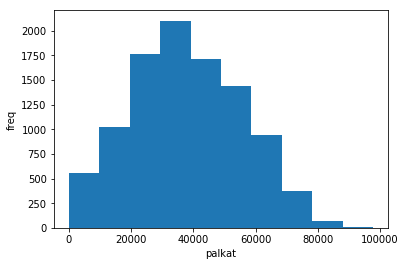

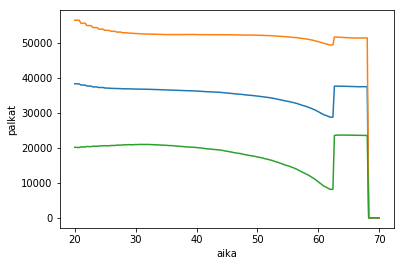

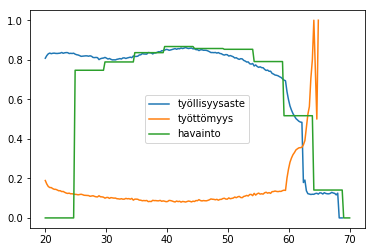

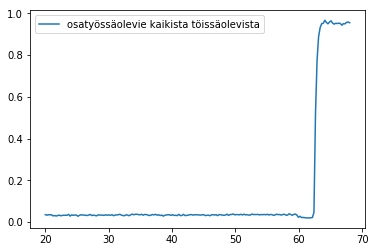

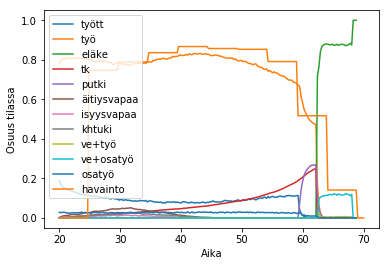

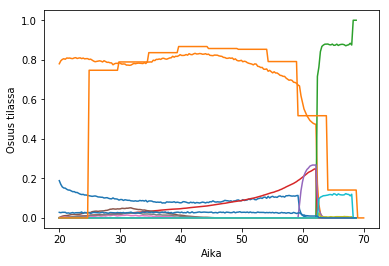

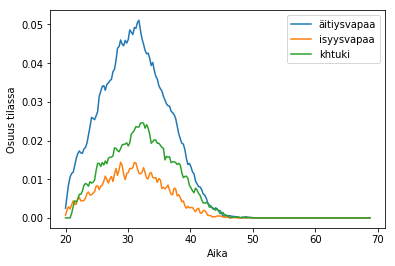

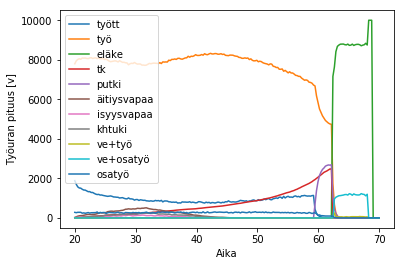

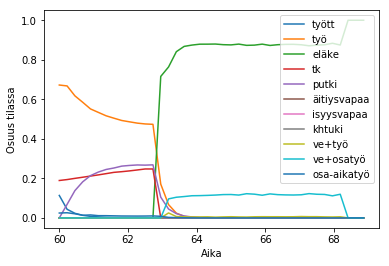

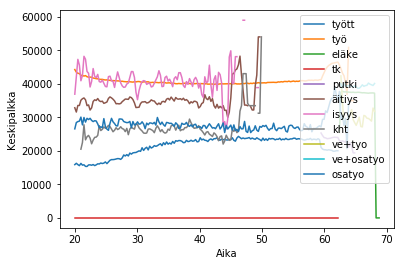

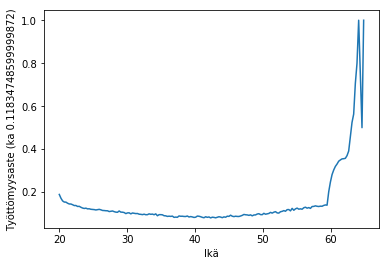

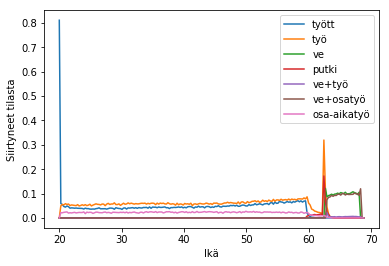

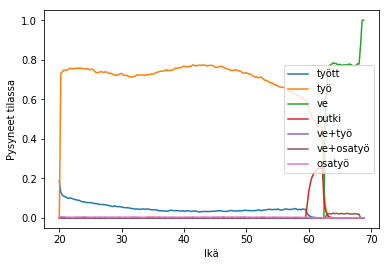

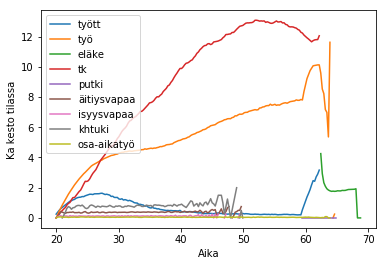

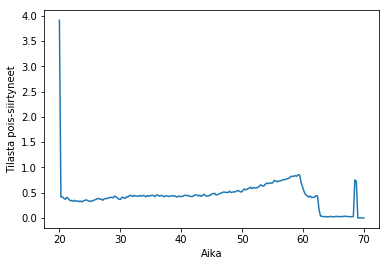

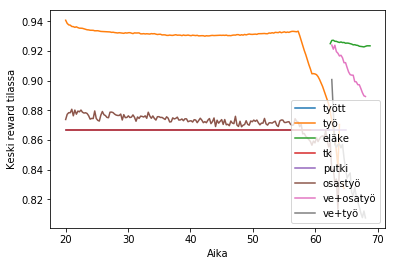

No handles with labels found to put in legend.


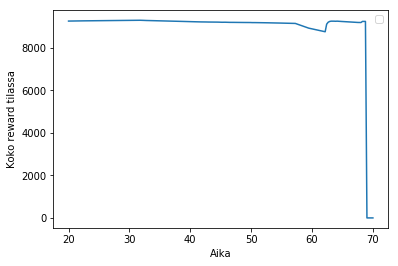

Yhteensä reward 183.9036259560043


In [3]:
cc1=Lifecycle(EK=False,minimal=False)
cc1.run_RL(train=True,steps=50_000_000,cont=False,rlmodel='acktr',save='perusmalli2',batch=1,pop=pop_size)

In [ ]:
#cc1.run_RL(train=True,steps=4_000_000,cont=False,rlmodel='acktr',save='perusmalli',pop=5000)

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(EK=True,minimal=False)
cc2.run_RL(train=True,steps=25_000_000,cont=True,rlmodel='acktr',save='ekn_malli',pop=pop_size,start_from='perusmalli2')

In [ ]:
cc2.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

Pop 10006: 100%|██████████| 10000/10000 [09:50<00:00, 17.61 p/s]

training...
---------------------------------
| explained_variance | 0.00364  |
| fps                | 1941     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 15.1     |
| total_timesteps    | 0        |
| value_loss         | 120      |
---------------------------------
---------------------------------
| explained_variance | 0.496    |
| fps                | 2371     |
| nupdates           | 100      |
| policy_entropy     | 1.38     |
| policy_loss        | 0.318    |
| total_timesteps    | 324819   |
| value_loss         | 0.163    |
---------------------------------
---------------------------------
| explained_variance | 0.794    |
| fps                | 2366     |
| nupdates           | 200      |
| policy_entropy     | 1.37     |
| policy_loss        | -0.0201  |
| total_timesteps    | 652919   |
| value_loss         | 0.0542   |
---------------------------------
---------------------------------
| explained_variance | 0.811    |
| 

---------------------------------
| explained_variance | 0.969    |
| fps                | 2393     |
| nupdates           | 2700     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00858 |
| total_timesteps    | 8855419  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2394     |
| nupdates           | 2800     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0161  |
| total_timesteps    | 9183519  |
| value_loss         | 0.00924  |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2394     |
| nupdates           | 2900     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0104  |
| total_timesteps    | 9511619  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2338     |
| nupdates           | 5400     |
| policy_entropy     | 1        |
| policy_loss        | -0.0276  |
| total_timesteps    | 17714119 |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2330     |
| nupdates           | 5500     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0151  |
| total_timesteps    | 18042219 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2322     |
| nupdates           | 5600     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.027   |
| total_timesteps    | 18370319 |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         


Pop 121:   1%|          | 114/10000 [00:06<10:12, 16.15 p/s]


Pop 235:   2%|▏         | 228/10000 [00:13<09:29, 17.15 p/s]


Pop 349:   3%|▎         | 342/10000 [00:20<09:24, 17.12 p/s]


Pop 463:   5%|▍         | 456/10000 [00:27<09:17, 17.13 p/s]


Pop 576:   6%|▌         | 569/10000 [00:33<09:09, 17.18 p/s]


Pop 690:   7%|▋         | 683/10000 [00:40<09:04, 17.11 p/s]


Pop 804:   8%|▊         | 797/10000 [00:46<08:58, 17.08 p/s]


Pop 918:   9%|▉         | 911/10000 [00:53<08:49, 17.18 p/s]


Pop 1031:  10%|█         | 1024/10000 [01:00<08:45, 17.08 p/s]


Pop 1141:  11%|█▏        | 1134/10000 [01:06<08:33, 17.28 p/s]


Pop 1251:  12%|█▏        | 1244/10000 [01:12<08:30, 17.16 p/s]


Pop 1361:  14%|█▎        | 1354/10000 [01:19<08:29, 16.98 p/s]


Pop 1471:  15%|█▍        | 1465/10000 [01:25<08:18, 17.13 p/s]


Pop 1582:  16%|█▌        | 1575/10000 [01:32<08:17, 16.93 p/s]


Pop 1692:  17%|█▋        | 1685/10000 [01:38<08:03, 17.21 p/s]


Pop 1802:  18%|█▊        | 1795/10000 [01:44<07:54, 17.30 p/s]


Pop 1912:  19%|█▉        | 1905/10000 [01:51<07:50, 17.22 p/s]


Pop 2023:  20%|██        | 2016/10000 [01:57<07:42, 17.27 p/s]


Pop 2133:  21%|██▏       | 2126/10000 [02:04<07:43, 16.98 p/s]


Pop 2243:  22%|██▏       | 2236/10000 [02:10<07:39, 16.88 p/s]


Pop 2353:  23%|██▎       | 2346/10000 [02:17<07:32, 16.93 p/s]


Pop 2463:  25%|██▍       | 2457/10000 [02:23<07:28, 16.81 p/s]


Pop 2574:  26%|██▌       | 2567/10000 [02:29<07:12, 17.19 p/s]


Pop 2684:  27%|██▋       | 2677/10000 [02:36<07:04, 17.25 p/s]


Pop 2794:  28%|██▊       | 2787/10000 [02:42<06:59, 17.19 p/s]


Pop 2904:  29%|██▉       | 2897/10000 [02:49<06:51, 17.27 p/s]


Pop 3015:  30%|███       | 3008/10000 [02:56<06:44, 17.27 p/s]


Pop 3125:  31%|███       | 3118/10000 [03:02<06:43, 17.06 p/s]


Pop 3235:  32%|███▏      | 3228/10000 [03:08<06:33, 17.23 p/s]


Pop 3345:  33%|███▎      | 3338/10000 [03:15<06:27, 17.18 p/s]


Pop 3455:  34%|███▍      | 3449/10000 [03:21<06:26, 16.93 p/s]


Pop 3566:  36%|███▌      | 3559/10000 [03:27<06:12, 17.29 p/s]


Pop 3676:  37%|███▋      | 3669/10000 [03:34<06:10, 17.09 p/s]


Pop 3786:  38%|███▊      | 3779/10000 [03:40<06:00, 17.24 p/s]


Pop 3896:  39%|███▉      | 3889/10000 [03:47<05:56, 17.15 p/s]


Pop 4007:  40%|████      | 4000/10000 [03:53<05:54, 16.95 p/s]


Pop 4117:  41%|████      | 4110/10000 [03:59<05:42, 17.19 p/s]


Pop 4227:  42%|████▏     | 4220/10000 [04:06<05:36, 17.18 p/s]


Pop 4337:  43%|████▎     | 4330/10000 [04:12<05:29, 17.22 p/s]


Pop 4447:  44%|████▍     | 4441/10000 [04:19<05:20, 17.33 p/s]


Pop 4558:  46%|████▌     | 4551/10000 [04:25<05:24, 16.81 p/s]


Pop 4668:  47%|████▋     | 4661/10000 [04:32<05:13, 17.02 p/s]


Pop 4778:  48%|████▊     | 4771/10000 [04:38<05:02, 17.29 p/s]


Pop 4888:  49%|████▉     | 4881/10000 [04:45<05:01, 17.00 p/s]


Pop 4999:  50%|████▉     | 4992/10000 [04:51<04:49, 17.31 p/s]


Pop 5109:  51%|█████     | 5102/10000 [04:57<04:43, 17.26 p/s]


Pop 5219:  52%|█████▏    | 5212/10000 [05:04<04:41, 17.04 p/s]


Pop 5329:  53%|█████▎    | 5322/10000 [05:10<04:33, 17.13 p/s]


Pop 5439:  54%|█████▍    | 5433/10000 [05:17<04:28, 17.01 p/s]


Pop 5550:  55%|█████▌    | 5543/10000 [05:23<04:25, 16.81 p/s]


Pop 5660:  57%|█████▋    | 5653/10000 [05:30<04:13, 17.18 p/s]


Pop 5770:  58%|█████▊    | 5763/10000 [05:36<04:08, 17.03 p/s]


Pop 5880:  59%|█████▊    | 5873/10000 [05:43<03:59, 17.20 p/s]


Pop 5991:  60%|█████▉    | 5984/10000 [05:49<03:53, 17.23 p/s]


Pop 6101:  61%|██████    | 6094/10000 [05:55<03:47, 17.20 p/s]


Pop 6211:  62%|██████▏   | 6204/10000 [06:02<03:42, 17.09 p/s]


Pop 6321:  63%|██████▎   | 6314/10000 [06:08<03:33, 17.29 p/s]


Pop 6431:  64%|██████▍   | 6425/10000 [06:15<03:26, 17.32 p/s]


Pop 6542:  65%|██████▌   | 6535/10000 [06:21<03:20, 17.29 p/s]


Pop 6652:  66%|██████▋   | 6645/10000 [06:27<03:18, 16.86 p/s]


Pop 6762:  68%|██████▊   | 6755/10000 [06:34<03:09, 17.12 p/s]


Pop 6872:  69%|██████▊   | 6865/10000 [06:40<03:01, 17.27 p/s]


Pop 6983:  70%|██████▉   | 6976/10000 [06:47<02:57, 17.03 p/s]


Pop 7093:  71%|███████   | 7086/10000 [06:53<02:48, 17.32 p/s]


Pop 7203:  72%|███████▏  | 7196/10000 [07:00<02:43, 17.15 p/s]


Pop 7313:  73%|███████▎  | 7306/10000 [07:06<02:36, 17.26 p/s]


Pop 7423:  74%|███████▍  | 7417/10000 [07:13<02:29, 17.27 p/s]


Pop 7534:  75%|███████▌  | 7527/10000 [07:19<02:25, 17.00 p/s]


Pop 7644:  76%|███████▋  | 7637/10000 [07:25<02:19, 16.92 p/s]


Pop 7754:  77%|███████▋  | 7747/10000 [07:32<02:12, 17.06 p/s]


Pop 7864:  79%|███████▊  | 7857/10000 [07:38<02:06, 16.95 p/s]


Pop 7975:  80%|███████▉  | 7968/10000 [07:45<01:56, 17.38 p/s]


Pop 8085:  81%|████████  | 8078/10000 [07:51<01:51, 17.28 p/s]


Pop 8195:  82%|████████▏ | 8188/10000 [07:57<01:44, 17.31 p/s]


Pop 8305:  83%|████████▎ | 8298/10000 [08:04<01:39, 17.14 p/s]


Pop 8415:  84%|████████▍ | 8409/10000 [08:11<01:34, 16.87 p/s]


Pop 8526:  85%|████████▌ | 8519/10000 [08:17<01:27, 16.98 p/s]


Pop 8636:  86%|████████▋ | 8629/10000 [08:23<01:21, 16.83 p/s]


Pop 8746:  87%|████████▋ | 8739/10000 [08:30<01:16, 16.59 p/s]


Pop 8856:  88%|████████▊ | 8849/10000 [08:36<01:06, 17.24 p/s]


Pop 8967:  90%|████████▉ | 8960/10000 [08:43<01:00, 17.18 p/s]


Pop 9077:  91%|█████████ | 9070/10000 [08:49<00:53, 17.28 p/s]


Pop 9187:  92%|█████████▏| 9180/10000 [08:55<00:47, 17.22 p/s]


Pop 9297:  93%|█████████▎| 9290/10000 [09:02<00:41, 17.03 p/s]


Pop 9407:  94%|█████████▍| 9401/10000 [09:08<00:34, 17.19 p/s]


Pop 9518:  95%|█████████▌| 9511/10000 [09:15<00:28, 17.29 p/s]


Pop 9628:  96%|█████████▌| 9621/10000 [09:21<00:22, 16.51 p/s]


Pop 9738:  97%|█████████▋| 9731/10000 [09:28<00:15, 17.20 p/s]


Pop 9848:  98%|█████████▊| 9841/10000 [09:34<00:09, 17.02 p/s]


Pop 9959: 100%|█████████▉| 9952/10000 [09:41<00:02, 17.30 p/s]


Pop 10006: 100%|█████████▉| 9999/10000 [09:43<00:00, 17.22 p/s]

done


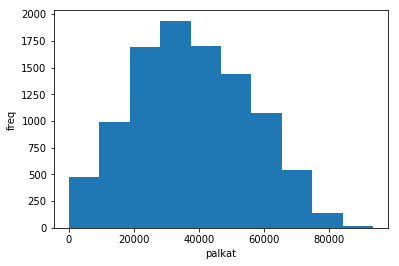

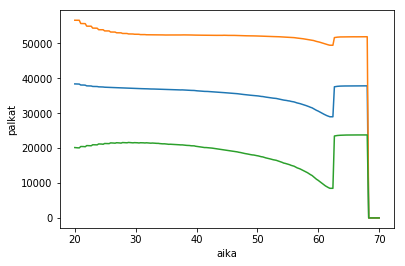

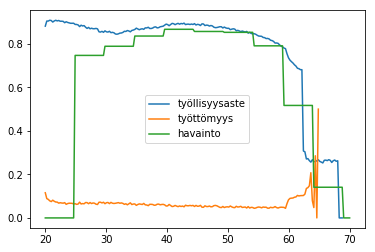

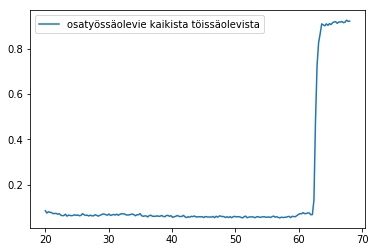

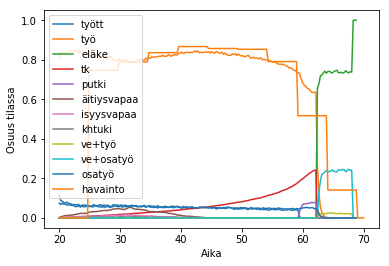

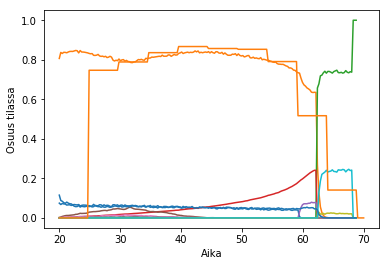

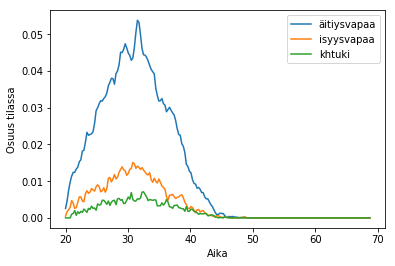

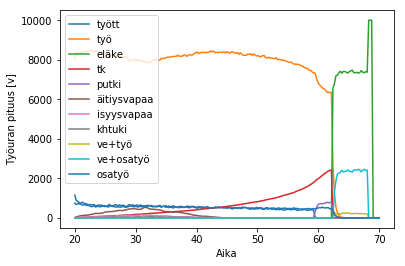

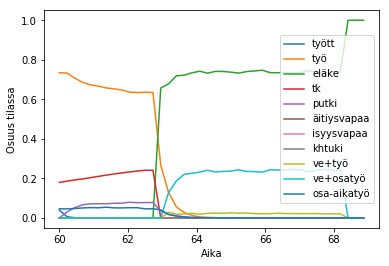

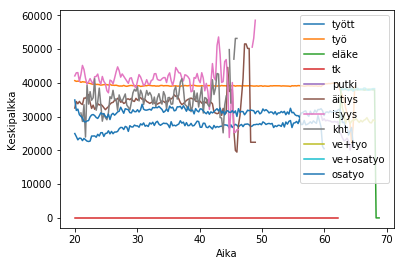

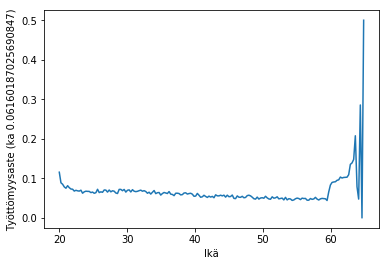

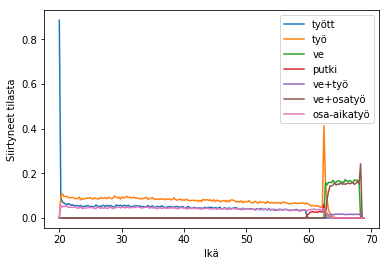

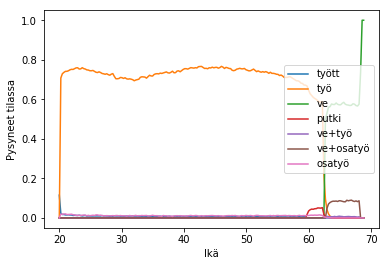

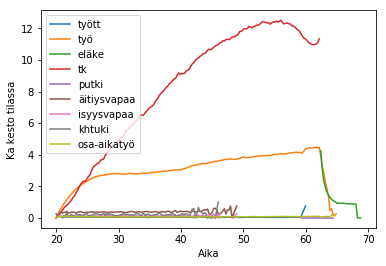

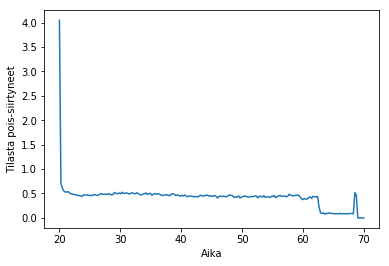

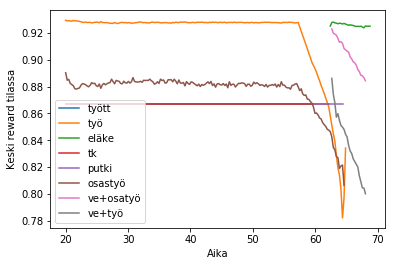

No handles with labels found to put in legend.


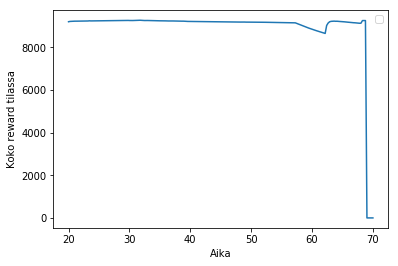

Yhteensä reward 183.458129268027


In [4]:
cc1_400=Lifecycle(EK=False,minimal=False,ansiopvraha_kesto300=400)
cc1_400.run_RL(train=True,steps=25_000_000,cont=False,rlmodel='acktr',save='300_vs_400',pop=pop_size,start_from='perusmalli')

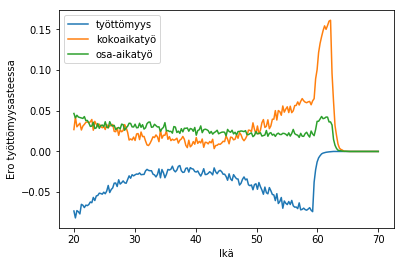

Työllisyysvaikutus noin 23040.0 htv ja 33104.0 työllistä (osatyö=0.5 htv)


In [5]:
cc1_400.compare_with(cc1)

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?


Pop 10006: 100%|██████████| 10000/10000 [10:03<00:00, 17.22 p/s]

training...
---------------------------------
| explained_variance | 0.0328   |
| fps                | 1948     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 15.2     |
| total_timesteps    | 0        |
| value_loss         | 122      |
---------------------------------
---------------------------------
| explained_variance | 0.361    |
| fps                | 2367     |
| nupdates           | 100      |
| policy_entropy     | 1.36     |
| policy_loss        | 0.315    |
| total_timesteps    | 324819   |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.844    |
| fps                | 2364     |
| nupdates           | 200      |
| policy_entropy     | 1.33     |
| policy_loss        | 0.088    |
| total_timesteps    | 652919   |
| value_loss         | 0.0486   |
---------------------------------
---------------------------------
| explained_variance | 0.873    |
| 

---------------------------------
| explained_variance | 0.977    |
| fps                | 2393     |
| nupdates           | 2700     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0167  |
| total_timesteps    | 8855419  |
| value_loss         | 0.00966  |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2393     |
| nupdates           | 2800     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.00829 |
| total_timesteps    | 9183519  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2394     |
| nupdates           | 2900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0237  |
| total_timesteps    | 9511619  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2257     |
| nupdates           | 5400     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0305  |
| total_timesteps    | 17714119 |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 2248     |
| nupdates           | 5500     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0159  |
| total_timesteps    | 18042219 |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2240     |
| nupdates           | 5600     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.018   |
| total_timesteps    | 18370319 |
| value_loss         | 0.0094   |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         



Population:   0%|          | 0/10000 [00:00<?, ? p/s]

Pop 7:   0%|          | 0/10000 [00:00<?, ? p/s]     

Pop 7:   0%|          | 1/10000 [00:00<1:15:15,  2.21 p/s]

Pop 8:   0%|          | 1/10000 [00:00<1:15:15,  2.21 p/s]

Pop 9:   0%|          | 2/10000 [00:00<1:15:15,  2.21 p/s]

Pop 10:   0%|          | 3/10000 [00:00<1:15:14,  2.21 p/s]

Pop 11:   0%|          | 4/10000 [00:00<1:15:14,  2.21 p/s]

Pop 12:   0%|          | 5/10000 [00:00<1:15:13,  2.21 p/s]

Pop 13:   0%|          | 6/10000 [00:00<1:15:13,  2.21 p/s]

Pop 14:   0%|          | 7/10000 [00:00<1:15:13,  2.21 p/s]

Pop 15:   0%|          | 8/10000 [00:00<1:15:12,  2.21 p/s]

Pop 15:   0%|          | 9/10000 [00:00<55:35,  3.00 p/s]  

Pop 16:   0%|          | 9/10000 [00:00<55:35,  3.00 p/s]

Pop 17:   0%|          | 10/10000 [00:00<55:35,  3.00 p/s]

Pop 18:   0%|          | 11/10000 [00:00<55:34,  3.00 p/s]

Pop 19:   0%|          | 12/10000 [00:00<55:34,  3.00 p/s]

Pop 20:   0%|          | 13/10000 [00:00<5

Pop 115:   1%|          | 108/10000 [00:06<10:12, 16.15 p/s]

Pop 116:   1%|          | 109/10000 [00:06<10:12, 16.15 p/s]

Pop 117:   1%|          | 110/10000 [00:06<10:12, 16.15 p/s]

Pop 118:   1%|          | 111/10000 [00:06<10:12, 16.15 p/s]

Pop 119:   1%|          | 112/10000 [00:06<10:12, 16.15 p/s]

Pop 119:   1%|          | 113/10000 [00:06<09:58, 16.51 p/s]

Pop 120:   1%|          | 113/10000 [00:06<09:58, 16.51 p/s]

Pop 121:   1%|          | 114/10000 [00:06<09:58, 16.51 p/s]

Pop 122:   1%|          | 115/10000 [00:06<09:58, 16.51 p/s]

Pop 123:   1%|          | 116/10000 [00:07<09:58, 16.51 p/s]

Pop 124:   1%|          | 117/10000 [00:07<09:58, 16.51 p/s]

Pop 125:   1%|          | 118/10000 [00:07<09:58, 16.51 p/s]

Pop 126:   1%|          | 119/10000 [00:07<09:58, 16.51 p/s]

Pop 127:   1%|          | 120/10000 [00:07<09:58, 16.51 p/s]

Pop 127:   1%|          | 121/10000 [00:07<09:50, 16.73 p/s]

Pop 128:   1%|          | 121/10000 [00:07<09:50, 16.73 p/s]

Pop 129:

Pop 222:   2%|▏         | 215/10000 [00:12<09:39, 16.89 p/s]

Pop 223:   2%|▏         | 216/10000 [00:13<09:39, 16.89 p/s]

Pop 223:   2%|▏         | 217/10000 [00:13<09:39, 16.89 p/s]

Pop 224:   2%|▏         | 217/10000 [00:13<09:39, 16.89 p/s]

Pop 225:   2%|▏         | 218/10000 [00:13<09:39, 16.89 p/s]

Pop 226:   2%|▏         | 219/10000 [00:13<09:38, 16.89 p/s]

Pop 227:   2%|▏         | 220/10000 [00:13<09:38, 16.89 p/s]

Pop 228:   2%|▏         | 221/10000 [00:13<09:38, 16.89 p/s]

Pop 229:   2%|▏         | 222/10000 [00:13<09:38, 16.89 p/s]

Pop 230:   2%|▏         | 223/10000 [00:13<09:38, 16.89 p/s]

Pop 231:   2%|▏         | 224/10000 [00:13<09:38, 16.89 p/s]

Pop 231:   2%|▏         | 225/10000 [00:13<09:36, 16.96 p/s]

Pop 232:   2%|▏         | 225/10000 [00:13<09:36, 16.96 p/s]

Pop 233:   2%|▏         | 226/10000 [00:13<09:36, 16.96 p/s]

Pop 234:   2%|▏         | 227/10000 [00:13<09:36, 16.96 p/s]

Pop 235:   2%|▏         | 228/10000 [00:13<09:36, 16.96 p/s]

Pop 236:

Pop 328:   3%|▎         | 321/10000 [00:19<09:17, 17.37 p/s]

Pop 329:   3%|▎         | 322/10000 [00:19<09:17, 17.37 p/s]

Pop 330:   3%|▎         | 323/10000 [00:19<09:17, 17.37 p/s]

Pop 331:   3%|▎         | 324/10000 [00:19<09:17, 17.37 p/s]

Pop 332:   3%|▎         | 325/10000 [00:19<09:16, 17.37 p/s]

Pop 333:   3%|▎         | 326/10000 [00:19<09:16, 17.37 p/s]

Pop 334:   3%|▎         | 327/10000 [00:19<09:16, 17.37 p/s]

Pop 335:   3%|▎         | 328/10000 [00:19<09:16, 17.37 p/s]

Pop 335:   3%|▎         | 329/10000 [00:19<09:17, 17.35 p/s]

Pop 336:   3%|▎         | 329/10000 [00:19<09:17, 17.35 p/s]

Pop 337:   3%|▎         | 330/10000 [00:19<09:17, 17.35 p/s]

Pop 338:   3%|▎         | 331/10000 [00:19<09:17, 17.35 p/s]

Pop 339:   3%|▎         | 332/10000 [00:19<09:17, 17.35 p/s]

Pop 340:   3%|▎         | 333/10000 [00:19<09:17, 17.35 p/s]

Pop 341:   3%|▎         | 334/10000 [00:19<09:17, 17.35 p/s]

Pop 342:   3%|▎         | 335/10000 [00:19<09:17, 17.35 p/s]

Pop 343:

Pop 435:   4%|▍         | 428/10000 [00:25<09:13, 17.29 p/s]

Pop 436:   4%|▍         | 429/10000 [00:25<09:13, 17.29 p/s]

Pop 437:   4%|▍         | 430/10000 [00:25<09:13, 17.29 p/s]

Pop 438:   4%|▍         | 431/10000 [00:25<09:13, 17.29 p/s]

Pop 439:   4%|▍         | 432/10000 [00:25<09:13, 17.29 p/s]

Pop 439:   4%|▍         | 433/10000 [00:25<09:14, 17.26 p/s]

Pop 440:   4%|▍         | 433/10000 [00:25<09:14, 17.26 p/s]

Pop 441:   4%|▍         | 434/10000 [00:25<09:14, 17.26 p/s]

Pop 442:   4%|▍         | 435/10000 [00:25<09:14, 17.26 p/s]

Pop 443:   4%|▍         | 436/10000 [00:25<09:14, 17.26 p/s]

Pop 444:   4%|▍         | 437/10000 [00:25<09:14, 17.26 p/s]

Pop 445:   4%|▍         | 438/10000 [00:25<09:13, 17.26 p/s]

Pop 446:   4%|▍         | 439/10000 [00:25<09:13, 17.26 p/s]

Pop 447:   4%|▍         | 440/10000 [00:25<09:13, 17.26 p/s]

Pop 447:   4%|▍         | 441/10000 [00:25<09:13, 17.28 p/s]

Pop 448:   4%|▍         | 441/10000 [00:25<09:13, 17.28 p/s]

Pop 449:

Pop 542:   5%|▌         | 535/10000 [00:31<09:06, 17.33 p/s]

Pop 543:   5%|▌         | 536/10000 [00:31<09:06, 17.33 p/s]

Pop 543:   5%|▌         | 537/10000 [00:31<09:10, 17.19 p/s]

Pop 544:   5%|▌         | 537/10000 [00:31<09:10, 17.19 p/s]

Pop 545:   5%|▌         | 538/10000 [00:31<09:10, 17.19 p/s]

Pop 546:   5%|▌         | 539/10000 [00:31<09:10, 17.19 p/s]

Pop 547:   5%|▌         | 540/10000 [00:31<09:10, 17.19 p/s]

Pop 548:   5%|▌         | 541/10000 [00:31<09:10, 17.19 p/s]

Pop 549:   5%|▌         | 542/10000 [00:31<09:10, 17.19 p/s]

Pop 550:   5%|▌         | 543/10000 [00:31<09:10, 17.19 p/s]

Pop 551:   5%|▌         | 544/10000 [00:31<09:09, 17.19 p/s]

Pop 551:   5%|▌         | 545/10000 [00:31<09:09, 17.21 p/s]

Pop 552:   5%|▌         | 545/10000 [00:32<09:09, 17.21 p/s]

Pop 553:   5%|▌         | 546/10000 [00:32<09:09, 17.21 p/s]

Pop 554:   5%|▌         | 547/10000 [00:32<09:09, 17.21 p/s]

Pop 555:   5%|▌         | 548/10000 [00:32<09:09, 17.21 p/s]

Pop 556:

Pop 648:   6%|▋         | 641/10000 [00:37<09:06, 17.14 p/s]

Pop 649:   6%|▋         | 642/10000 [00:37<09:06, 17.14 p/s]

Pop 650:   6%|▋         | 643/10000 [00:37<09:06, 17.14 p/s]

Pop 651:   6%|▋         | 644/10000 [00:37<09:05, 17.14 p/s]

Pop 652:   6%|▋         | 645/10000 [00:37<09:05, 17.14 p/s]

Pop 653:   6%|▋         | 646/10000 [00:37<09:05, 17.14 p/s]

Pop 654:   6%|▋         | 647/10000 [00:37<09:05, 17.14 p/s]

Pop 655:   6%|▋         | 648/10000 [00:38<09:05, 17.14 p/s]

Pop 655:   6%|▋         | 649/10000 [00:38<09:04, 17.16 p/s]

Pop 656:   6%|▋         | 649/10000 [00:38<09:04, 17.16 p/s]

Pop 657:   6%|▋         | 650/10000 [00:38<09:04, 17.16 p/s]

Pop 658:   7%|▋         | 651/10000 [00:38<09:04, 17.16 p/s]

Pop 659:   7%|▋         | 652/10000 [00:38<09:04, 17.16 p/s]

Pop 660:   7%|▋         | 653/10000 [00:38<09:04, 17.16 p/s]

Pop 661:   7%|▋         | 654/10000 [00:38<09:04, 17.16 p/s]

Pop 662:   7%|▋         | 655/10000 [00:38<09:04, 17.16 p/s]

Pop 663:

Pop 755:   7%|▋         | 748/10000 [00:43<09:11, 16.78 p/s]

Pop 756:   7%|▋         | 749/10000 [00:43<09:11, 16.78 p/s]

Pop 757:   8%|▊         | 750/10000 [00:43<09:11, 16.78 p/s]

Pop 758:   8%|▊         | 751/10000 [00:43<09:11, 16.78 p/s]

Pop 759:   8%|▊         | 752/10000 [00:44<09:11, 16.78 p/s]

Pop 759:   8%|▊         | 753/10000 [00:44<09:06, 16.93 p/s]

Pop 760:   8%|▊         | 753/10000 [00:44<09:06, 16.93 p/s]

Pop 761:   8%|▊         | 754/10000 [00:44<09:06, 16.93 p/s]

Pop 762:   8%|▊         | 755/10000 [00:44<09:06, 16.93 p/s]

Pop 763:   8%|▊         | 756/10000 [00:44<09:06, 16.93 p/s]

Pop 764:   8%|▊         | 757/10000 [00:44<09:06, 16.93 p/s]

Pop 765:   8%|▊         | 758/10000 [00:44<09:06, 16.93 p/s]

Pop 766:   8%|▊         | 759/10000 [00:44<09:05, 16.93 p/s]

Pop 767:   8%|▊         | 760/10000 [00:44<09:05, 16.93 p/s]

Pop 767:   8%|▊         | 761/10000 [00:44<09:00, 17.08 p/s]

Pop 768:   8%|▊         | 761/10000 [00:44<09:00, 17.08 p/s]

Pop 769:

Pop 862:   9%|▊         | 855/10000 [00:49<08:52, 17.16 p/s]

Pop 863:   9%|▊         | 856/10000 [00:50<08:52, 17.16 p/s]

Pop 863:   9%|▊         | 857/10000 [00:50<08:57, 17.00 p/s]

Pop 864:   9%|▊         | 857/10000 [00:50<08:57, 17.00 p/s]

Pop 865:   9%|▊         | 858/10000 [00:50<08:57, 17.00 p/s]

Pop 866:   9%|▊         | 859/10000 [00:50<08:57, 17.00 p/s]

Pop 867:   9%|▊         | 860/10000 [00:50<08:57, 17.00 p/s]

Pop 868:   9%|▊         | 861/10000 [00:50<08:57, 17.00 p/s]

Pop 869:   9%|▊         | 862/10000 [00:50<08:57, 17.00 p/s]

Pop 870:   9%|▊         | 863/10000 [00:50<08:57, 17.00 p/s]

Pop 871:   9%|▊         | 864/10000 [00:50<08:57, 17.00 p/s]

Pop 871:   9%|▊         | 865/10000 [00:50<08:55, 17.05 p/s]

Pop 872:   9%|▊         | 865/10000 [00:50<08:55, 17.05 p/s]

Pop 873:   9%|▊         | 866/10000 [00:50<08:55, 17.05 p/s]

Pop 874:   9%|▊         | 867/10000 [00:50<08:55, 17.05 p/s]

Pop 875:   9%|▊         | 868/10000 [00:50<08:55, 17.05 p/s]

Pop 876:

Pop 968:  10%|▉         | 961/10000 [00:56<08:43, 17.27 p/s]

Pop 969:  10%|▉         | 962/10000 [00:56<08:43, 17.27 p/s]

Pop 970:  10%|▉         | 963/10000 [00:56<08:43, 17.27 p/s]

Pop 971:  10%|▉         | 964/10000 [00:56<08:43, 17.27 p/s]

Pop 972:  10%|▉         | 965/10000 [00:56<08:43, 17.27 p/s]

Pop 973:  10%|▉         | 966/10000 [00:56<08:42, 17.27 p/s]

Pop 974:  10%|▉         | 967/10000 [00:56<08:42, 17.27 p/s]

Pop 975:  10%|▉         | 968/10000 [00:56<08:42, 17.27 p/s]

Pop 975:  10%|▉         | 969/10000 [00:56<08:40, 17.36 p/s]

Pop 976:  10%|▉         | 969/10000 [00:56<08:40, 17.36 p/s]

Pop 977:  10%|▉         | 970/10000 [00:56<08:40, 17.36 p/s]

Pop 978:  10%|▉         | 971/10000 [00:56<08:40, 17.36 p/s]

Pop 979:  10%|▉         | 972/10000 [00:56<08:39, 17.36 p/s]

Pop 980:  10%|▉         | 973/10000 [00:56<08:39, 17.36 p/s]

Pop 981:  10%|▉         | 974/10000 [00:56<08:39, 17.36 p/s]

Pop 982:  10%|▉         | 975/10000 [00:56<08:39, 17.36 p/s]

Pop 983:

Pop 1073:  11%|█         | 1066/10000 [01:02<08:35, 17.31 p/s]

Pop 1074:  11%|█         | 1067/10000 [01:02<08:35, 17.31 p/s]

Pop 1075:  11%|█         | 1068/10000 [01:02<08:35, 17.31 p/s]

Pop 1076:  11%|█         | 1069/10000 [01:02<08:35, 17.31 p/s]

Pop 1077:  11%|█         | 1070/10000 [01:02<08:35, 17.31 p/s]

Pop 1078:  11%|█         | 1071/10000 [01:02<08:35, 17.31 p/s]

Pop 1079:  11%|█         | 1072/10000 [01:02<08:35, 17.31 p/s]

Pop 1079:  11%|█         | 1073/10000 [01:02<08:35, 17.33 p/s]

Pop 1080:  11%|█         | 1073/10000 [01:02<08:35, 17.33 p/s]

Pop 1081:  11%|█         | 1074/10000 [01:02<08:34, 17.33 p/s]

Pop 1082:  11%|█         | 1075/10000 [01:02<08:34, 17.33 p/s]

Pop 1083:  11%|█         | 1076/10000 [01:02<08:34, 17.33 p/s]

Pop 1084:  11%|█         | 1077/10000 [01:02<08:34, 17.33 p/s]

Pop 1085:  11%|█         | 1078/10000 [01:02<08:34, 17.33 p/s]

Pop 1086:  11%|█         | 1079/10000 [01:02<08:34, 17.33 p/s]

Pop 1087:  11%|█         | 1080/10000 [0

Pop 1177:  12%|█▏        | 1170/10000 [01:08<08:35, 17.13 p/s]

Pop 1178:  12%|█▏        | 1171/10000 [01:08<08:35, 17.13 p/s]

Pop 1179:  12%|█▏        | 1172/10000 [01:08<08:35, 17.13 p/s]

Pop 1180:  12%|█▏        | 1173/10000 [01:08<08:35, 17.13 p/s]

Pop 1181:  12%|█▏        | 1174/10000 [01:08<08:35, 17.13 p/s]

Pop 1182:  12%|█▏        | 1175/10000 [01:08<08:35, 17.13 p/s]

Pop 1183:  12%|█▏        | 1176/10000 [01:08<08:35, 17.13 p/s]

Pop 1183:  12%|█▏        | 1177/10000 [01:08<08:36, 17.08 p/s]

Pop 1184:  12%|█▏        | 1177/10000 [01:08<08:36, 17.08 p/s]

Pop 1185:  12%|█▏        | 1178/10000 [01:08<08:36, 17.08 p/s]

Pop 1186:  12%|█▏        | 1179/10000 [01:08<08:36, 17.08 p/s]

Pop 1187:  12%|█▏        | 1180/10000 [01:08<08:36, 17.08 p/s]

Pop 1188:  12%|█▏        | 1181/10000 [01:08<08:36, 17.08 p/s]

Pop 1189:  12%|█▏        | 1182/10000 [01:08<08:36, 17.08 p/s]

Pop 1190:  12%|█▏        | 1183/10000 [01:08<08:36, 17.08 p/s]

Pop 1191:  12%|█▏        | 1184/10000 [0

Pop 1281:  13%|█▎        | 1274/10000 [01:14<08:34, 16.96 p/s]

Pop 1282:  13%|█▎        | 1275/10000 [01:14<08:34, 16.96 p/s]

Pop 1283:  13%|█▎        | 1276/10000 [01:14<08:34, 16.96 p/s]

Pop 1284:  13%|█▎        | 1277/10000 [01:14<08:34, 16.96 p/s]

Pop 1285:  13%|█▎        | 1278/10000 [01:14<08:34, 16.96 p/s]

Pop 1286:  13%|█▎        | 1279/10000 [01:14<08:34, 16.96 p/s]

Pop 1287:  13%|█▎        | 1280/10000 [01:15<08:34, 16.96 p/s]

Pop 1287:  13%|█▎        | 1281/10000 [01:15<08:34, 16.95 p/s]

Pop 1288:  13%|█▎        | 1281/10000 [01:15<08:34, 16.95 p/s]

Pop 1289:  13%|█▎        | 1282/10000 [01:15<08:34, 16.95 p/s]

Pop 1290:  13%|█▎        | 1283/10000 [01:15<08:34, 16.95 p/s]

Pop 1291:  13%|█▎        | 1284/10000 [01:15<08:34, 16.95 p/s]

Pop 1292:  13%|█▎        | 1285/10000 [01:15<08:34, 16.95 p/s]

Pop 1293:  13%|█▎        | 1286/10000 [01:15<08:33, 16.95 p/s]

Pop 1294:  13%|█▎        | 1287/10000 [01:15<08:33, 16.95 p/s]

Pop 1295:  13%|█▎        | 1288/10000 [0

Pop 1385:  14%|█▍        | 1378/10000 [01:20<08:28, 16.95 p/s]

Pop 1386:  14%|█▍        | 1379/10000 [01:20<08:28, 16.95 p/s]

Pop 1387:  14%|█▍        | 1380/10000 [01:20<08:28, 16.95 p/s]

Pop 1388:  14%|█▍        | 1381/10000 [01:20<08:28, 16.95 p/s]

Pop 1389:  14%|█▍        | 1382/10000 [01:20<08:28, 16.95 p/s]

Pop 1390:  14%|█▍        | 1383/10000 [01:20<08:28, 16.95 p/s]

Pop 1391:  14%|█▍        | 1384/10000 [01:21<08:28, 16.95 p/s]

Pop 1391:  14%|█▍        | 1385/10000 [01:21<08:29, 16.92 p/s]

Pop 1392:  14%|█▍        | 1385/10000 [01:21<08:29, 16.92 p/s]

Pop 1393:  14%|█▍        | 1386/10000 [01:21<08:29, 16.92 p/s]

Pop 1394:  14%|█▍        | 1387/10000 [01:21<08:29, 16.92 p/s]

Pop 1395:  14%|█▍        | 1388/10000 [01:21<08:28, 16.92 p/s]

Pop 1396:  14%|█▍        | 1389/10000 [01:21<08:28, 16.92 p/s]

Pop 1397:  14%|█▍        | 1390/10000 [01:21<08:28, 16.92 p/s]

Pop 1398:  14%|█▍        | 1391/10000 [01:21<08:28, 16.92 p/s]

Pop 1399:  14%|█▍        | 1392/10000 [0

Pop 1489:  15%|█▍        | 1482/10000 [01:26<08:17, 17.14 p/s]

Pop 1490:  15%|█▍        | 1483/10000 [01:26<08:16, 17.14 p/s]

Pop 1491:  15%|█▍        | 1484/10000 [01:26<08:16, 17.14 p/s]

Pop 1492:  15%|█▍        | 1485/10000 [01:26<08:16, 17.14 p/s]

Pop 1493:  15%|█▍        | 1486/10000 [01:26<08:16, 17.14 p/s]

Pop 1494:  15%|█▍        | 1487/10000 [01:26<08:16, 17.14 p/s]

Pop 1495:  15%|█▍        | 1488/10000 [01:27<08:16, 17.14 p/s]

Pop 1495:  15%|█▍        | 1489/10000 [01:27<08:14, 17.22 p/s]

Pop 1496:  15%|█▍        | 1489/10000 [01:27<08:14, 17.22 p/s]

Pop 1497:  15%|█▍        | 1490/10000 [01:27<08:14, 17.22 p/s]

Pop 1498:  15%|█▍        | 1491/10000 [01:27<08:14, 17.22 p/s]

Pop 1499:  15%|█▍        | 1492/10000 [01:27<08:14, 17.22 p/s]

Pop 1500:  15%|█▍        | 1493/10000 [01:27<08:14, 17.22 p/s]

Pop 1501:  15%|█▍        | 1494/10000 [01:27<08:14, 17.22 p/s]

Pop 1502:  15%|█▍        | 1495/10000 [01:27<08:14, 17.22 p/s]

Pop 1503:  15%|█▍        | 1496/10000 [0

Pop 1593:  16%|█▌        | 1586/10000 [01:32<08:06, 17.30 p/s]

Pop 1594:  16%|█▌        | 1587/10000 [01:32<08:06, 17.30 p/s]

Pop 1595:  16%|█▌        | 1588/10000 [01:32<08:06, 17.30 p/s]

Pop 1596:  16%|█▌        | 1589/10000 [01:32<08:06, 17.30 p/s]

Pop 1597:  16%|█▌        | 1590/10000 [01:32<08:06, 17.30 p/s]

Pop 1598:  16%|█▌        | 1591/10000 [01:32<08:05, 17.30 p/s]

Pop 1599:  16%|█▌        | 1592/10000 [01:33<08:05, 17.30 p/s]

Pop 1599:  16%|█▌        | 1593/10000 [01:33<08:05, 17.33 p/s]

Pop 1600:  16%|█▌        | 1593/10000 [01:33<08:05, 17.33 p/s]

Pop 1601:  16%|█▌        | 1594/10000 [01:33<08:05, 17.33 p/s]

Pop 1602:  16%|█▌        | 1595/10000 [01:33<08:05, 17.33 p/s]

Pop 1603:  16%|█▌        | 1596/10000 [01:33<08:04, 17.33 p/s]

Pop 1604:  16%|█▌        | 1597/10000 [01:33<08:04, 17.33 p/s]

Pop 1605:  16%|█▌        | 1598/10000 [01:33<08:04, 17.33 p/s]

Pop 1606:  16%|█▌        | 1599/10000 [01:33<08:04, 17.33 p/s]

Pop 1607:  16%|█▌        | 1600/10000 [0

Pop 1697:  17%|█▋        | 1690/10000 [01:38<08:04, 17.16 p/s]

Pop 1698:  17%|█▋        | 1691/10000 [01:38<08:04, 17.16 p/s]

Pop 1699:  17%|█▋        | 1692/10000 [01:38<08:04, 17.16 p/s]

Pop 1700:  17%|█▋        | 1693/10000 [01:38<08:04, 17.16 p/s]

Pop 1701:  17%|█▋        | 1694/10000 [01:38<08:04, 17.16 p/s]

Pop 1702:  17%|█▋        | 1695/10000 [01:38<08:04, 17.16 p/s]

Pop 1703:  17%|█▋        | 1696/10000 [01:39<08:04, 17.16 p/s]

Pop 1703:  17%|█▋        | 1697/10000 [01:39<08:09, 16.95 p/s]

Pop 1704:  17%|█▋        | 1697/10000 [01:39<08:09, 16.95 p/s]

Pop 1705:  17%|█▋        | 1698/10000 [01:39<08:09, 16.95 p/s]

Pop 1706:  17%|█▋        | 1699/10000 [01:39<08:09, 16.95 p/s]

Pop 1707:  17%|█▋        | 1700/10000 [01:39<08:09, 16.95 p/s]

Pop 1708:  17%|█▋        | 1701/10000 [01:39<08:09, 16.95 p/s]

Pop 1709:  17%|█▋        | 1702/10000 [01:39<08:09, 16.95 p/s]

Pop 1710:  17%|█▋        | 1703/10000 [01:39<08:09, 16.95 p/s]

Pop 1711:  17%|█▋        | 1704/10000 [0

Pop 1801:  18%|█▊        | 1794/10000 [01:45<08:08, 16.79 p/s]

Pop 1802:  18%|█▊        | 1795/10000 [01:45<08:08, 16.79 p/s]

Pop 1803:  18%|█▊        | 1796/10000 [01:45<08:08, 16.79 p/s]

Pop 1804:  18%|█▊        | 1797/10000 [01:45<08:08, 16.79 p/s]

Pop 1805:  18%|█▊        | 1798/10000 [01:45<08:08, 16.79 p/s]

Pop 1806:  18%|█▊        | 1799/10000 [01:45<08:08, 16.79 p/s]

Pop 1807:  18%|█▊        | 1800/10000 [01:45<08:08, 16.79 p/s]

Pop 1807:  18%|█▊        | 1801/10000 [01:45<08:07, 16.83 p/s]

Pop 1808:  18%|█▊        | 1801/10000 [01:45<08:07, 16.83 p/s]

Pop 1809:  18%|█▊        | 1802/10000 [01:45<08:07, 16.83 p/s]

Pop 1810:  18%|█▊        | 1803/10000 [01:45<08:07, 16.83 p/s]

Pop 1811:  18%|█▊        | 1804/10000 [01:45<08:07, 16.83 p/s]

Pop 1812:  18%|█▊        | 1805/10000 [01:45<08:07, 16.83 p/s]

Pop 1813:  18%|█▊        | 1806/10000 [01:45<08:06, 16.83 p/s]

Pop 1814:  18%|█▊        | 1807/10000 [01:45<08:06, 16.83 p/s]

Pop 1815:  18%|█▊        | 1808/10000 [0

Pop 1905:  19%|█▉        | 1898/10000 [01:51<07:51, 17.19 p/s]

Pop 1906:  19%|█▉        | 1899/10000 [01:51<07:51, 17.19 p/s]

Pop 1907:  19%|█▉        | 1900/10000 [01:51<07:51, 17.19 p/s]

Pop 1908:  19%|█▉        | 1901/10000 [01:51<07:51, 17.19 p/s]

Pop 1909:  19%|█▉        | 1902/10000 [01:51<07:51, 17.19 p/s]

Pop 1910:  19%|█▉        | 1903/10000 [01:51<07:50, 17.19 p/s]

Pop 1911:  19%|█▉        | 1904/10000 [01:51<07:50, 17.19 p/s]

Pop 1911:  19%|█▉        | 1905/10000 [01:51<07:48, 17.27 p/s]

Pop 1912:  19%|█▉        | 1905/10000 [01:51<07:48, 17.27 p/s]

Pop 1913:  19%|█▉        | 1906/10000 [01:51<07:48, 17.27 p/s]

Pop 1914:  19%|█▉        | 1907/10000 [01:51<07:48, 17.27 p/s]

Pop 1915:  19%|█▉        | 1908/10000 [01:51<07:48, 17.27 p/s]

Pop 1916:  19%|█▉        | 1909/10000 [01:51<07:48, 17.27 p/s]

Pop 1917:  19%|█▉        | 1910/10000 [01:51<07:48, 17.27 p/s]

Pop 1918:  19%|█▉        | 1911/10000 [01:51<07:48, 17.27 p/s]

Pop 1919:  19%|█▉        | 1912/10000 [0

Pop 2009:  20%|██        | 2002/10000 [01:57<07:45, 17.17 p/s]

Pop 2010:  20%|██        | 2003/10000 [01:57<07:45, 17.17 p/s]

Pop 2011:  20%|██        | 2004/10000 [01:57<07:45, 17.17 p/s]

Pop 2012:  20%|██        | 2005/10000 [01:57<07:45, 17.17 p/s]

Pop 2013:  20%|██        | 2006/10000 [01:57<07:45, 17.17 p/s]

Pop 2014:  20%|██        | 2007/10000 [01:57<07:45, 17.17 p/s]

Pop 2015:  20%|██        | 2008/10000 [01:57<07:45, 17.17 p/s]

Pop 2015:  20%|██        | 2009/10000 [01:57<07:42, 17.26 p/s]

Pop 2016:  20%|██        | 2009/10000 [01:57<07:42, 17.26 p/s]

Pop 2017:  20%|██        | 2010/10000 [01:57<07:42, 17.26 p/s]

Pop 2018:  20%|██        | 2011/10000 [01:57<07:42, 17.26 p/s]

Pop 2019:  20%|██        | 2012/10000 [01:57<07:42, 17.26 p/s]

Pop 2020:  20%|██        | 2013/10000 [01:57<07:42, 17.26 p/s]

Pop 2021:  20%|██        | 2014/10000 [01:57<07:42, 17.26 p/s]

Pop 2022:  20%|██        | 2015/10000 [01:57<07:42, 17.26 p/s]

Pop 2023:  20%|██        | 2016/10000 [0

Pop 2113:  21%|██        | 2106/10000 [02:03<07:35, 17.32 p/s]

Pop 2114:  21%|██        | 2107/10000 [02:03<07:35, 17.32 p/s]

Pop 2115:  21%|██        | 2108/10000 [02:03<07:35, 17.32 p/s]

Pop 2116:  21%|██        | 2109/10000 [02:03<07:35, 17.32 p/s]

Pop 2117:  21%|██        | 2110/10000 [02:03<07:35, 17.32 p/s]

Pop 2118:  21%|██        | 2111/10000 [02:03<07:35, 17.32 p/s]

Pop 2119:  21%|██        | 2112/10000 [02:03<07:35, 17.32 p/s]

Pop 2119:  21%|██        | 2113/10000 [02:03<07:35, 17.33 p/s]

Pop 2120:  21%|██        | 2113/10000 [02:03<07:35, 17.33 p/s]

Pop 2121:  21%|██        | 2114/10000 [02:03<07:35, 17.33 p/s]

Pop 2122:  21%|██        | 2115/10000 [02:03<07:35, 17.33 p/s]

Pop 2123:  21%|██        | 2116/10000 [02:03<07:35, 17.33 p/s]

Pop 2124:  21%|██        | 2117/10000 [02:03<07:34, 17.33 p/s]

Pop 2125:  21%|██        | 2118/10000 [02:03<07:34, 17.33 p/s]

Pop 2126:  21%|██        | 2119/10000 [02:03<07:34, 17.33 p/s]

Pop 2127:  21%|██        | 2120/10000 [0

Pop 2217:  22%|██▏       | 2210/10000 [02:09<07:32, 17.23 p/s]

Pop 2218:  22%|██▏       | 2211/10000 [02:09<07:31, 17.23 p/s]

Pop 2219:  22%|██▏       | 2212/10000 [02:09<07:31, 17.23 p/s]

Pop 2220:  22%|██▏       | 2213/10000 [02:09<07:31, 17.23 p/s]

Pop 2221:  22%|██▏       | 2214/10000 [02:09<07:31, 17.23 p/s]

Pop 2222:  22%|██▏       | 2215/10000 [02:09<07:31, 17.23 p/s]

Pop 2223:  22%|██▏       | 2216/10000 [02:09<07:31, 17.23 p/s]

Pop 2223:  22%|██▏       | 2217/10000 [02:09<07:29, 17.30 p/s]

Pop 2224:  22%|██▏       | 2217/10000 [02:09<07:29, 17.30 p/s]

Pop 2225:  22%|██▏       | 2218/10000 [02:09<07:29, 17.30 p/s]

Pop 2226:  22%|██▏       | 2219/10000 [02:09<07:29, 17.30 p/s]

Pop 2227:  22%|██▏       | 2220/10000 [02:09<07:29, 17.30 p/s]

Pop 2228:  22%|██▏       | 2221/10000 [02:09<07:29, 17.30 p/s]

Pop 2229:  22%|██▏       | 2222/10000 [02:09<07:29, 17.30 p/s]

Pop 2230:  22%|██▏       | 2223/10000 [02:09<07:29, 17.30 p/s]

Pop 2231:  22%|██▏       | 2224/10000 [0

Pop 2321:  23%|██▎       | 2314/10000 [02:15<07:24, 17.29 p/s]

Pop 2322:  23%|██▎       | 2315/10000 [02:15<07:24, 17.29 p/s]

Pop 2323:  23%|██▎       | 2316/10000 [02:15<07:24, 17.29 p/s]

Pop 2324:  23%|██▎       | 2317/10000 [02:15<07:24, 17.29 p/s]

Pop 2325:  23%|██▎       | 2318/10000 [02:15<07:24, 17.29 p/s]

Pop 2326:  23%|██▎       | 2319/10000 [02:15<07:24, 17.29 p/s]

Pop 2327:  23%|██▎       | 2320/10000 [02:15<07:24, 17.29 p/s]

Pop 2327:  23%|██▎       | 2321/10000 [02:15<07:31, 17.00 p/s]

Pop 2328:  23%|██▎       | 2321/10000 [02:15<07:31, 17.00 p/s]

Pop 2329:  23%|██▎       | 2322/10000 [02:15<07:31, 17.00 p/s]

Pop 2330:  23%|██▎       | 2323/10000 [02:15<07:31, 17.00 p/s]

Pop 2331:  23%|██▎       | 2324/10000 [02:15<07:31, 17.00 p/s]

Pop 2332:  23%|██▎       | 2325/10000 [02:15<07:31, 17.00 p/s]

Pop 2333:  23%|██▎       | 2326/10000 [02:15<07:31, 17.00 p/s]

Pop 2334:  23%|██▎       | 2327/10000 [02:15<07:31, 17.00 p/s]

Pop 2335:  23%|██▎       | 2328/10000 [0

Pop 2425:  24%|██▍       | 2418/10000 [02:21<07:20, 17.19 p/s]

Pop 2426:  24%|██▍       | 2419/10000 [02:21<07:20, 17.19 p/s]

Pop 2427:  24%|██▍       | 2420/10000 [02:21<07:20, 17.19 p/s]

Pop 2428:  24%|██▍       | 2421/10000 [02:21<07:20, 17.19 p/s]

Pop 2429:  24%|██▍       | 2422/10000 [02:21<07:20, 17.19 p/s]

Pop 2430:  24%|██▍       | 2423/10000 [02:21<07:20, 17.19 p/s]

Pop 2431:  24%|██▍       | 2424/10000 [02:21<07:20, 17.19 p/s]

Pop 2431:  24%|██▍       | 2425/10000 [02:21<07:18, 17.29 p/s]

Pop 2432:  24%|██▍       | 2425/10000 [02:21<07:18, 17.29 p/s]

Pop 2433:  24%|██▍       | 2426/10000 [02:21<07:18, 17.29 p/s]

Pop 2434:  24%|██▍       | 2427/10000 [02:21<07:17, 17.29 p/s]

Pop 2435:  24%|██▍       | 2428/10000 [02:21<07:17, 17.29 p/s]

Pop 2436:  24%|██▍       | 2429/10000 [02:21<07:17, 17.29 p/s]

Pop 2437:  24%|██▍       | 2430/10000 [02:21<07:17, 17.29 p/s]

Pop 2438:  24%|██▍       | 2431/10000 [02:21<07:17, 17.29 p/s]

Pop 2439:  24%|██▍       | 2432/10000 [0

Pop 2529:  25%|██▌       | 2522/10000 [02:27<07:19, 17.03 p/s]

Pop 2530:  25%|██▌       | 2523/10000 [02:27<07:19, 17.03 p/s]

Pop 2531:  25%|██▌       | 2524/10000 [02:27<07:19, 17.03 p/s]

Pop 2532:  25%|██▌       | 2525/10000 [02:27<07:18, 17.03 p/s]

Pop 2533:  25%|██▌       | 2526/10000 [02:27<07:18, 17.03 p/s]

Pop 2534:  25%|██▌       | 2527/10000 [02:27<07:18, 17.03 p/s]

Pop 2535:  25%|██▌       | 2528/10000 [02:27<07:18, 17.03 p/s]

Pop 2535:  25%|██▌       | 2529/10000 [02:27<07:15, 17.14 p/s]

Pop 2536:  25%|██▌       | 2529/10000 [02:27<07:15, 17.14 p/s]

Pop 2537:  25%|██▌       | 2530/10000 [02:27<07:15, 17.14 p/s]

Pop 2538:  25%|██▌       | 2531/10000 [02:27<07:15, 17.14 p/s]

Pop 2539:  25%|██▌       | 2532/10000 [02:27<07:15, 17.14 p/s]

Pop 2540:  25%|██▌       | 2533/10000 [02:27<07:15, 17.14 p/s]

Pop 2541:  25%|██▌       | 2534/10000 [02:27<07:15, 17.14 p/s]

Pop 2542:  25%|██▌       | 2535/10000 [02:27<07:15, 17.14 p/s]

Pop 2543:  25%|██▌       | 2536/10000 [0

Pop 2633:  26%|██▋       | 2626/10000 [02:33<07:05, 17.33 p/s]

Pop 2634:  26%|██▋       | 2627/10000 [02:33<07:05, 17.33 p/s]

Pop 2635:  26%|██▋       | 2628/10000 [02:33<07:05, 17.33 p/s]

Pop 2636:  26%|██▋       | 2629/10000 [02:33<07:05, 17.33 p/s]

Pop 2637:  26%|██▋       | 2630/10000 [02:33<07:05, 17.33 p/s]

Pop 2638:  26%|██▋       | 2631/10000 [02:33<07:05, 17.33 p/s]

Pop 2639:  26%|██▋       | 2632/10000 [02:33<07:05, 17.33 p/s]

Pop 2639:  26%|██▋       | 2633/10000 [02:33<07:03, 17.40 p/s]

Pop 2640:  26%|██▋       | 2633/10000 [02:33<07:03, 17.40 p/s]

Pop 2641:  26%|██▋       | 2634/10000 [02:33<07:03, 17.40 p/s]

Pop 2642:  26%|██▋       | 2635/10000 [02:33<07:03, 17.40 p/s]

Pop 2643:  26%|██▋       | 2636/10000 [02:33<07:03, 17.40 p/s]

Pop 2644:  26%|██▋       | 2637/10000 [02:33<07:03, 17.40 p/s]

Pop 2645:  26%|██▋       | 2638/10000 [02:33<07:03, 17.40 p/s]

Pop 2646:  26%|██▋       | 2639/10000 [02:33<07:03, 17.40 p/s]

Pop 2647:  26%|██▋       | 2640/10000 [0

Pop 2737:  27%|██▋       | 2730/10000 [02:39<07:04, 17.14 p/s]

Pop 2738:  27%|██▋       | 2731/10000 [02:39<07:03, 17.14 p/s]

Pop 2739:  27%|██▋       | 2732/10000 [02:39<07:03, 17.14 p/s]

Pop 2740:  27%|██▋       | 2733/10000 [02:39<07:03, 17.14 p/s]

Pop 2741:  27%|██▋       | 2734/10000 [02:39<07:03, 17.14 p/s]

Pop 2742:  27%|██▋       | 2735/10000 [02:39<07:03, 17.14 p/s]

Pop 2743:  27%|██▋       | 2736/10000 [02:39<07:03, 17.14 p/s]

Pop 2743:  27%|██▋       | 2737/10000 [02:39<07:11, 16.83 p/s]

Pop 2744:  27%|██▋       | 2737/10000 [02:39<07:11, 16.83 p/s]

Pop 2745:  27%|██▋       | 2738/10000 [02:39<07:11, 16.83 p/s]

Pop 2746:  27%|██▋       | 2739/10000 [02:39<07:11, 16.83 p/s]

Pop 2747:  27%|██▋       | 2740/10000 [02:39<07:11, 16.83 p/s]

Pop 2748:  27%|██▋       | 2741/10000 [02:39<07:11, 16.83 p/s]

Pop 2749:  27%|██▋       | 2742/10000 [02:39<07:11, 16.83 p/s]

Pop 2750:  27%|██▋       | 2743/10000 [02:39<07:11, 16.83 p/s]

Pop 2751:  27%|██▋       | 2744/10000 [0

Pop 2841:  28%|██▊       | 2834/10000 [02:45<06:53, 17.31 p/s]

Pop 2842:  28%|██▊       | 2835/10000 [02:45<06:53, 17.31 p/s]

Pop 2843:  28%|██▊       | 2836/10000 [02:45<06:53, 17.31 p/s]

Pop 2844:  28%|██▊       | 2837/10000 [02:45<06:53, 17.31 p/s]

Pop 2845:  28%|██▊       | 2838/10000 [02:45<06:53, 17.31 p/s]

Pop 2846:  28%|██▊       | 2839/10000 [02:45<06:53, 17.31 p/s]

Pop 2847:  28%|██▊       | 2840/10000 [02:45<06:53, 17.31 p/s]

Pop 2847:  28%|██▊       | 2841/10000 [02:45<06:54, 17.26 p/s]

Pop 2848:  28%|██▊       | 2841/10000 [02:45<06:54, 17.26 p/s]

Pop 2849:  28%|██▊       | 2842/10000 [02:45<06:54, 17.26 p/s]

Pop 2850:  28%|██▊       | 2843/10000 [02:45<06:54, 17.26 p/s]

Pop 2851:  28%|██▊       | 2844/10000 [02:45<06:54, 17.26 p/s]

Pop 2852:  28%|██▊       | 2845/10000 [02:45<06:54, 17.26 p/s]

Pop 2853:  28%|██▊       | 2846/10000 [02:45<06:54, 17.26 p/s]

Pop 2854:  28%|██▊       | 2847/10000 [02:45<06:54, 17.26 p/s]

Pop 2855:  28%|██▊       | 2848/10000 [0

Pop 2945:  29%|██▉       | 2938/10000 [02:51<06:49, 17.26 p/s]

Pop 2946:  29%|██▉       | 2939/10000 [02:51<06:49, 17.26 p/s]

Pop 2947:  29%|██▉       | 2940/10000 [02:51<06:49, 17.26 p/s]

Pop 2948:  29%|██▉       | 2941/10000 [02:51<06:49, 17.26 p/s]

Pop 2949:  29%|██▉       | 2942/10000 [02:51<06:48, 17.26 p/s]

Pop 2950:  29%|██▉       | 2943/10000 [02:51<06:48, 17.26 p/s]

Pop 2951:  29%|██▉       | 2944/10000 [02:51<06:48, 17.26 p/s]

Pop 2951:  29%|██▉       | 2945/10000 [02:51<06:48, 17.26 p/s]

Pop 2952:  29%|██▉       | 2945/10000 [02:51<06:48, 17.26 p/s]

Pop 2953:  29%|██▉       | 2946/10000 [02:51<06:48, 17.26 p/s]

Pop 2954:  29%|██▉       | 2947/10000 [02:51<06:48, 17.26 p/s]

Pop 2955:  29%|██▉       | 2948/10000 [02:51<06:48, 17.26 p/s]

Pop 2956:  29%|██▉       | 2949/10000 [02:51<06:48, 17.26 p/s]

Pop 2957:  30%|██▉       | 2950/10000 [02:51<06:48, 17.26 p/s]

Pop 2958:  30%|██▉       | 2951/10000 [02:52<06:48, 17.26 p/s]

Pop 2959:  30%|██▉       | 2952/10000 [0

Pop 3049:  30%|███       | 3042/10000 [02:57<06:55, 16.77 p/s]

Pop 3050:  30%|███       | 3043/10000 [02:57<06:54, 16.77 p/s]

Pop 3051:  30%|███       | 3044/10000 [02:57<06:54, 16.77 p/s]

Pop 3052:  30%|███       | 3045/10000 [02:57<06:54, 16.77 p/s]

Pop 3053:  30%|███       | 3046/10000 [02:57<06:54, 16.77 p/s]

Pop 3054:  30%|███       | 3047/10000 [02:57<06:54, 16.77 p/s]

Pop 3055:  30%|███       | 3048/10000 [02:58<06:54, 16.77 p/s]

Pop 3055:  30%|███       | 3049/10000 [02:58<06:50, 16.92 p/s]

Pop 3056:  30%|███       | 3049/10000 [02:58<06:50, 16.92 p/s]

Pop 3057:  30%|███       | 3050/10000 [02:58<06:50, 16.92 p/s]

Pop 3058:  31%|███       | 3051/10000 [02:58<06:50, 16.92 p/s]

Pop 3059:  31%|███       | 3052/10000 [02:58<06:50, 16.92 p/s]

Pop 3060:  31%|███       | 3053/10000 [02:58<06:50, 16.92 p/s]

Pop 3061:  31%|███       | 3054/10000 [02:58<06:50, 16.92 p/s]

Pop 3062:  31%|███       | 3055/10000 [02:58<06:50, 16.92 p/s]

Pop 3063:  31%|███       | 3056/10000 [0

Pop 3153:  31%|███▏      | 3146/10000 [03:03<06:36, 17.28 p/s]

Pop 3154:  31%|███▏      | 3147/10000 [03:03<06:36, 17.28 p/s]

Pop 3155:  31%|███▏      | 3148/10000 [03:03<06:36, 17.28 p/s]

Pop 3156:  31%|███▏      | 3149/10000 [03:03<06:36, 17.28 p/s]

Pop 3157:  32%|███▏      | 3150/10000 [03:03<06:36, 17.28 p/s]

Pop 3158:  32%|███▏      | 3151/10000 [03:03<06:36, 17.28 p/s]

Pop 3159:  32%|███▏      | 3152/10000 [03:04<06:36, 17.28 p/s]

Pop 3159:  32%|███▏      | 3153/10000 [03:04<06:41, 17.05 p/s]

Pop 3160:  32%|███▏      | 3153/10000 [03:04<06:41, 17.05 p/s]

Pop 3161:  32%|███▏      | 3154/10000 [03:04<06:41, 17.05 p/s]

Pop 3162:  32%|███▏      | 3155/10000 [03:04<06:41, 17.05 p/s]

Pop 3163:  32%|███▏      | 3156/10000 [03:04<06:41, 17.05 p/s]

Pop 3164:  32%|███▏      | 3157/10000 [03:04<06:41, 17.05 p/s]

Pop 3165:  32%|███▏      | 3158/10000 [03:04<06:41, 17.05 p/s]

Pop 3166:  32%|███▏      | 3159/10000 [03:04<06:41, 17.05 p/s]

Pop 3167:  32%|███▏      | 3160/10000 [0

Pop 3257:  32%|███▎      | 3250/10000 [03:09<06:33, 17.15 p/s]

Pop 3258:  33%|███▎      | 3251/10000 [03:09<06:33, 17.15 p/s]

Pop 3259:  33%|███▎      | 3252/10000 [03:09<06:33, 17.15 p/s]

Pop 3260:  33%|███▎      | 3253/10000 [03:09<06:33, 17.15 p/s]

Pop 3261:  33%|███▎      | 3254/10000 [03:09<06:33, 17.15 p/s]

Pop 3262:  33%|███▎      | 3255/10000 [03:09<06:33, 17.15 p/s]

Pop 3263:  33%|███▎      | 3256/10000 [03:10<06:33, 17.15 p/s]

Pop 3263:  33%|███▎      | 3257/10000 [03:10<06:31, 17.22 p/s]

Pop 3264:  33%|███▎      | 3257/10000 [03:10<06:31, 17.22 p/s]

Pop 3265:  33%|███▎      | 3258/10000 [03:10<06:31, 17.22 p/s]

Pop 3266:  33%|███▎      | 3259/10000 [03:10<06:31, 17.22 p/s]

Pop 3267:  33%|███▎      | 3260/10000 [03:10<06:31, 17.22 p/s]

Pop 3268:  33%|███▎      | 3261/10000 [03:10<06:31, 17.22 p/s]

Pop 3269:  33%|███▎      | 3262/10000 [03:10<06:31, 17.22 p/s]

Pop 3270:  33%|███▎      | 3263/10000 [03:10<06:31, 17.22 p/s]

Pop 3271:  33%|███▎      | 3264/10000 [0

Pop 3361:  34%|███▎      | 3354/10000 [03:15<06:22, 17.38 p/s]

Pop 3362:  34%|███▎      | 3355/10000 [03:15<06:22, 17.38 p/s]

Pop 3363:  34%|███▎      | 3356/10000 [03:15<06:22, 17.38 p/s]

Pop 3364:  34%|███▎      | 3357/10000 [03:15<06:22, 17.38 p/s]

Pop 3365:  34%|███▎      | 3358/10000 [03:15<06:22, 17.38 p/s]

Pop 3366:  34%|███▎      | 3359/10000 [03:15<06:22, 17.38 p/s]

Pop 3367:  34%|███▎      | 3360/10000 [03:16<06:22, 17.38 p/s]

Pop 3367:  34%|███▎      | 3361/10000 [03:16<06:22, 17.35 p/s]

Pop 3368:  34%|███▎      | 3361/10000 [03:16<06:22, 17.35 p/s]

Pop 3369:  34%|███▎      | 3362/10000 [03:16<06:22, 17.35 p/s]

Pop 3370:  34%|███▎      | 3363/10000 [03:16<06:22, 17.35 p/s]

Pop 3371:  34%|███▎      | 3364/10000 [03:16<06:22, 17.35 p/s]

Pop 3372:  34%|███▎      | 3365/10000 [03:16<06:22, 17.35 p/s]

Pop 3373:  34%|███▎      | 3366/10000 [03:16<06:22, 17.35 p/s]

Pop 3374:  34%|███▎      | 3367/10000 [03:16<06:22, 17.35 p/s]

Pop 3375:  34%|███▎      | 3368/10000 [0

Pop 3465:  35%|███▍      | 3458/10000 [03:21<06:24, 17.00 p/s]

Pop 3466:  35%|███▍      | 3459/10000 [03:21<06:24, 17.00 p/s]

Pop 3467:  35%|███▍      | 3460/10000 [03:21<06:24, 17.00 p/s]

Pop 3468:  35%|███▍      | 3461/10000 [03:21<06:24, 17.00 p/s]

Pop 3469:  35%|███▍      | 3462/10000 [03:21<06:24, 17.00 p/s]

Pop 3470:  35%|███▍      | 3463/10000 [03:21<06:24, 17.00 p/s]

Pop 3471:  35%|███▍      | 3464/10000 [03:22<06:24, 17.00 p/s]

Pop 3471:  35%|███▍      | 3465/10000 [03:22<06:24, 16.99 p/s]

Pop 3472:  35%|███▍      | 3465/10000 [03:22<06:24, 16.99 p/s]

Pop 3473:  35%|███▍      | 3466/10000 [03:22<06:24, 16.99 p/s]

Pop 3474:  35%|███▍      | 3467/10000 [03:22<06:24, 16.99 p/s]

Pop 3475:  35%|███▍      | 3468/10000 [03:22<06:24, 16.99 p/s]

Pop 3476:  35%|███▍      | 3469/10000 [03:22<06:24, 16.99 p/s]

Pop 3477:  35%|███▍      | 3470/10000 [03:22<06:24, 16.99 p/s]

Pop 3478:  35%|███▍      | 3471/10000 [03:22<06:24, 16.99 p/s]

Pop 3479:  35%|███▍      | 3472/10000 [0

Pop 3569:  36%|███▌      | 3562/10000 [03:27<06:19, 16.95 p/s]

Pop 3570:  36%|███▌      | 3563/10000 [03:27<06:19, 16.95 p/s]

Pop 3571:  36%|███▌      | 3564/10000 [03:27<06:19, 16.95 p/s]

Pop 3572:  36%|███▌      | 3565/10000 [03:27<06:19, 16.95 p/s]

Pop 3573:  36%|███▌      | 3566/10000 [03:27<06:19, 16.95 p/s]

Pop 3574:  36%|███▌      | 3567/10000 [03:27<06:19, 16.95 p/s]

Pop 3575:  36%|███▌      | 3568/10000 [03:28<06:19, 16.95 p/s]

Pop 3575:  36%|███▌      | 3569/10000 [03:28<06:18, 17.00 p/s]

Pop 3576:  36%|███▌      | 3569/10000 [03:28<06:18, 17.00 p/s]

Pop 3577:  36%|███▌      | 3570/10000 [03:28<06:18, 17.00 p/s]

Pop 3578:  36%|███▌      | 3571/10000 [03:28<06:18, 17.00 p/s]

Pop 3579:  36%|███▌      | 3572/10000 [03:28<06:18, 17.00 p/s]

Pop 3580:  36%|███▌      | 3573/10000 [03:28<06:17, 17.00 p/s]

Pop 3581:  36%|███▌      | 3574/10000 [03:28<06:17, 17.00 p/s]

Pop 3582:  36%|███▌      | 3575/10000 [03:28<06:17, 17.00 p/s]

Pop 3583:  36%|███▌      | 3576/10000 [0

Pop 3673:  37%|███▋      | 3666/10000 [03:33<06:05, 17.31 p/s]

Pop 3674:  37%|███▋      | 3667/10000 [03:33<06:05, 17.31 p/s]

Pop 3675:  37%|███▋      | 3668/10000 [03:33<06:05, 17.31 p/s]

Pop 3676:  37%|███▋      | 3669/10000 [03:33<06:05, 17.31 p/s]

Pop 3677:  37%|███▋      | 3670/10000 [03:33<06:05, 17.31 p/s]

Pop 3678:  37%|███▋      | 3671/10000 [03:33<06:05, 17.31 p/s]

Pop 3679:  37%|███▋      | 3672/10000 [03:34<06:05, 17.31 p/s]

Pop 3679:  37%|███▋      | 3673/10000 [03:34<06:19, 16.68 p/s]

Pop 3680:  37%|███▋      | 3673/10000 [03:34<06:19, 16.68 p/s]

Pop 3681:  37%|███▋      | 3674/10000 [03:34<06:19, 16.68 p/s]

Pop 3682:  37%|███▋      | 3675/10000 [03:34<06:19, 16.68 p/s]

Pop 3683:  37%|███▋      | 3676/10000 [03:34<06:19, 16.68 p/s]

Pop 3684:  37%|███▋      | 3677/10000 [03:34<06:19, 16.68 p/s]

Pop 3685:  37%|███▋      | 3678/10000 [03:34<06:19, 16.68 p/s]

Pop 3686:  37%|███▋      | 3679/10000 [03:34<06:18, 16.68 p/s]

Pop 3687:  37%|███▋      | 3680/10000 [0

Pop 3777:  38%|███▊      | 3770/10000 [03:40<06:11, 16.79 p/s]

Pop 3778:  38%|███▊      | 3771/10000 [03:40<06:11, 16.79 p/s]

Pop 3779:  38%|███▊      | 3772/10000 [03:40<06:11, 16.79 p/s]

Pop 3780:  38%|███▊      | 3773/10000 [03:40<06:10, 16.79 p/s]

Pop 3781:  38%|███▊      | 3774/10000 [03:40<06:10, 16.79 p/s]

Pop 3782:  38%|███▊      | 3775/10000 [03:40<06:10, 16.79 p/s]

Pop 3783:  38%|███▊      | 3776/10000 [03:40<06:10, 16.79 p/s]

Pop 3783:  38%|███▊      | 3777/10000 [03:40<06:13, 16.68 p/s]

Pop 3784:  38%|███▊      | 3777/10000 [03:40<06:13, 16.68 p/s]

Pop 3785:  38%|███▊      | 3778/10000 [03:40<06:13, 16.68 p/s]

Pop 3786:  38%|███▊      | 3779/10000 [03:40<06:12, 16.68 p/s]

Pop 3787:  38%|███▊      | 3780/10000 [03:40<06:12, 16.68 p/s]

Pop 3788:  38%|███▊      | 3781/10000 [03:40<06:12, 16.68 p/s]

Pop 3789:  38%|███▊      | 3782/10000 [03:40<06:12, 16.68 p/s]

Pop 3790:  38%|███▊      | 3783/10000 [03:40<06:12, 16.68 p/s]

Pop 3791:  38%|███▊      | 3784/10000 [0

Pop 3881:  39%|███▊      | 3874/10000 [03:46<05:54, 17.27 p/s]

Pop 3882:  39%|███▉      | 3875/10000 [03:46<05:54, 17.27 p/s]

Pop 3883:  39%|███▉      | 3876/10000 [03:46<05:54, 17.27 p/s]

Pop 3884:  39%|███▉      | 3877/10000 [03:46<05:54, 17.27 p/s]

Pop 3885:  39%|███▉      | 3878/10000 [03:46<05:54, 17.27 p/s]

Pop 3886:  39%|███▉      | 3879/10000 [03:46<05:54, 17.27 p/s]

Pop 3887:  39%|███▉      | 3880/10000 [03:46<05:54, 17.27 p/s]

Pop 3887:  39%|███▉      | 3881/10000 [03:46<05:53, 17.31 p/s]

Pop 3888:  39%|███▉      | 3881/10000 [03:46<05:53, 17.31 p/s]

Pop 3889:  39%|███▉      | 3882/10000 [03:46<05:53, 17.31 p/s]

Pop 3890:  39%|███▉      | 3883/10000 [03:46<05:53, 17.31 p/s]

Pop 3891:  39%|███▉      | 3884/10000 [03:46<05:53, 17.31 p/s]

Pop 3892:  39%|███▉      | 3885/10000 [03:46<05:53, 17.31 p/s]

Pop 3893:  39%|███▉      | 3886/10000 [03:46<05:53, 17.31 p/s]

Pop 3894:  39%|███▉      | 3887/10000 [03:46<05:53, 17.31 p/s]

Pop 3895:  39%|███▉      | 3888/10000 [0

Pop 3985:  40%|███▉      | 3978/10000 [03:52<05:47, 17.32 p/s]

Pop 3986:  40%|███▉      | 3979/10000 [03:52<05:47, 17.32 p/s]

Pop 3987:  40%|███▉      | 3980/10000 [03:52<05:47, 17.32 p/s]

Pop 3988:  40%|███▉      | 3981/10000 [03:52<05:47, 17.32 p/s]

Pop 3989:  40%|███▉      | 3982/10000 [03:52<05:47, 17.32 p/s]

Pop 3990:  40%|███▉      | 3983/10000 [03:52<05:47, 17.32 p/s]

Pop 3991:  40%|███▉      | 3984/10000 [03:52<05:47, 17.32 p/s]

Pop 3991:  40%|███▉      | 3985/10000 [03:52<05:47, 17.33 p/s]

Pop 3992:  40%|███▉      | 3985/10000 [03:52<05:47, 17.33 p/s]

Pop 3993:  40%|███▉      | 3986/10000 [03:52<05:47, 17.33 p/s]

Pop 3994:  40%|███▉      | 3987/10000 [03:52<05:46, 17.33 p/s]

Pop 3995:  40%|███▉      | 3988/10000 [03:52<05:46, 17.33 p/s]

Pop 3996:  40%|███▉      | 3989/10000 [03:52<05:46, 17.33 p/s]

Pop 3997:  40%|███▉      | 3990/10000 [03:52<05:46, 17.33 p/s]

Pop 3998:  40%|███▉      | 3991/10000 [03:52<05:46, 17.33 p/s]

Pop 3999:  40%|███▉      | 3992/10000 [0

Pop 4089:  41%|████      | 4082/10000 [03:58<05:44, 17.19 p/s]

Pop 4090:  41%|████      | 4083/10000 [03:58<05:44, 17.19 p/s]

Pop 4091:  41%|████      | 4084/10000 [03:58<05:44, 17.19 p/s]

Pop 4092:  41%|████      | 4085/10000 [03:58<05:44, 17.19 p/s]

Pop 4093:  41%|████      | 4086/10000 [03:58<05:43, 17.19 p/s]

Pop 4094:  41%|████      | 4087/10000 [03:58<05:43, 17.19 p/s]

Pop 4095:  41%|████      | 4088/10000 [03:58<05:43, 17.19 p/s]

Pop 4095:  41%|████      | 4089/10000 [03:58<05:49, 16.93 p/s]

Pop 4096:  41%|████      | 4089/10000 [03:58<05:49, 16.93 p/s]

Pop 4097:  41%|████      | 4090/10000 [03:58<05:49, 16.93 p/s]

Pop 4098:  41%|████      | 4091/10000 [03:58<05:48, 16.93 p/s]

Pop 4099:  41%|████      | 4092/10000 [03:58<05:48, 16.93 p/s]

Pop 4100:  41%|████      | 4093/10000 [03:58<05:48, 16.93 p/s]

Pop 4101:  41%|████      | 4094/10000 [03:58<05:48, 16.93 p/s]

Pop 4102:  41%|████      | 4095/10000 [03:58<05:48, 16.93 p/s]

Pop 4103:  41%|████      | 4096/10000 [0

Pop 4193:  42%|████▏     | 4186/10000 [04:04<05:37, 17.22 p/s]

Pop 4194:  42%|████▏     | 4187/10000 [04:04<05:37, 17.22 p/s]

Pop 4195:  42%|████▏     | 4188/10000 [04:04<05:37, 17.22 p/s]

Pop 4196:  42%|████▏     | 4189/10000 [04:04<05:37, 17.22 p/s]

Pop 4197:  42%|████▏     | 4190/10000 [04:04<05:37, 17.22 p/s]

Pop 4198:  42%|████▏     | 4191/10000 [04:04<05:37, 17.22 p/s]

Pop 4199:  42%|████▏     | 4192/10000 [04:04<05:37, 17.22 p/s]

Pop 4199:  42%|████▏     | 4193/10000 [04:04<05:38, 17.14 p/s]

Pop 4200:  42%|████▏     | 4193/10000 [04:04<05:38, 17.14 p/s]

Pop 4201:  42%|████▏     | 4194/10000 [04:04<05:38, 17.14 p/s]

Pop 4202:  42%|████▏     | 4195/10000 [04:04<05:38, 17.14 p/s]

Pop 4203:  42%|████▏     | 4196/10000 [04:04<05:38, 17.14 p/s]

Pop 4204:  42%|████▏     | 4197/10000 [04:04<05:38, 17.14 p/s]

Pop 4205:  42%|████▏     | 4198/10000 [04:04<05:38, 17.14 p/s]

Pop 4206:  42%|████▏     | 4199/10000 [04:04<05:38, 17.14 p/s]

Pop 4207:  42%|████▏     | 4200/10000 [0

Pop 4297:  43%|████▎     | 4290/10000 [04:10<05:35, 17.01 p/s]

Pop 4298:  43%|████▎     | 4291/10000 [04:10<05:35, 17.01 p/s]

Pop 4299:  43%|████▎     | 4292/10000 [04:10<05:35, 17.01 p/s]

Pop 4300:  43%|████▎     | 4293/10000 [04:10<05:35, 17.01 p/s]

Pop 4301:  43%|████▎     | 4294/10000 [04:10<05:35, 17.01 p/s]

Pop 4302:  43%|████▎     | 4295/10000 [04:10<05:35, 17.01 p/s]

Pop 4303:  43%|████▎     | 4296/10000 [04:10<05:35, 17.01 p/s]

Pop 4303:  43%|████▎     | 4297/10000 [04:10<05:34, 17.07 p/s]

Pop 4304:  43%|████▎     | 4297/10000 [04:10<05:34, 17.07 p/s]

Pop 4305:  43%|████▎     | 4298/10000 [04:10<05:34, 17.07 p/s]

Pop 4306:  43%|████▎     | 4299/10000 [04:10<05:33, 17.07 p/s]

Pop 4307:  43%|████▎     | 4300/10000 [04:10<05:33, 17.07 p/s]

Pop 4308:  43%|████▎     | 4301/10000 [04:10<05:33, 17.07 p/s]

Pop 4309:  43%|████▎     | 4302/10000 [04:10<05:33, 17.07 p/s]

Pop 4310:  43%|████▎     | 4303/10000 [04:10<05:33, 17.07 p/s]

Pop 4311:  43%|████▎     | 4304/10000 [0

Pop 4401:  44%|████▍     | 4394/10000 [04:16<05:26, 17.15 p/s]

Pop 4402:  44%|████▍     | 4395/10000 [04:16<05:26, 17.15 p/s]

Pop 4403:  44%|████▍     | 4396/10000 [04:16<05:26, 17.15 p/s]

Pop 4404:  44%|████▍     | 4397/10000 [04:16<05:26, 17.15 p/s]

Pop 4405:  44%|████▍     | 4398/10000 [04:16<05:26, 17.15 p/s]

Pop 4406:  44%|████▍     | 4399/10000 [04:16<05:26, 17.15 p/s]

Pop 4407:  44%|████▍     | 4400/10000 [04:16<05:26, 17.15 p/s]

Pop 4407:  44%|████▍     | 4401/10000 [04:16<05:26, 17.17 p/s]

Pop 4408:  44%|████▍     | 4401/10000 [04:16<05:26, 17.17 p/s]

Pop 4409:  44%|████▍     | 4402/10000 [04:16<05:26, 17.17 p/s]

Pop 4410:  44%|████▍     | 4403/10000 [04:16<05:26, 17.17 p/s]

Pop 4411:  44%|████▍     | 4404/10000 [04:16<05:25, 17.17 p/s]

Pop 4412:  44%|████▍     | 4405/10000 [04:16<05:25, 17.17 p/s]

Pop 4413:  44%|████▍     | 4406/10000 [04:16<05:25, 17.17 p/s]

Pop 4414:  44%|████▍     | 4407/10000 [04:16<05:25, 17.17 p/s]

Pop 4415:  44%|████▍     | 4408/10000 [0

Pop 4505:  45%|████▍     | 4498/10000 [04:22<05:21, 17.09 p/s]

Pop 4506:  45%|████▍     | 4499/10000 [04:22<05:21, 17.09 p/s]

Pop 4507:  45%|████▌     | 4500/10000 [04:22<05:21, 17.09 p/s]

Pop 4508:  45%|████▌     | 4501/10000 [04:22<05:21, 17.09 p/s]

Pop 4509:  45%|████▌     | 4502/10000 [04:22<05:21, 17.09 p/s]

Pop 4510:  45%|████▌     | 4503/10000 [04:22<05:21, 17.09 p/s]

Pop 4511:  45%|████▌     | 4504/10000 [04:23<05:21, 17.09 p/s]

Pop 4511:  45%|████▌     | 4505/10000 [04:23<05:21, 17.10 p/s]

Pop 4512:  45%|████▌     | 4505/10000 [04:23<05:21, 17.10 p/s]

Pop 4513:  45%|████▌     | 4506/10000 [04:23<05:21, 17.10 p/s]

Pop 4514:  45%|████▌     | 4507/10000 [04:23<05:21, 17.10 p/s]

Pop 4515:  45%|████▌     | 4508/10000 [04:23<05:21, 17.10 p/s]

Pop 4516:  45%|████▌     | 4509/10000 [04:23<05:21, 17.10 p/s]

Pop 4517:  45%|████▌     | 4510/10000 [04:23<05:21, 17.10 p/s]

Pop 4518:  45%|████▌     | 4511/10000 [04:23<05:20, 17.10 p/s]

Pop 4519:  45%|████▌     | 4512/10000 [0

Pop 4609:  46%|████▌     | 4602/10000 [04:28<05:13, 17.24 p/s]

Pop 4610:  46%|████▌     | 4603/10000 [04:28<05:12, 17.24 p/s]

Pop 4611:  46%|████▌     | 4604/10000 [04:28<05:12, 17.24 p/s]

Pop 4612:  46%|████▌     | 4605/10000 [04:28<05:12, 17.24 p/s]

Pop 4613:  46%|████▌     | 4606/10000 [04:28<05:12, 17.24 p/s]

Pop 4614:  46%|████▌     | 4607/10000 [04:28<05:12, 17.24 p/s]

Pop 4615:  46%|████▌     | 4608/10000 [04:29<05:12, 17.24 p/s]

Pop 4615:  46%|████▌     | 4609/10000 [04:29<05:17, 16.96 p/s]

Pop 4616:  46%|████▌     | 4609/10000 [04:29<05:17, 16.96 p/s]

Pop 4617:  46%|████▌     | 4610/10000 [04:29<05:17, 16.96 p/s]

Pop 4618:  46%|████▌     | 4611/10000 [04:29<05:17, 16.96 p/s]

Pop 4619:  46%|████▌     | 4612/10000 [04:29<05:17, 16.96 p/s]

Pop 4620:  46%|████▌     | 4613/10000 [04:29<05:17, 16.96 p/s]

Pop 4621:  46%|████▌     | 4614/10000 [04:29<05:17, 16.96 p/s]

Pop 4622:  46%|████▌     | 4615/10000 [04:29<05:17, 16.96 p/s]

Pop 4623:  46%|████▌     | 4616/10000 [0

Pop 4713:  47%|████▋     | 4706/10000 [04:34<05:06, 17.27 p/s]

Pop 4714:  47%|████▋     | 4707/10000 [04:34<05:06, 17.27 p/s]

Pop 4715:  47%|████▋     | 4708/10000 [04:34<05:06, 17.27 p/s]

Pop 4716:  47%|████▋     | 4709/10000 [04:34<05:06, 17.27 p/s]

Pop 4717:  47%|████▋     | 4710/10000 [04:34<05:06, 17.27 p/s]

Pop 4718:  47%|████▋     | 4711/10000 [04:34<05:06, 17.27 p/s]

Pop 4719:  47%|████▋     | 4712/10000 [04:35<05:06, 17.27 p/s]

Pop 4719:  47%|████▋     | 4713/10000 [04:35<05:05, 17.32 p/s]

Pop 4720:  47%|████▋     | 4713/10000 [04:35<05:05, 17.32 p/s]

Pop 4721:  47%|████▋     | 4714/10000 [04:35<05:05, 17.32 p/s]

Pop 4722:  47%|████▋     | 4715/10000 [04:35<05:05, 17.32 p/s]

Pop 4723:  47%|████▋     | 4716/10000 [04:35<05:05, 17.32 p/s]

Pop 4724:  47%|████▋     | 4717/10000 [04:35<05:05, 17.32 p/s]

Pop 4725:  47%|████▋     | 4718/10000 [04:35<05:04, 17.32 p/s]

Pop 4726:  47%|████▋     | 4719/10000 [04:35<05:04, 17.32 p/s]

Pop 4727:  47%|████▋     | 4720/10000 [0

Pop 4817:  48%|████▊     | 4810/10000 [04:40<05:11, 16.65 p/s]

Pop 4818:  48%|████▊     | 4811/10000 [04:40<05:11, 16.65 p/s]

Pop 4819:  48%|████▊     | 4812/10000 [04:40<05:11, 16.65 p/s]

Pop 4820:  48%|████▊     | 4813/10000 [04:40<05:11, 16.65 p/s]

Pop 4821:  48%|████▊     | 4814/10000 [04:40<05:11, 16.65 p/s]

Pop 4822:  48%|████▊     | 4815/10000 [04:40<05:11, 16.65 p/s]

Pop 4823:  48%|████▊     | 4816/10000 [04:41<05:11, 16.65 p/s]

Pop 4823:  48%|████▊     | 4817/10000 [04:41<05:11, 16.66 p/s]

Pop 4824:  48%|████▊     | 4817/10000 [04:41<05:11, 16.66 p/s]

Pop 4825:  48%|████▊     | 4818/10000 [04:41<05:11, 16.66 p/s]

Pop 4826:  48%|████▊     | 4819/10000 [04:41<05:10, 16.66 p/s]

Pop 4827:  48%|████▊     | 4820/10000 [04:41<05:10, 16.66 p/s]

Pop 4828:  48%|████▊     | 4821/10000 [04:41<05:10, 16.66 p/s]

Pop 4829:  48%|████▊     | 4822/10000 [04:41<05:10, 16.66 p/s]

Pop 4830:  48%|████▊     | 4823/10000 [04:41<05:10, 16.66 p/s]

Pop 4831:  48%|████▊     | 4824/10000 [0

Pop 4921:  49%|████▉     | 4914/10000 [04:46<04:57, 17.09 p/s]

Pop 4922:  49%|████▉     | 4915/10000 [04:46<04:57, 17.09 p/s]

Pop 4923:  49%|████▉     | 4916/10000 [04:46<04:57, 17.09 p/s]

Pop 4924:  49%|████▉     | 4917/10000 [04:46<04:57, 17.09 p/s]

Pop 4925:  49%|████▉     | 4918/10000 [04:46<04:57, 17.09 p/s]

Pop 4926:  49%|████▉     | 4919/10000 [04:46<04:57, 17.09 p/s]

Pop 4927:  49%|████▉     | 4920/10000 [04:47<04:57, 17.09 p/s]

Pop 4927:  49%|████▉     | 4921/10000 [04:47<04:56, 17.10 p/s]

Pop 4928:  49%|████▉     | 4921/10000 [04:47<04:56, 17.10 p/s]

Pop 4929:  49%|████▉     | 4922/10000 [04:47<04:56, 17.10 p/s]

Pop 4930:  49%|████▉     | 4923/10000 [04:47<04:56, 17.10 p/s]

Pop 4931:  49%|████▉     | 4924/10000 [04:47<04:56, 17.10 p/s]

Pop 4932:  49%|████▉     | 4925/10000 [04:47<04:56, 17.10 p/s]

Pop 4933:  49%|████▉     | 4926/10000 [04:47<04:56, 17.10 p/s]

Pop 4934:  49%|████▉     | 4927/10000 [04:47<04:56, 17.10 p/s]

Pop 4935:  49%|████▉     | 4928/10000 [0

Pop 5025:  50%|█████     | 5018/10000 [04:52<04:48, 17.30 p/s]

Pop 5026:  50%|█████     | 5019/10000 [04:52<04:47, 17.30 p/s]

Pop 5027:  50%|█████     | 5020/10000 [04:52<04:47, 17.30 p/s]

Pop 5028:  50%|█████     | 5021/10000 [04:52<04:47, 17.30 p/s]

Pop 5029:  50%|█████     | 5022/10000 [04:52<04:47, 17.30 p/s]

Pop 5030:  50%|█████     | 5023/10000 [04:52<04:47, 17.30 p/s]

Pop 5031:  50%|█████     | 5024/10000 [04:53<04:47, 17.30 p/s]

Pop 5031:  50%|█████     | 5025/10000 [04:53<04:48, 17.27 p/s]

Pop 5032:  50%|█████     | 5025/10000 [04:53<04:48, 17.27 p/s]

Pop 5033:  50%|█████     | 5026/10000 [04:53<04:48, 17.27 p/s]

Pop 5034:  50%|█████     | 5027/10000 [04:53<04:48, 17.27 p/s]

Pop 5035:  50%|█████     | 5028/10000 [04:53<04:47, 17.27 p/s]

Pop 5036:  50%|█████     | 5029/10000 [04:53<04:47, 17.27 p/s]

Pop 5037:  50%|█████     | 5030/10000 [04:53<04:47, 17.27 p/s]

Pop 5038:  50%|█████     | 5031/10000 [04:53<04:47, 17.27 p/s]

Pop 5039:  50%|█████     | 5032/10000 [0

Pop 5129:  51%|█████     | 5122/10000 [04:58<04:42, 17.28 p/s]

Pop 5130:  51%|█████     | 5123/10000 [04:58<04:42, 17.28 p/s]

Pop 5131:  51%|█████     | 5124/10000 [04:58<04:42, 17.28 p/s]

Pop 5132:  51%|█████▏    | 5125/10000 [04:58<04:42, 17.28 p/s]

Pop 5133:  51%|█████▏    | 5126/10000 [04:58<04:42, 17.28 p/s]

Pop 5134:  51%|█████▏    | 5127/10000 [04:58<04:41, 17.28 p/s]

Pop 5135:  51%|█████▏    | 5128/10000 [04:59<04:41, 17.28 p/s]

Pop 5135:  51%|█████▏    | 5129/10000 [04:59<04:41, 17.31 p/s]

Pop 5136:  51%|█████▏    | 5129/10000 [04:59<04:41, 17.31 p/s]

Pop 5137:  51%|█████▏    | 5130/10000 [04:59<04:41, 17.31 p/s]

Pop 5138:  51%|█████▏    | 5131/10000 [04:59<04:41, 17.31 p/s]

Pop 5139:  51%|█████▏    | 5132/10000 [04:59<04:41, 17.31 p/s]

Pop 5140:  51%|█████▏    | 5133/10000 [04:59<04:41, 17.31 p/s]

Pop 5141:  51%|█████▏    | 5134/10000 [04:59<04:41, 17.31 p/s]

Pop 5142:  51%|█████▏    | 5135/10000 [04:59<04:41, 17.31 p/s]

Pop 5143:  51%|█████▏    | 5136/10000 [0

Pop 5233:  52%|█████▏    | 5226/10000 [05:04<04:39, 17.07 p/s]

Pop 5234:  52%|█████▏    | 5227/10000 [05:04<04:39, 17.07 p/s]

Pop 5235:  52%|█████▏    | 5228/10000 [05:04<04:39, 17.07 p/s]

Pop 5236:  52%|█████▏    | 5229/10000 [05:04<04:39, 17.07 p/s]

Pop 5237:  52%|█████▏    | 5230/10000 [05:04<04:39, 17.07 p/s]

Pop 5238:  52%|█████▏    | 5231/10000 [05:04<04:39, 17.07 p/s]

Pop 5239:  52%|█████▏    | 5232/10000 [05:05<04:39, 17.07 p/s]

Pop 5239:  52%|█████▏    | 5233/10000 [05:05<04:38, 17.12 p/s]

Pop 5240:  52%|█████▏    | 5233/10000 [05:05<04:38, 17.12 p/s]

Pop 5241:  52%|█████▏    | 5234/10000 [05:05<04:38, 17.12 p/s]

Pop 5242:  52%|█████▏    | 5235/10000 [05:05<04:38, 17.12 p/s]

Pop 5243:  52%|█████▏    | 5236/10000 [05:05<04:38, 17.12 p/s]

Pop 5244:  52%|█████▏    | 5237/10000 [05:05<04:38, 17.12 p/s]

Pop 5245:  52%|█████▏    | 5238/10000 [05:05<04:38, 17.12 p/s]

Pop 5246:  52%|█████▏    | 5239/10000 [05:05<04:38, 17.12 p/s]

Pop 5247:  52%|█████▏    | 5240/10000 [0

Pop 5337:  53%|█████▎    | 5330/10000 [05:10<04:36, 16.90 p/s]

Pop 5338:  53%|█████▎    | 5331/10000 [05:10<04:36, 16.90 p/s]

Pop 5339:  53%|█████▎    | 5332/10000 [05:10<04:36, 16.90 p/s]

Pop 5340:  53%|█████▎    | 5333/10000 [05:10<04:36, 16.90 p/s]

Pop 5341:  53%|█████▎    | 5334/10000 [05:10<04:36, 16.90 p/s]

Pop 5342:  53%|█████▎    | 5335/10000 [05:11<04:36, 16.90 p/s]

Pop 5343:  53%|█████▎    | 5336/10000 [05:11<04:36, 16.90 p/s]

Pop 5343:  53%|█████▎    | 5337/10000 [05:11<04:34, 17.00 p/s]

Pop 5344:  53%|█████▎    | 5337/10000 [05:11<04:34, 17.00 p/s]

Pop 5345:  53%|█████▎    | 5338/10000 [05:11<04:34, 17.00 p/s]

Pop 5346:  53%|█████▎    | 5339/10000 [05:11<04:34, 17.00 p/s]

Pop 5347:  53%|█████▎    | 5340/10000 [05:11<04:34, 17.00 p/s]

Pop 5348:  53%|█████▎    | 5341/10000 [05:11<04:33, 17.00 p/s]

Pop 5349:  53%|█████▎    | 5342/10000 [05:11<04:33, 17.00 p/s]

Pop 5350:  53%|█████▎    | 5343/10000 [05:11<04:33, 17.00 p/s]

Pop 5351:  53%|█████▎    | 5344/10000 [0

Pop 5441:  54%|█████▍    | 5434/10000 [05:17<04:24, 17.27 p/s]

Pop 5442:  54%|█████▍    | 5435/10000 [05:17<04:24, 17.27 p/s]

Pop 5443:  54%|█████▍    | 5436/10000 [05:17<04:24, 17.27 p/s]

Pop 5444:  54%|█████▍    | 5437/10000 [05:17<04:24, 17.27 p/s]

Pop 5445:  54%|█████▍    | 5438/10000 [05:17<04:24, 17.27 p/s]

Pop 5446:  54%|█████▍    | 5439/10000 [05:17<04:24, 17.27 p/s]

Pop 5447:  54%|█████▍    | 5440/10000 [05:17<04:24, 17.27 p/s]

Pop 5447:  54%|█████▍    | 5441/10000 [05:17<04:23, 17.30 p/s]

Pop 5448:  54%|█████▍    | 5441/10000 [05:17<04:23, 17.30 p/s]

Pop 5449:  54%|█████▍    | 5442/10000 [05:17<04:23, 17.30 p/s]

Pop 5450:  54%|█████▍    | 5443/10000 [05:17<04:23, 17.30 p/s]

Pop 5451:  54%|█████▍    | 5444/10000 [05:17<04:23, 17.30 p/s]

Pop 5452:  54%|█████▍    | 5445/10000 [05:17<04:23, 17.30 p/s]

Pop 5453:  54%|█████▍    | 5446/10000 [05:17<04:23, 17.30 p/s]

Pop 5454:  54%|█████▍    | 5447/10000 [05:17<04:23, 17.30 p/s]

Pop 5455:  54%|█████▍    | 5448/10000 [0

Pop 5545:  55%|█████▌    | 5538/10000 [05:23<04:19, 17.17 p/s]

Pop 5546:  55%|█████▌    | 5539/10000 [05:23<04:19, 17.17 p/s]

Pop 5547:  55%|█████▌    | 5540/10000 [05:23<04:19, 17.17 p/s]

Pop 5548:  55%|█████▌    | 5541/10000 [05:23<04:19, 17.17 p/s]

Pop 5549:  55%|█████▌    | 5542/10000 [05:23<04:19, 17.17 p/s]

Pop 5550:  55%|█████▌    | 5543/10000 [05:23<04:19, 17.17 p/s]

Pop 5551:  55%|█████▌    | 5544/10000 [05:23<04:19, 17.17 p/s]

Pop 5551:  55%|█████▌    | 5545/10000 [05:23<04:18, 17.24 p/s]

Pop 5552:  55%|█████▌    | 5545/10000 [05:23<04:18, 17.24 p/s]

Pop 5553:  55%|█████▌    | 5546/10000 [05:23<04:18, 17.24 p/s]

Pop 5554:  55%|█████▌    | 5547/10000 [05:23<04:18, 17.24 p/s]

Pop 5555:  55%|█████▌    | 5548/10000 [05:23<04:18, 17.24 p/s]

Pop 5556:  55%|█████▌    | 5549/10000 [05:23<04:18, 17.24 p/s]

Pop 5557:  56%|█████▌    | 5550/10000 [05:23<04:18, 17.24 p/s]

Pop 5558:  56%|█████▌    | 5551/10000 [05:23<04:18, 17.24 p/s]

Pop 5559:  56%|█████▌    | 5552/10000 [0

Pop 5649:  56%|█████▋    | 5642/10000 [05:29<04:11, 17.32 p/s]

Pop 5650:  56%|█████▋    | 5643/10000 [05:29<04:11, 17.32 p/s]

Pop 5651:  56%|█████▋    | 5644/10000 [05:29<04:11, 17.32 p/s]

Pop 5652:  56%|█████▋    | 5645/10000 [05:29<04:11, 17.32 p/s]

Pop 5653:  56%|█████▋    | 5646/10000 [05:29<04:11, 17.32 p/s]

Pop 5654:  56%|█████▋    | 5647/10000 [05:29<04:11, 17.32 p/s]

Pop 5655:  56%|█████▋    | 5648/10000 [05:29<04:11, 17.32 p/s]

Pop 5655:  56%|█████▋    | 5649/10000 [05:29<04:10, 17.36 p/s]

Pop 5656:  56%|█████▋    | 5649/10000 [05:29<04:10, 17.36 p/s]

Pop 5657:  56%|█████▋    | 5650/10000 [05:29<04:10, 17.36 p/s]

Pop 5658:  57%|█████▋    | 5651/10000 [05:29<04:10, 17.36 p/s]

Pop 5659:  57%|█████▋    | 5652/10000 [05:29<04:10, 17.36 p/s]

Pop 5660:  57%|█████▋    | 5653/10000 [05:29<04:10, 17.36 p/s]

Pop 5661:  57%|█████▋    | 5654/10000 [05:29<04:10, 17.36 p/s]

Pop 5662:  57%|█████▋    | 5655/10000 [05:29<04:10, 17.36 p/s]

Pop 5663:  57%|█████▋    | 5656/10000 [0

Pop 5753:  57%|█████▋    | 5746/10000 [05:35<04:05, 17.34 p/s]

Pop 5754:  57%|█████▋    | 5747/10000 [05:35<04:05, 17.34 p/s]

Pop 5755:  57%|█████▋    | 5748/10000 [05:35<04:05, 17.34 p/s]

Pop 5756:  57%|█████▋    | 5749/10000 [05:35<04:05, 17.34 p/s]

Pop 5757:  57%|█████▊    | 5750/10000 [05:35<04:05, 17.34 p/s]

Pop 5758:  58%|█████▊    | 5751/10000 [05:35<04:04, 17.34 p/s]

Pop 5759:  58%|█████▊    | 5752/10000 [05:35<04:04, 17.34 p/s]

Pop 5759:  58%|█████▊    | 5753/10000 [05:35<04:04, 17.37 p/s]

Pop 5760:  58%|█████▊    | 5753/10000 [05:35<04:04, 17.37 p/s]

Pop 5761:  58%|█████▊    | 5754/10000 [05:35<04:04, 17.37 p/s]

Pop 5762:  58%|█████▊    | 5755/10000 [05:35<04:04, 17.37 p/s]

Pop 5763:  58%|█████▊    | 5756/10000 [05:35<04:04, 17.37 p/s]

Pop 5764:  58%|█████▊    | 5757/10000 [05:35<04:04, 17.37 p/s]

Pop 5765:  58%|█████▊    | 5758/10000 [05:35<04:04, 17.37 p/s]

Pop 5766:  58%|█████▊    | 5759/10000 [05:35<04:04, 17.37 p/s]

Pop 5767:  58%|█████▊    | 5760/10000 [0

Pop 5857:  58%|█████▊    | 5850/10000 [05:41<04:12, 16.46 p/s]

Pop 5858:  59%|█████▊    | 5851/10000 [05:41<04:12, 16.46 p/s]

Pop 5859:  59%|█████▊    | 5852/10000 [05:41<04:12, 16.46 p/s]

Pop 5860:  59%|█████▊    | 5853/10000 [05:41<04:12, 16.46 p/s]

Pop 5861:  59%|█████▊    | 5854/10000 [05:41<04:11, 16.46 p/s]

Pop 5862:  59%|█████▊    | 5855/10000 [05:41<04:11, 16.46 p/s]

Pop 5863:  59%|█████▊    | 5856/10000 [05:41<04:11, 16.46 p/s]

Pop 5863:  59%|█████▊    | 5857/10000 [05:41<04:08, 16.67 p/s]

Pop 5864:  59%|█████▊    | 5857/10000 [05:41<04:08, 16.67 p/s]

Pop 5865:  59%|█████▊    | 5858/10000 [05:41<04:08, 16.67 p/s]

Pop 5866:  59%|█████▊    | 5859/10000 [05:41<04:08, 16.67 p/s]

Pop 5867:  59%|█████▊    | 5860/10000 [05:41<04:08, 16.67 p/s]

Pop 5868:  59%|█████▊    | 5861/10000 [05:41<04:08, 16.67 p/s]

Pop 5869:  59%|█████▊    | 5862/10000 [05:41<04:08, 16.67 p/s]

Pop 5870:  59%|█████▊    | 5863/10000 [05:41<04:08, 16.67 p/s]

Pop 5871:  59%|█████▊    | 5864/10000 [0

Pop 5961:  60%|█████▉    | 5954/10000 [05:47<03:56, 17.10 p/s]

Pop 5962:  60%|█████▉    | 5955/10000 [05:47<03:56, 17.10 p/s]

Pop 5963:  60%|█████▉    | 5956/10000 [05:47<03:56, 17.10 p/s]

Pop 5964:  60%|█████▉    | 5957/10000 [05:47<03:56, 17.10 p/s]

Pop 5965:  60%|█████▉    | 5958/10000 [05:47<03:56, 17.10 p/s]

Pop 5966:  60%|█████▉    | 5959/10000 [05:47<03:56, 17.10 p/s]

Pop 5967:  60%|█████▉    | 5960/10000 [05:47<03:56, 17.10 p/s]

Pop 5967:  60%|█████▉    | 5961/10000 [05:47<03:54, 17.19 p/s]

Pop 5968:  60%|█████▉    | 5961/10000 [05:47<03:54, 17.19 p/s]

Pop 5969:  60%|█████▉    | 5962/10000 [05:47<03:54, 17.19 p/s]

Pop 5970:  60%|█████▉    | 5963/10000 [05:47<03:54, 17.19 p/s]

Pop 5971:  60%|█████▉    | 5964/10000 [05:47<03:54, 17.19 p/s]

Pop 5972:  60%|█████▉    | 5965/10000 [05:47<03:54, 17.19 p/s]

Pop 5973:  60%|█████▉    | 5966/10000 [05:47<03:54, 17.19 p/s]

Pop 5974:  60%|█████▉    | 5967/10000 [05:47<03:54, 17.19 p/s]

Pop 5975:  60%|█████▉    | 5968/10000 [0

Pop 6065:  61%|██████    | 6058/10000 [05:53<03:51, 17.02 p/s]

Pop 6066:  61%|██████    | 6059/10000 [05:53<03:51, 17.02 p/s]

Pop 6067:  61%|██████    | 6060/10000 [05:53<03:51, 17.02 p/s]

Pop 6068:  61%|██████    | 6061/10000 [05:53<03:51, 17.02 p/s]

Pop 6069:  61%|██████    | 6062/10000 [05:53<03:51, 17.02 p/s]

Pop 6070:  61%|██████    | 6063/10000 [05:53<03:51, 17.02 p/s]

Pop 6071:  61%|██████    | 6064/10000 [05:53<03:51, 17.02 p/s]

Pop 6071:  61%|██████    | 6065/10000 [05:53<03:51, 17.02 p/s]

Pop 6072:  61%|██████    | 6065/10000 [05:53<03:51, 17.02 p/s]

Pop 6073:  61%|██████    | 6066/10000 [05:53<03:51, 17.02 p/s]

Pop 6074:  61%|██████    | 6067/10000 [05:53<03:51, 17.02 p/s]

Pop 6075:  61%|██████    | 6068/10000 [05:53<03:51, 17.02 p/s]

Pop 6076:  61%|██████    | 6069/10000 [05:53<03:50, 17.02 p/s]

Pop 6077:  61%|██████    | 6070/10000 [05:53<03:50, 17.02 p/s]

Pop 6078:  61%|██████    | 6071/10000 [05:53<03:50, 17.02 p/s]

Pop 6079:  61%|██████    | 6072/10000 [0

Pop 6169:  62%|██████▏   | 6162/10000 [05:59<03:40, 17.41 p/s]

Pop 6170:  62%|██████▏   | 6163/10000 [05:59<03:40, 17.41 p/s]

Pop 6171:  62%|██████▏   | 6164/10000 [05:59<03:40, 17.41 p/s]

Pop 6172:  62%|██████▏   | 6165/10000 [05:59<03:40, 17.41 p/s]

Pop 6173:  62%|██████▏   | 6166/10000 [05:59<03:40, 17.41 p/s]

Pop 6174:  62%|██████▏   | 6167/10000 [05:59<03:40, 17.41 p/s]

Pop 6175:  62%|██████▏   | 6168/10000 [05:59<03:40, 17.41 p/s]

Pop 6175:  62%|██████▏   | 6169/10000 [05:59<03:40, 17.35 p/s]

Pop 6176:  62%|██████▏   | 6169/10000 [05:59<03:40, 17.35 p/s]

Pop 6177:  62%|██████▏   | 6170/10000 [05:59<03:40, 17.35 p/s]

Pop 6178:  62%|██████▏   | 6171/10000 [05:59<03:40, 17.35 p/s]

Pop 6179:  62%|██████▏   | 6172/10000 [05:59<03:40, 17.35 p/s]

Pop 6180:  62%|██████▏   | 6173/10000 [05:59<03:40, 17.35 p/s]

Pop 6181:  62%|██████▏   | 6174/10000 [05:59<03:40, 17.35 p/s]

Pop 6182:  62%|██████▏   | 6175/10000 [05:59<03:40, 17.35 p/s]

Pop 6183:  62%|██████▏   | 6176/10000 [0

Pop 6273:  63%|██████▎   | 6266/10000 [06:05<03:35, 17.34 p/s]

Pop 6274:  63%|██████▎   | 6267/10000 [06:05<03:35, 17.34 p/s]

Pop 6275:  63%|██████▎   | 6268/10000 [06:05<03:35, 17.34 p/s]

Pop 6276:  63%|██████▎   | 6269/10000 [06:05<03:35, 17.34 p/s]

Pop 6277:  63%|██████▎   | 6270/10000 [06:05<03:35, 17.34 p/s]

Pop 6278:  63%|██████▎   | 6271/10000 [06:05<03:35, 17.34 p/s]

Pop 6279:  63%|██████▎   | 6272/10000 [06:05<03:34, 17.34 p/s]

Pop 6279:  63%|██████▎   | 6273/10000 [06:05<03:35, 17.33 p/s]

Pop 6280:  63%|██████▎   | 6273/10000 [06:05<03:35, 17.33 p/s]

Pop 6281:  63%|██████▎   | 6274/10000 [06:05<03:35, 17.33 p/s]

Pop 6282:  63%|██████▎   | 6275/10000 [06:05<03:35, 17.33 p/s]

Pop 6283:  63%|██████▎   | 6276/10000 [06:05<03:34, 17.33 p/s]

Pop 6284:  63%|██████▎   | 6277/10000 [06:05<03:34, 17.33 p/s]

Pop 6285:  63%|██████▎   | 6278/10000 [06:05<03:34, 17.33 p/s]

Pop 6286:  63%|██████▎   | 6279/10000 [06:05<03:34, 17.33 p/s]

Pop 6287:  63%|██████▎   | 6280/10000 [0

Pop 6377:  64%|██████▎   | 6370/10000 [06:11<03:30, 17.21 p/s]

Pop 6378:  64%|██████▎   | 6371/10000 [06:11<03:30, 17.21 p/s]

Pop 6379:  64%|██████▎   | 6372/10000 [06:11<03:30, 17.21 p/s]

Pop 6380:  64%|██████▎   | 6373/10000 [06:11<03:30, 17.21 p/s]

Pop 6381:  64%|██████▎   | 6374/10000 [06:11<03:30, 17.21 p/s]

Pop 6382:  64%|██████▍   | 6375/10000 [06:11<03:30, 17.21 p/s]

Pop 6383:  64%|██████▍   | 6376/10000 [06:11<03:30, 17.21 p/s]

Pop 6383:  64%|██████▍   | 6377/10000 [06:11<03:34, 16.89 p/s]

Pop 6384:  64%|██████▍   | 6377/10000 [06:11<03:34, 16.89 p/s]

Pop 6385:  64%|██████▍   | 6378/10000 [06:11<03:34, 16.89 p/s]

Pop 6386:  64%|██████▍   | 6379/10000 [06:11<03:34, 16.89 p/s]

Pop 6387:  64%|██████▍   | 6380/10000 [06:11<03:34, 16.89 p/s]

Pop 6388:  64%|██████▍   | 6381/10000 [06:11<03:34, 16.89 p/s]

Pop 6389:  64%|██████▍   | 6382/10000 [06:11<03:34, 16.89 p/s]

Pop 6390:  64%|██████▍   | 6383/10000 [06:11<03:34, 16.89 p/s]

Pop 6391:  64%|██████▍   | 6384/10000 [0

Pop 6481:  65%|██████▍   | 6474/10000 [06:17<03:23, 17.32 p/s]

Pop 6482:  65%|██████▍   | 6475/10000 [06:17<03:23, 17.32 p/s]

Pop 6483:  65%|██████▍   | 6476/10000 [06:17<03:23, 17.32 p/s]

Pop 6484:  65%|██████▍   | 6477/10000 [06:17<03:23, 17.32 p/s]

Pop 6485:  65%|██████▍   | 6478/10000 [06:17<03:23, 17.32 p/s]

Pop 6486:  65%|██████▍   | 6479/10000 [06:17<03:23, 17.32 p/s]

Pop 6487:  65%|██████▍   | 6480/10000 [06:17<03:23, 17.32 p/s]

Pop 6487:  65%|██████▍   | 6481/10000 [06:17<03:23, 17.30 p/s]

Pop 6488:  65%|██████▍   | 6481/10000 [06:17<03:23, 17.30 p/s]

Pop 6489:  65%|██████▍   | 6482/10000 [06:17<03:23, 17.30 p/s]

Pop 6490:  65%|██████▍   | 6483/10000 [06:17<03:23, 17.30 p/s]

Pop 6491:  65%|██████▍   | 6484/10000 [06:17<03:23, 17.30 p/s]

Pop 6492:  65%|██████▍   | 6485/10000 [06:17<03:23, 17.30 p/s]

Pop 6493:  65%|██████▍   | 6486/10000 [06:17<03:23, 17.30 p/s]

Pop 6494:  65%|██████▍   | 6487/10000 [06:17<03:23, 17.30 p/s]

Pop 6495:  65%|██████▍   | 6488/10000 [0

Pop 6585:  66%|██████▌   | 6578/10000 [06:23<03:20, 17.06 p/s]

Pop 6586:  66%|██████▌   | 6579/10000 [06:23<03:20, 17.06 p/s]

Pop 6587:  66%|██████▌   | 6580/10000 [06:23<03:20, 17.06 p/s]

Pop 6588:  66%|██████▌   | 6581/10000 [06:23<03:20, 17.06 p/s]

Pop 6589:  66%|██████▌   | 6582/10000 [06:23<03:20, 17.06 p/s]

Pop 6590:  66%|██████▌   | 6583/10000 [06:23<03:20, 17.06 p/s]

Pop 6591:  66%|██████▌   | 6584/10000 [06:23<03:20, 17.06 p/s]

Pop 6591:  66%|██████▌   | 6585/10000 [06:23<03:19, 17.15 p/s]

Pop 6592:  66%|██████▌   | 6585/10000 [06:23<03:19, 17.15 p/s]

Pop 6593:  66%|██████▌   | 6586/10000 [06:23<03:19, 17.15 p/s]

Pop 6594:  66%|██████▌   | 6587/10000 [06:23<03:19, 17.15 p/s]

Pop 6595:  66%|██████▌   | 6588/10000 [06:24<03:18, 17.15 p/s]

Pop 6596:  66%|██████▌   | 6589/10000 [06:24<03:18, 17.15 p/s]

Pop 6597:  66%|██████▌   | 6590/10000 [06:24<03:18, 17.15 p/s]

Pop 6598:  66%|██████▌   | 6591/10000 [06:24<03:18, 17.15 p/s]

Pop 6599:  66%|██████▌   | 6592/10000 [0

Pop 6689:  67%|██████▋   | 6682/10000 [06:29<03:13, 17.11 p/s]

Pop 6690:  67%|██████▋   | 6683/10000 [06:29<03:13, 17.11 p/s]

Pop 6691:  67%|██████▋   | 6684/10000 [06:29<03:13, 17.11 p/s]

Pop 6692:  67%|██████▋   | 6685/10000 [06:29<03:13, 17.11 p/s]

Pop 6693:  67%|██████▋   | 6686/10000 [06:29<03:13, 17.11 p/s]

Pop 6694:  67%|██████▋   | 6687/10000 [06:29<03:13, 17.11 p/s]

Pop 6695:  67%|██████▋   | 6688/10000 [06:30<03:13, 17.11 p/s]

Pop 6695:  67%|██████▋   | 6689/10000 [06:30<03:12, 17.21 p/s]

Pop 6696:  67%|██████▋   | 6689/10000 [06:30<03:12, 17.21 p/s]

Pop 6697:  67%|██████▋   | 6690/10000 [06:30<03:12, 17.21 p/s]

Pop 6698:  67%|██████▋   | 6691/10000 [06:30<03:12, 17.21 p/s]

Pop 6699:  67%|██████▋   | 6692/10000 [06:30<03:12, 17.21 p/s]

Pop 6700:  67%|██████▋   | 6693/10000 [06:30<03:12, 17.21 p/s]

Pop 6701:  67%|██████▋   | 6694/10000 [06:30<03:12, 17.21 p/s]

Pop 6702:  67%|██████▋   | 6695/10000 [06:30<03:12, 17.21 p/s]

Pop 6703:  67%|██████▋   | 6696/10000 [0

Pop 6793:  68%|██████▊   | 6786/10000 [06:35<03:06, 17.19 p/s]

Pop 6794:  68%|██████▊   | 6787/10000 [06:35<03:06, 17.19 p/s]

Pop 6795:  68%|██████▊   | 6788/10000 [06:35<03:06, 17.19 p/s]

Pop 6796:  68%|██████▊   | 6789/10000 [06:35<03:06, 17.19 p/s]

Pop 6797:  68%|██████▊   | 6790/10000 [06:35<03:06, 17.19 p/s]

Pop 6798:  68%|██████▊   | 6791/10000 [06:35<03:06, 17.19 p/s]

Pop 6799:  68%|██████▊   | 6792/10000 [06:36<03:06, 17.19 p/s]

Pop 6799:  68%|██████▊   | 6793/10000 [06:36<03:05, 17.26 p/s]

Pop 6800:  68%|██████▊   | 6793/10000 [06:36<03:05, 17.26 p/s]

Pop 6801:  68%|██████▊   | 6794/10000 [06:36<03:05, 17.26 p/s]

Pop 6802:  68%|██████▊   | 6795/10000 [06:36<03:05, 17.26 p/s]

Pop 6803:  68%|██████▊   | 6796/10000 [06:36<03:05, 17.26 p/s]

Pop 6804:  68%|██████▊   | 6797/10000 [06:36<03:05, 17.26 p/s]

Pop 6805:  68%|██████▊   | 6798/10000 [06:36<03:05, 17.26 p/s]

Pop 6806:  68%|██████▊   | 6799/10000 [06:36<03:05, 17.26 p/s]

Pop 6807:  68%|██████▊   | 6800/10000 [0

Pop 6897:  69%|██████▉   | 6890/10000 [06:41<03:04, 16.84 p/s]

Pop 6898:  69%|██████▉   | 6891/10000 [06:41<03:04, 16.84 p/s]

Pop 6899:  69%|██████▉   | 6892/10000 [06:41<03:04, 16.84 p/s]

Pop 6900:  69%|██████▉   | 6893/10000 [06:41<03:04, 16.84 p/s]

Pop 6901:  69%|██████▉   | 6894/10000 [06:41<03:04, 16.84 p/s]

Pop 6902:  69%|██████▉   | 6895/10000 [06:41<03:04, 16.84 p/s]

Pop 6903:  69%|██████▉   | 6896/10000 [06:42<03:04, 16.84 p/s]

Pop 6903:  69%|██████▉   | 6897/10000 [06:42<03:03, 16.94 p/s]

Pop 6904:  69%|██████▉   | 6897/10000 [06:42<03:03, 16.94 p/s]

Pop 6905:  69%|██████▉   | 6898/10000 [06:42<03:03, 16.94 p/s]

Pop 6906:  69%|██████▉   | 6899/10000 [06:42<03:03, 16.94 p/s]

Pop 6907:  69%|██████▉   | 6900/10000 [06:42<03:03, 16.94 p/s]

Pop 6908:  69%|██████▉   | 6901/10000 [06:42<03:02, 16.94 p/s]

Pop 6909:  69%|██████▉   | 6902/10000 [06:42<03:02, 16.94 p/s]

Pop 6910:  69%|██████▉   | 6903/10000 [06:42<03:02, 16.94 p/s]

Pop 6911:  69%|██████▉   | 6904/10000 [0

Pop 7001:  70%|██████▉   | 6994/10000 [06:47<02:53, 17.34 p/s]

Pop 7002:  70%|██████▉   | 6995/10000 [06:47<02:53, 17.34 p/s]

Pop 7003:  70%|██████▉   | 6996/10000 [06:47<02:53, 17.34 p/s]

Pop 7004:  70%|██████▉   | 6997/10000 [06:47<02:53, 17.34 p/s]

Pop 7005:  70%|██████▉   | 6998/10000 [06:47<02:53, 17.34 p/s]

Pop 7006:  70%|██████▉   | 6999/10000 [06:47<02:53, 17.34 p/s]

Pop 7007:  70%|███████   | 7000/10000 [06:48<02:52, 17.34 p/s]

Pop 7007:  70%|███████   | 7001/10000 [06:48<02:52, 17.35 p/s]

Pop 7008:  70%|███████   | 7001/10000 [06:48<02:52, 17.35 p/s]

Pop 7009:  70%|███████   | 7002/10000 [06:48<02:52, 17.35 p/s]

Pop 7010:  70%|███████   | 7003/10000 [06:48<02:52, 17.35 p/s]

Pop 7011:  70%|███████   | 7004/10000 [06:48<02:52, 17.35 p/s]

Pop 7012:  70%|███████   | 7005/10000 [06:48<02:52, 17.35 p/s]

Pop 7013:  70%|███████   | 7006/10000 [06:48<02:52, 17.35 p/s]

Pop 7014:  70%|███████   | 7007/10000 [06:48<02:52, 17.35 p/s]

Pop 7015:  70%|███████   | 7008/10000 [0

Pop 7105:  71%|███████   | 7098/10000 [06:53<02:51, 16.87 p/s]

Pop 7106:  71%|███████   | 7099/10000 [06:53<02:51, 16.87 p/s]

Pop 7107:  71%|███████   | 7100/10000 [06:53<02:51, 16.87 p/s]

Pop 7108:  71%|███████   | 7101/10000 [06:53<02:51, 16.87 p/s]

Pop 7109:  71%|███████   | 7102/10000 [06:53<02:51, 16.87 p/s]

Pop 7110:  71%|███████   | 7103/10000 [06:53<02:51, 16.87 p/s]

Pop 7111:  71%|███████   | 7104/10000 [06:54<02:51, 16.87 p/s]

Pop 7111:  71%|███████   | 7105/10000 [06:54<02:51, 16.86 p/s]

Pop 7112:  71%|███████   | 7105/10000 [06:54<02:51, 16.86 p/s]

Pop 7113:  71%|███████   | 7106/10000 [06:54<02:51, 16.86 p/s]

Pop 7114:  71%|███████   | 7107/10000 [06:54<02:51, 16.86 p/s]

Pop 7115:  71%|███████   | 7108/10000 [06:54<02:51, 16.86 p/s]

Pop 7116:  71%|███████   | 7109/10000 [06:54<02:51, 16.86 p/s]

Pop 7117:  71%|███████   | 7110/10000 [06:54<02:51, 16.86 p/s]

Pop 7118:  71%|███████   | 7111/10000 [06:54<02:51, 16.86 p/s]

Pop 7119:  71%|███████   | 7112/10000 [0

Pop 7209:  72%|███████▏  | 7202/10000 [07:00<02:44, 16.96 p/s]

Pop 7210:  72%|███████▏  | 7203/10000 [07:00<02:44, 16.96 p/s]

Pop 7211:  72%|███████▏  | 7204/10000 [07:00<02:44, 16.96 p/s]

Pop 7212:  72%|███████▏  | 7205/10000 [07:00<02:44, 16.96 p/s]

Pop 7213:  72%|███████▏  | 7206/10000 [07:00<02:44, 16.96 p/s]

Pop 7214:  72%|███████▏  | 7207/10000 [07:00<02:44, 16.96 p/s]

Pop 7215:  72%|███████▏  | 7208/10000 [07:00<02:44, 16.96 p/s]

Pop 7215:  72%|███████▏  | 7209/10000 [07:00<02:44, 16.96 p/s]

Pop 7216:  72%|███████▏  | 7209/10000 [07:00<02:44, 16.96 p/s]

Pop 7217:  72%|███████▏  | 7210/10000 [07:00<02:44, 16.96 p/s]

Pop 7218:  72%|███████▏  | 7211/10000 [07:00<02:44, 16.96 p/s]

Pop 7219:  72%|███████▏  | 7212/10000 [07:00<02:44, 16.96 p/s]

Pop 7220:  72%|███████▏  | 7213/10000 [07:00<02:44, 16.96 p/s]

Pop 7221:  72%|███████▏  | 7214/10000 [07:00<02:44, 16.96 p/s]

Pop 7222:  72%|███████▏  | 7215/10000 [07:00<02:44, 16.96 p/s]

Pop 7223:  72%|███████▏  | 7216/10000 [0

Pop 7313:  73%|███████▎  | 7306/10000 [07:06<02:36, 17.17 p/s]

Pop 7314:  73%|███████▎  | 7307/10000 [07:06<02:36, 17.17 p/s]

Pop 7315:  73%|███████▎  | 7308/10000 [07:06<02:36, 17.17 p/s]

Pop 7316:  73%|███████▎  | 7309/10000 [07:06<02:36, 17.17 p/s]

Pop 7317:  73%|███████▎  | 7310/10000 [07:06<02:36, 17.17 p/s]

Pop 7318:  73%|███████▎  | 7311/10000 [07:06<02:36, 17.17 p/s]

Pop 7319:  73%|███████▎  | 7312/10000 [07:06<02:36, 17.17 p/s]

Pop 7319:  73%|███████▎  | 7313/10000 [07:06<02:35, 17.29 p/s]

Pop 7320:  73%|███████▎  | 7313/10000 [07:06<02:35, 17.29 p/s]

Pop 7321:  73%|███████▎  | 7314/10000 [07:06<02:35, 17.29 p/s]

Pop 7322:  73%|███████▎  | 7315/10000 [07:06<02:35, 17.29 p/s]

Pop 7323:  73%|███████▎  | 7316/10000 [07:06<02:35, 17.29 p/s]

Pop 7324:  73%|███████▎  | 7317/10000 [07:06<02:35, 17.29 p/s]

Pop 7325:  73%|███████▎  | 7318/10000 [07:06<02:35, 17.29 p/s]

Pop 7326:  73%|███████▎  | 7319/10000 [07:06<02:35, 17.29 p/s]

Pop 7327:  73%|███████▎  | 7320/10000 [0

Pop 7417:  74%|███████▍  | 7410/10000 [07:12<02:29, 17.33 p/s]

Pop 7418:  74%|███████▍  | 7411/10000 [07:12<02:29, 17.33 p/s]

Pop 7419:  74%|███████▍  | 7412/10000 [07:12<02:29, 17.33 p/s]

Pop 7420:  74%|███████▍  | 7413/10000 [07:12<02:29, 17.33 p/s]

Pop 7421:  74%|███████▍  | 7414/10000 [07:12<02:29, 17.33 p/s]

Pop 7422:  74%|███████▍  | 7415/10000 [07:12<02:29, 17.33 p/s]

Pop 7423:  74%|███████▍  | 7416/10000 [07:12<02:29, 17.33 p/s]

Pop 7423:  74%|███████▍  | 7417/10000 [07:12<02:28, 17.36 p/s]

Pop 7424:  74%|███████▍  | 7417/10000 [07:12<02:28, 17.36 p/s]

Pop 7425:  74%|███████▍  | 7418/10000 [07:12<02:28, 17.36 p/s]

Pop 7426:  74%|███████▍  | 7419/10000 [07:12<02:28, 17.36 p/s]

Pop 7427:  74%|███████▍  | 7420/10000 [07:12<02:28, 17.36 p/s]

Pop 7428:  74%|███████▍  | 7421/10000 [07:12<02:28, 17.36 p/s]

Pop 7429:  74%|███████▍  | 7422/10000 [07:12<02:28, 17.36 p/s]

Pop 7430:  74%|███████▍  | 7423/10000 [07:12<02:28, 17.36 p/s]

Pop 7431:  74%|███████▍  | 7424/10000 [0

Pop 7521:  75%|███████▌  | 7514/10000 [07:18<02:24, 17.22 p/s]

Pop 7522:  75%|███████▌  | 7515/10000 [07:18<02:24, 17.22 p/s]

Pop 7523:  75%|███████▌  | 7516/10000 [07:18<02:24, 17.22 p/s]

Pop 7524:  75%|███████▌  | 7517/10000 [07:18<02:24, 17.22 p/s]

Pop 7525:  75%|███████▌  | 7518/10000 [07:18<02:24, 17.22 p/s]

Pop 7526:  75%|███████▌  | 7519/10000 [07:18<02:24, 17.22 p/s]

Pop 7527:  75%|███████▌  | 7520/10000 [07:18<02:24, 17.22 p/s]

Pop 7527:  75%|███████▌  | 7521/10000 [07:18<02:24, 17.22 p/s]

Pop 7528:  75%|███████▌  | 7521/10000 [07:18<02:24, 17.22 p/s]

Pop 7529:  75%|███████▌  | 7522/10000 [07:18<02:23, 17.22 p/s]

Pop 7530:  75%|███████▌  | 7523/10000 [07:18<02:23, 17.22 p/s]

Pop 7531:  75%|███████▌  | 7524/10000 [07:18<02:23, 17.22 p/s]

Pop 7532:  75%|███████▌  | 7525/10000 [07:18<02:23, 17.22 p/s]

Pop 7533:  75%|███████▌  | 7526/10000 [07:18<02:23, 17.22 p/s]

Pop 7534:  75%|███████▌  | 7527/10000 [07:18<02:23, 17.22 p/s]

Pop 7535:  75%|███████▌  | 7528/10000 [0

Pop 7625:  76%|███████▌  | 7618/10000 [07:24<02:20, 16.90 p/s]

Pop 7626:  76%|███████▌  | 7619/10000 [07:24<02:20, 16.90 p/s]

Pop 7627:  76%|███████▌  | 7620/10000 [07:24<02:20, 16.90 p/s]

Pop 7628:  76%|███████▌  | 7621/10000 [07:24<02:20, 16.90 p/s]

Pop 7629:  76%|███████▌  | 7622/10000 [07:24<02:20, 16.90 p/s]

Pop 7630:  76%|███████▌  | 7623/10000 [07:24<02:20, 16.90 p/s]

Pop 7631:  76%|███████▌  | 7624/10000 [07:24<02:20, 16.90 p/s]

Pop 7631:  76%|███████▋  | 7625/10000 [07:24<02:20, 16.96 p/s]

Pop 7632:  76%|███████▋  | 7625/10000 [07:24<02:20, 16.96 p/s]

Pop 7633:  76%|███████▋  | 7626/10000 [07:24<02:19, 16.96 p/s]

Pop 7634:  76%|███████▋  | 7627/10000 [07:24<02:19, 16.96 p/s]

Pop 7635:  76%|███████▋  | 7628/10000 [07:24<02:19, 16.96 p/s]

Pop 7636:  76%|███████▋  | 7629/10000 [07:24<02:19, 16.96 p/s]

Pop 7637:  76%|███████▋  | 7630/10000 [07:24<02:19, 16.96 p/s]

Pop 7638:  76%|███████▋  | 7631/10000 [07:24<02:19, 16.96 p/s]

Pop 7639:  76%|███████▋  | 7632/10000 [0

Pop 7729:  77%|███████▋  | 7722/10000 [07:30<02:12, 17.24 p/s]

Pop 7730:  77%|███████▋  | 7723/10000 [07:30<02:12, 17.24 p/s]

Pop 7731:  77%|███████▋  | 7724/10000 [07:30<02:11, 17.24 p/s]

Pop 7732:  77%|███████▋  | 7725/10000 [07:30<02:11, 17.24 p/s]

Pop 7733:  77%|███████▋  | 7726/10000 [07:30<02:11, 17.24 p/s]

Pop 7734:  77%|███████▋  | 7727/10000 [07:30<02:11, 17.24 p/s]

Pop 7735:  77%|███████▋  | 7728/10000 [07:30<02:11, 17.24 p/s]

Pop 7735:  77%|███████▋  | 7729/10000 [07:30<02:11, 17.29 p/s]

Pop 7736:  77%|███████▋  | 7729/10000 [07:30<02:11, 17.29 p/s]

Pop 7737:  77%|███████▋  | 7730/10000 [07:30<02:11, 17.29 p/s]

Pop 7738:  77%|███████▋  | 7731/10000 [07:30<02:11, 17.29 p/s]

Pop 7739:  77%|███████▋  | 7732/10000 [07:30<02:11, 17.29 p/s]

Pop 7740:  77%|███████▋  | 7733/10000 [07:30<02:11, 17.29 p/s]

Pop 7741:  77%|███████▋  | 7734/10000 [07:30<02:11, 17.29 p/s]

Pop 7742:  77%|███████▋  | 7735/10000 [07:30<02:10, 17.29 p/s]

Pop 7743:  77%|███████▋  | 7736/10000 [0

Pop 7833:  78%|███████▊  | 7826/10000 [07:36<02:06, 17.17 p/s]

Pop 7834:  78%|███████▊  | 7827/10000 [07:36<02:06, 17.17 p/s]

Pop 7835:  78%|███████▊  | 7828/10000 [07:36<02:06, 17.17 p/s]

Pop 7836:  78%|███████▊  | 7829/10000 [07:36<02:06, 17.17 p/s]

Pop 7837:  78%|███████▊  | 7830/10000 [07:36<02:06, 17.17 p/s]

Pop 7838:  78%|███████▊  | 7831/10000 [07:36<02:06, 17.17 p/s]

Pop 7839:  78%|███████▊  | 7832/10000 [07:36<02:06, 17.17 p/s]

Pop 7839:  78%|███████▊  | 7833/10000 [07:36<02:06, 17.12 p/s]

Pop 7840:  78%|███████▊  | 7833/10000 [07:36<02:06, 17.12 p/s]

Pop 7841:  78%|███████▊  | 7834/10000 [07:36<02:06, 17.12 p/s]

Pop 7842:  78%|███████▊  | 7835/10000 [07:36<02:06, 17.12 p/s]

Pop 7843:  78%|███████▊  | 7836/10000 [07:36<02:06, 17.12 p/s]

Pop 7844:  78%|███████▊  | 7837/10000 [07:36<02:06, 17.12 p/s]

Pop 7845:  78%|███████▊  | 7838/10000 [07:36<02:06, 17.12 p/s]

Pop 7846:  78%|███████▊  | 7839/10000 [07:36<02:06, 17.12 p/s]

Pop 7847:  78%|███████▊  | 7840/10000 [0

Pop 7937:  79%|███████▉  | 7930/10000 [07:42<02:02, 16.92 p/s]

Pop 7938:  79%|███████▉  | 7931/10000 [07:42<02:02, 16.92 p/s]

Pop 7939:  79%|███████▉  | 7932/10000 [07:42<02:02, 16.92 p/s]

Pop 7940:  79%|███████▉  | 7933/10000 [07:42<02:02, 16.92 p/s]

Pop 7941:  79%|███████▉  | 7934/10000 [07:42<02:02, 16.92 p/s]

Pop 7942:  79%|███████▉  | 7935/10000 [07:42<02:02, 16.92 p/s]

Pop 7943:  79%|███████▉  | 7936/10000 [07:42<02:01, 16.92 p/s]

Pop 7943:  79%|███████▉  | 7937/10000 [07:42<02:01, 16.93 p/s]

Pop 7944:  79%|███████▉  | 7937/10000 [07:42<02:01, 16.93 p/s]

Pop 7945:  79%|███████▉  | 7938/10000 [07:42<02:01, 16.93 p/s]

Pop 7946:  79%|███████▉  | 7939/10000 [07:42<02:01, 16.93 p/s]

Pop 7947:  79%|███████▉  | 7940/10000 [07:42<02:01, 16.93 p/s]

Pop 7948:  79%|███████▉  | 7941/10000 [07:42<02:01, 16.93 p/s]

Pop 7949:  79%|███████▉  | 7942/10000 [07:42<02:01, 16.93 p/s]

Pop 7950:  79%|███████▉  | 7943/10000 [07:42<02:01, 16.93 p/s]

Pop 7951:  79%|███████▉  | 7944/10000 [0

Pop 8041:  80%|████████  | 8034/10000 [07:48<01:53, 17.27 p/s]

Pop 8042:  80%|████████  | 8035/10000 [07:48<01:53, 17.27 p/s]

Pop 8043:  80%|████████  | 8036/10000 [07:48<01:53, 17.27 p/s]

Pop 8044:  80%|████████  | 8037/10000 [07:48<01:53, 17.27 p/s]

Pop 8045:  80%|████████  | 8038/10000 [07:48<01:53, 17.27 p/s]

Pop 8046:  80%|████████  | 8039/10000 [07:48<01:53, 17.27 p/s]

Pop 8047:  80%|████████  | 8040/10000 [07:49<01:53, 17.27 p/s]

Pop 8047:  80%|████████  | 8041/10000 [07:49<01:52, 17.35 p/s]

Pop 8048:  80%|████████  | 8041/10000 [07:49<01:52, 17.35 p/s]

Pop 8049:  80%|████████  | 8042/10000 [07:49<01:52, 17.35 p/s]

Pop 8050:  80%|████████  | 8043/10000 [07:49<01:52, 17.35 p/s]

Pop 8051:  80%|████████  | 8044/10000 [07:49<01:52, 17.35 p/s]

Pop 8052:  80%|████████  | 8045/10000 [07:49<01:52, 17.35 p/s]

Pop 8053:  80%|████████  | 8046/10000 [07:49<01:52, 17.35 p/s]

Pop 8054:  80%|████████  | 8047/10000 [07:49<01:52, 17.35 p/s]

Pop 8055:  80%|████████  | 8048/10000 [0

Pop 8145:  81%|████████▏ | 8138/10000 [07:54<01:49, 17.08 p/s]

Pop 8146:  81%|████████▏ | 8139/10000 [07:54<01:48, 17.08 p/s]

Pop 8147:  81%|████████▏ | 8140/10000 [07:54<01:48, 17.08 p/s]

Pop 8148:  81%|████████▏ | 8141/10000 [07:54<01:48, 17.08 p/s]

Pop 8149:  81%|████████▏ | 8142/10000 [07:54<01:48, 17.08 p/s]

Pop 8150:  81%|████████▏ | 8143/10000 [07:54<01:48, 17.08 p/s]

Pop 8151:  81%|████████▏ | 8144/10000 [07:55<01:48, 17.08 p/s]

Pop 8151:  81%|████████▏ | 8145/10000 [07:55<01:51, 16.61 p/s]

Pop 8152:  81%|████████▏ | 8145/10000 [07:55<01:51, 16.61 p/s]

Pop 8153:  81%|████████▏ | 8146/10000 [07:55<01:51, 16.61 p/s]

Pop 8154:  81%|████████▏ | 8147/10000 [07:55<01:51, 16.61 p/s]

Pop 8155:  81%|████████▏ | 8148/10000 [07:55<01:51, 16.61 p/s]

Pop 8156:  81%|████████▏ | 8149/10000 [07:55<01:51, 16.61 p/s]

Pop 8157:  82%|████████▏ | 8150/10000 [07:55<01:51, 16.61 p/s]

Pop 8158:  82%|████████▏ | 8151/10000 [07:55<01:51, 16.61 p/s]

Pop 8159:  82%|████████▏ | 8152/10000 [0

Pop 8249:  82%|████████▏ | 8242/10000 [08:00<01:43, 16.92 p/s]

Pop 8250:  82%|████████▏ | 8243/10000 [08:00<01:43, 16.92 p/s]

Pop 8251:  82%|████████▏ | 8244/10000 [08:00<01:43, 16.92 p/s]

Pop 8252:  82%|████████▏ | 8245/10000 [08:00<01:43, 16.92 p/s]

Pop 8253:  82%|████████▏ | 8246/10000 [08:00<01:43, 16.92 p/s]

Pop 8254:  82%|████████▏ | 8247/10000 [08:00<01:43, 16.92 p/s]

Pop 8255:  82%|████████▏ | 8248/10000 [08:01<01:43, 16.92 p/s]

Pop 8255:  82%|████████▏ | 8249/10000 [08:01<01:43, 16.97 p/s]

Pop 8256:  82%|████████▏ | 8249/10000 [08:01<01:43, 16.97 p/s]

Pop 8257:  82%|████████▎ | 8250/10000 [08:01<01:43, 16.97 p/s]

Pop 8258:  83%|████████▎ | 8251/10000 [08:01<01:43, 16.97 p/s]

Pop 8259:  83%|████████▎ | 8252/10000 [08:01<01:43, 16.97 p/s]

Pop 8260:  83%|████████▎ | 8253/10000 [08:01<01:42, 16.97 p/s]

Pop 8261:  83%|████████▎ | 8254/10000 [08:01<01:42, 16.97 p/s]

Pop 8262:  83%|████████▎ | 8255/10000 [08:01<01:42, 16.97 p/s]

Pop 8263:  83%|████████▎ | 8256/10000 [0

Pop 8353:  83%|████████▎ | 8346/10000 [08:06<01:36, 17.13 p/s]

Pop 8354:  83%|████████▎ | 8347/10000 [08:06<01:36, 17.13 p/s]

Pop 8355:  83%|████████▎ | 8348/10000 [08:06<01:36, 17.13 p/s]

Pop 8356:  83%|████████▎ | 8349/10000 [08:06<01:36, 17.13 p/s]

Pop 8357:  84%|████████▎ | 8350/10000 [08:06<01:36, 17.13 p/s]

Pop 8358:  84%|████████▎ | 8351/10000 [08:06<01:36, 17.13 p/s]

Pop 8359:  84%|████████▎ | 8352/10000 [08:07<01:36, 17.13 p/s]

Pop 8359:  84%|████████▎ | 8353/10000 [08:07<01:35, 17.21 p/s]

Pop 8360:  84%|████████▎ | 8353/10000 [08:07<01:35, 17.21 p/s]

Pop 8361:  84%|████████▎ | 8354/10000 [08:07<01:35, 17.21 p/s]

Pop 8362:  84%|████████▎ | 8355/10000 [08:07<01:35, 17.21 p/s]

Pop 8363:  84%|████████▎ | 8356/10000 [08:07<01:35, 17.21 p/s]

Pop 8364:  84%|████████▎ | 8357/10000 [08:07<01:35, 17.21 p/s]

Pop 8365:  84%|████████▎ | 8358/10000 [08:07<01:35, 17.21 p/s]

Pop 8366:  84%|████████▎ | 8359/10000 [08:07<01:35, 17.21 p/s]

Pop 8367:  84%|████████▎ | 8360/10000 [0

Pop 8457:  84%|████████▍ | 8450/10000 [08:12<01:30, 17.14 p/s]

Pop 8458:  85%|████████▍ | 8451/10000 [08:12<01:30, 17.14 p/s]

Pop 8459:  85%|████████▍ | 8452/10000 [08:12<01:30, 17.14 p/s]

Pop 8460:  85%|████████▍ | 8453/10000 [08:12<01:30, 17.14 p/s]

Pop 8461:  85%|████████▍ | 8454/10000 [08:12<01:30, 17.14 p/s]

Pop 8462:  85%|████████▍ | 8455/10000 [08:12<01:30, 17.14 p/s]

Pop 8463:  85%|████████▍ | 8456/10000 [08:13<01:30, 17.14 p/s]

Pop 8463:  85%|████████▍ | 8457/10000 [08:13<01:29, 17.18 p/s]

Pop 8464:  85%|████████▍ | 8457/10000 [08:13<01:29, 17.18 p/s]

Pop 8465:  85%|████████▍ | 8458/10000 [08:13<01:29, 17.18 p/s]

Pop 8466:  85%|████████▍ | 8459/10000 [08:13<01:29, 17.18 p/s]

Pop 8467:  85%|████████▍ | 8460/10000 [08:13<01:29, 17.18 p/s]

Pop 8468:  85%|████████▍ | 8461/10000 [08:13<01:29, 17.18 p/s]

Pop 8469:  85%|████████▍ | 8462/10000 [08:13<01:29, 17.18 p/s]

Pop 8470:  85%|████████▍ | 8463/10000 [08:13<01:29, 17.18 p/s]

Pop 8471:  85%|████████▍ | 8464/10000 [0

Pop 8561:  86%|████████▌ | 8554/10000 [08:18<01:24, 17.17 p/s]

Pop 8562:  86%|████████▌ | 8555/10000 [08:18<01:24, 17.17 p/s]

Pop 8563:  86%|████████▌ | 8556/10000 [08:18<01:24, 17.17 p/s]

Pop 8564:  86%|████████▌ | 8557/10000 [08:18<01:24, 17.17 p/s]

Pop 8565:  86%|████████▌ | 8558/10000 [08:18<01:23, 17.17 p/s]

Pop 8566:  86%|████████▌ | 8559/10000 [08:18<01:23, 17.17 p/s]

Pop 8567:  86%|████████▌ | 8560/10000 [08:19<01:23, 17.17 p/s]

Pop 8567:  86%|████████▌ | 8561/10000 [08:19<01:23, 17.22 p/s]

Pop 8568:  86%|████████▌ | 8561/10000 [08:19<01:23, 17.22 p/s]

Pop 8569:  86%|████████▌ | 8562/10000 [08:19<01:23, 17.22 p/s]

Pop 8570:  86%|████████▌ | 8563/10000 [08:19<01:23, 17.22 p/s]

Pop 8571:  86%|████████▌ | 8564/10000 [08:19<01:23, 17.22 p/s]

Pop 8572:  86%|████████▌ | 8565/10000 [08:19<01:23, 17.22 p/s]

Pop 8573:  86%|████████▌ | 8566/10000 [08:19<01:23, 17.22 p/s]

Pop 8574:  86%|████████▌ | 8567/10000 [08:19<01:23, 17.22 p/s]

Pop 8575:  86%|████████▌ | 8568/10000 [0

Pop 8665:  87%|████████▋ | 8658/10000 [08:24<01:17, 17.31 p/s]

Pop 8666:  87%|████████▋ | 8659/10000 [08:24<01:17, 17.31 p/s]

Pop 8667:  87%|████████▋ | 8660/10000 [08:24<01:17, 17.31 p/s]

Pop 8668:  87%|████████▋ | 8661/10000 [08:24<01:17, 17.31 p/s]

Pop 8669:  87%|████████▋ | 8662/10000 [08:24<01:17, 17.31 p/s]

Pop 8670:  87%|████████▋ | 8663/10000 [08:24<01:17, 17.31 p/s]

Pop 8671:  87%|████████▋ | 8664/10000 [08:25<01:17, 17.31 p/s]

Pop 8671:  87%|████████▋ | 8665/10000 [08:25<01:16, 17.36 p/s]

Pop 8672:  87%|████████▋ | 8665/10000 [08:25<01:16, 17.36 p/s]

Pop 8673:  87%|████████▋ | 8666/10000 [08:25<01:16, 17.36 p/s]

Pop 8674:  87%|████████▋ | 8667/10000 [08:25<01:16, 17.36 p/s]

Pop 8675:  87%|████████▋ | 8668/10000 [08:25<01:16, 17.36 p/s]

Pop 8676:  87%|████████▋ | 8669/10000 [08:25<01:16, 17.36 p/s]

Pop 8677:  87%|████████▋ | 8670/10000 [08:25<01:16, 17.36 p/s]

Pop 8678:  87%|████████▋ | 8671/10000 [08:25<01:16, 17.36 p/s]

Pop 8679:  87%|████████▋ | 8672/10000 [0

Pop 8769:  88%|████████▊ | 8762/10000 [08:30<01:11, 17.26 p/s]

Pop 8770:  88%|████████▊ | 8763/10000 [08:30<01:11, 17.26 p/s]

Pop 8771:  88%|████████▊ | 8764/10000 [08:30<01:11, 17.26 p/s]

Pop 8772:  88%|████████▊ | 8765/10000 [08:30<01:11, 17.26 p/s]

Pop 8773:  88%|████████▊ | 8766/10000 [08:30<01:11, 17.26 p/s]

Pop 8774:  88%|████████▊ | 8767/10000 [08:30<01:11, 17.26 p/s]

Pop 8775:  88%|████████▊ | 8768/10000 [08:31<01:11, 17.26 p/s]

Pop 8775:  88%|████████▊ | 8769/10000 [08:31<01:11, 17.21 p/s]

Pop 8776:  88%|████████▊ | 8769/10000 [08:31<01:11, 17.21 p/s]

Pop 8777:  88%|████████▊ | 8770/10000 [08:31<01:11, 17.21 p/s]

Pop 8778:  88%|████████▊ | 8771/10000 [08:31<01:11, 17.21 p/s]

Pop 8779:  88%|████████▊ | 8772/10000 [08:31<01:11, 17.21 p/s]

Pop 8780:  88%|████████▊ | 8773/10000 [08:31<01:11, 17.21 p/s]

Pop 8781:  88%|████████▊ | 8774/10000 [08:31<01:11, 17.21 p/s]

Pop 8782:  88%|████████▊ | 8775/10000 [08:31<01:11, 17.21 p/s]

Pop 8783:  88%|████████▊ | 8776/10000 [0

Pop 8873:  89%|████████▊ | 8866/10000 [08:36<01:07, 16.91 p/s]

Pop 8874:  89%|████████▊ | 8867/10000 [08:36<01:06, 16.91 p/s]

Pop 8875:  89%|████████▊ | 8868/10000 [08:36<01:06, 16.91 p/s]

Pop 8876:  89%|████████▊ | 8869/10000 [08:36<01:06, 16.91 p/s]

Pop 8877:  89%|████████▊ | 8870/10000 [08:36<01:06, 16.91 p/s]

Pop 8878:  89%|████████▊ | 8871/10000 [08:36<01:06, 16.91 p/s]

Pop 8879:  89%|████████▊ | 8872/10000 [08:37<01:06, 16.91 p/s]

Pop 8879:  89%|████████▊ | 8873/10000 [08:37<01:06, 16.97 p/s]

Pop 8880:  89%|████████▊ | 8873/10000 [08:37<01:06, 16.97 p/s]

Pop 8881:  89%|████████▊ | 8874/10000 [08:37<01:06, 16.97 p/s]

Pop 8882:  89%|████████▉ | 8875/10000 [08:37<01:06, 16.97 p/s]

Pop 8883:  89%|████████▉ | 8876/10000 [08:37<01:06, 16.97 p/s]

Pop 8884:  89%|████████▉ | 8877/10000 [08:37<01:06, 16.97 p/s]

Pop 8885:  89%|████████▉ | 8878/10000 [08:37<01:06, 16.97 p/s]

Pop 8886:  89%|████████▉ | 8879/10000 [08:37<01:06, 16.97 p/s]

Pop 8887:  89%|████████▉ | 8880/10000 [0

Pop 8977:  90%|████████▉ | 8970/10000 [08:43<01:01, 16.86 p/s]

Pop 8978:  90%|████████▉ | 8971/10000 [08:43<01:01, 16.86 p/s]

Pop 8979:  90%|████████▉ | 8972/10000 [08:43<01:00, 16.86 p/s]

Pop 8980:  90%|████████▉ | 8973/10000 [08:43<01:00, 16.86 p/s]

Pop 8981:  90%|████████▉ | 8974/10000 [08:43<01:00, 16.86 p/s]

Pop 8982:  90%|████████▉ | 8975/10000 [08:43<01:00, 16.86 p/s]

Pop 8983:  90%|████████▉ | 8976/10000 [08:43<01:00, 16.86 p/s]

Pop 8983:  90%|████████▉ | 8977/10000 [08:43<01:00, 16.93 p/s]

Pop 8984:  90%|████████▉ | 8977/10000 [08:43<01:00, 16.93 p/s]

Pop 8985:  90%|████████▉ | 8978/10000 [08:43<01:00, 16.93 p/s]

Pop 8986:  90%|████████▉ | 8979/10000 [08:43<01:00, 16.93 p/s]

Pop 8987:  90%|████████▉ | 8980/10000 [08:43<01:00, 16.93 p/s]

Pop 8988:  90%|████████▉ | 8981/10000 [08:43<01:00, 16.93 p/s]

Pop 8989:  90%|████████▉ | 8982/10000 [08:43<01:00, 16.93 p/s]

Pop 8990:  90%|████████▉ | 8983/10000 [08:43<01:00, 16.93 p/s]

Pop 8991:  90%|████████▉ | 8984/10000 [0

Pop 9081:  91%|█████████ | 9074/10000 [08:49<00:54, 17.11 p/s]

Pop 9082:  91%|█████████ | 9075/10000 [08:49<00:54, 17.11 p/s]

Pop 9083:  91%|█████████ | 9076/10000 [08:49<00:53, 17.11 p/s]

Pop 9084:  91%|█████████ | 9077/10000 [08:49<00:53, 17.11 p/s]

Pop 9085:  91%|█████████ | 9078/10000 [08:49<00:53, 17.11 p/s]

Pop 9086:  91%|█████████ | 9079/10000 [08:49<00:53, 17.11 p/s]

Pop 9087:  91%|█████████ | 9080/10000 [08:49<00:53, 17.11 p/s]

Pop 9087:  91%|█████████ | 9081/10000 [08:49<00:53, 17.14 p/s]

Pop 9088:  91%|█████████ | 9081/10000 [08:49<00:53, 17.14 p/s]

Pop 9089:  91%|█████████ | 9082/10000 [08:49<00:53, 17.14 p/s]

Pop 9090:  91%|█████████ | 9083/10000 [08:49<00:53, 17.14 p/s]

Pop 9091:  91%|█████████ | 9084/10000 [08:49<00:53, 17.14 p/s]

Pop 9092:  91%|█████████ | 9085/10000 [08:49<00:53, 17.14 p/s]

Pop 9093:  91%|█████████ | 9086/10000 [08:49<00:53, 17.14 p/s]

Pop 9094:  91%|█████████ | 9087/10000 [08:49<00:53, 17.14 p/s]

Pop 9095:  91%|█████████ | 9088/10000 [0

Pop 9185:  92%|█████████▏| 9178/10000 [08:55<00:47, 17.27 p/s]

Pop 9186:  92%|█████████▏| 9179/10000 [08:55<00:47, 17.27 p/s]

Pop 9187:  92%|█████████▏| 9180/10000 [08:55<00:47, 17.27 p/s]

Pop 9188:  92%|█████████▏| 9181/10000 [08:55<00:47, 17.27 p/s]

Pop 9189:  92%|█████████▏| 9182/10000 [08:55<00:47, 17.27 p/s]

Pop 9190:  92%|█████████▏| 9183/10000 [08:55<00:47, 17.27 p/s]

Pop 9191:  92%|█████████▏| 9184/10000 [08:55<00:47, 17.27 p/s]

Pop 9191:  92%|█████████▏| 9185/10000 [08:55<00:47, 17.31 p/s]

Pop 9192:  92%|█████████▏| 9185/10000 [08:55<00:47, 17.31 p/s]

Pop 9193:  92%|█████████▏| 9186/10000 [08:55<00:47, 17.31 p/s]

Pop 9194:  92%|█████████▏| 9187/10000 [08:55<00:46, 17.31 p/s]

Pop 9195:  92%|█████████▏| 9188/10000 [08:55<00:46, 17.31 p/s]

Pop 9196:  92%|█████████▏| 9189/10000 [08:55<00:46, 17.31 p/s]

Pop 9197:  92%|█████████▏| 9190/10000 [08:55<00:46, 17.31 p/s]

Pop 9198:  92%|█████████▏| 9191/10000 [08:55<00:46, 17.31 p/s]

Pop 9199:  92%|█████████▏| 9192/10000 [0

Pop 9289:  93%|█████████▎| 9282/10000 [09:01<00:41, 17.15 p/s]

Pop 9290:  93%|█████████▎| 9283/10000 [09:01<00:41, 17.15 p/s]

Pop 9291:  93%|█████████▎| 9284/10000 [09:01<00:41, 17.15 p/s]

Pop 9292:  93%|█████████▎| 9285/10000 [09:01<00:41, 17.15 p/s]

Pop 9293:  93%|█████████▎| 9286/10000 [09:01<00:41, 17.15 p/s]

Pop 9294:  93%|█████████▎| 9287/10000 [09:01<00:41, 17.15 p/s]

Pop 9295:  93%|█████████▎| 9288/10000 [09:01<00:41, 17.15 p/s]

Pop 9295:  93%|█████████▎| 9289/10000 [09:01<00:41, 17.17 p/s]

Pop 9296:  93%|█████████▎| 9289/10000 [09:01<00:41, 17.17 p/s]

Pop 9297:  93%|█████████▎| 9290/10000 [09:01<00:41, 17.17 p/s]

Pop 9298:  93%|█████████▎| 9291/10000 [09:01<00:41, 17.17 p/s]

Pop 9299:  93%|█████████▎| 9292/10000 [09:01<00:41, 17.17 p/s]

Pop 9300:  93%|█████████▎| 9293/10000 [09:01<00:41, 17.17 p/s]

Pop 9301:  93%|█████████▎| 9294/10000 [09:01<00:41, 17.17 p/s]

Pop 9302:  93%|█████████▎| 9295/10000 [09:01<00:41, 17.17 p/s]

Pop 9303:  93%|█████████▎| 9296/10000 [0

Pop 9393:  94%|█████████▍| 9386/10000 [09:07<00:36, 16.96 p/s]

Pop 9394:  94%|█████████▍| 9387/10000 [09:07<00:36, 16.96 p/s]

Pop 9395:  94%|█████████▍| 9388/10000 [09:07<00:36, 16.96 p/s]

Pop 9396:  94%|█████████▍| 9389/10000 [09:07<00:36, 16.96 p/s]

Pop 9397:  94%|█████████▍| 9390/10000 [09:07<00:35, 16.96 p/s]

Pop 9398:  94%|█████████▍| 9391/10000 [09:07<00:35, 16.96 p/s]

Pop 9399:  94%|█████████▍| 9392/10000 [09:07<00:35, 16.96 p/s]

Pop 9399:  94%|█████████▍| 9393/10000 [09:07<00:36, 16.73 p/s]

Pop 9400:  94%|█████████▍| 9393/10000 [09:07<00:36, 16.73 p/s]

Pop 9401:  94%|█████████▍| 9394/10000 [09:07<00:36, 16.73 p/s]

Pop 9402:  94%|█████████▍| 9395/10000 [09:07<00:36, 16.73 p/s]

Pop 9403:  94%|█████████▍| 9396/10000 [09:07<00:36, 16.73 p/s]

Pop 9404:  94%|█████████▍| 9397/10000 [09:07<00:36, 16.73 p/s]

Pop 9405:  94%|█████████▍| 9398/10000 [09:07<00:35, 16.73 p/s]

Pop 9406:  94%|█████████▍| 9399/10000 [09:07<00:35, 16.73 p/s]

Pop 9407:  94%|█████████▍| 9400/10000 [0

Pop 9497:  95%|█████████▍| 9490/10000 [09:13<00:29, 17.23 p/s]

Pop 9498:  95%|█████████▍| 9491/10000 [09:13<00:29, 17.23 p/s]

Pop 9499:  95%|█████████▍| 9492/10000 [09:13<00:29, 17.23 p/s]

Pop 9500:  95%|█████████▍| 9493/10000 [09:13<00:29, 17.23 p/s]

Pop 9501:  95%|█████████▍| 9494/10000 [09:13<00:29, 17.23 p/s]

Pop 9502:  95%|█████████▍| 9495/10000 [09:13<00:29, 17.23 p/s]

Pop 9503:  95%|█████████▍| 9496/10000 [09:13<00:29, 17.23 p/s]

Pop 9503:  95%|█████████▍| 9497/10000 [09:13<00:29, 17.27 p/s]

Pop 9504:  95%|█████████▍| 9497/10000 [09:13<00:29, 17.27 p/s]

Pop 9505:  95%|█████████▍| 9498/10000 [09:13<00:29, 17.27 p/s]

Pop 9506:  95%|█████████▍| 9499/10000 [09:13<00:29, 17.27 p/s]

Pop 9507:  95%|█████████▌| 9500/10000 [09:13<00:28, 17.27 p/s]

Pop 9508:  95%|█████████▌| 9501/10000 [09:13<00:28, 17.27 p/s]

Pop 9509:  95%|█████████▌| 9502/10000 [09:13<00:28, 17.27 p/s]

Pop 9510:  95%|█████████▌| 9503/10000 [09:13<00:28, 17.27 p/s]

Pop 9511:  95%|█████████▌| 9504/10000 [0

Pop 9601:  96%|█████████▌| 9594/10000 [09:19<00:23, 17.14 p/s]

Pop 9602:  96%|█████████▌| 9595/10000 [09:19<00:23, 17.14 p/s]

Pop 9603:  96%|█████████▌| 9596/10000 [09:19<00:23, 17.14 p/s]

Pop 9604:  96%|█████████▌| 9597/10000 [09:19<00:23, 17.14 p/s]

Pop 9605:  96%|█████████▌| 9598/10000 [09:19<00:23, 17.14 p/s]

Pop 9606:  96%|█████████▌| 9599/10000 [09:19<00:23, 17.14 p/s]

Pop 9607:  96%|█████████▌| 9600/10000 [09:19<00:23, 17.14 p/s]

Pop 9607:  96%|█████████▌| 9601/10000 [09:19<00:23, 17.14 p/s]

Pop 9608:  96%|█████████▌| 9601/10000 [09:19<00:23, 17.14 p/s]

Pop 9609:  96%|█████████▌| 9602/10000 [09:19<00:23, 17.14 p/s]

Pop 9610:  96%|█████████▌| 9603/10000 [09:19<00:23, 17.14 p/s]

Pop 9611:  96%|█████████▌| 9604/10000 [09:19<00:23, 17.14 p/s]

Pop 9612:  96%|█████████▌| 9605/10000 [09:19<00:23, 17.14 p/s]

Pop 9613:  96%|█████████▌| 9606/10000 [09:19<00:22, 17.14 p/s]

Pop 9614:  96%|█████████▌| 9607/10000 [09:19<00:22, 17.14 p/s]

Pop 9615:  96%|█████████▌| 9608/10000 [0

Pop 9705:  97%|█████████▋| 9698/10000 [09:25<00:17, 17.34 p/s]

Pop 9706:  97%|█████████▋| 9699/10000 [09:25<00:17, 17.34 p/s]

Pop 9707:  97%|█████████▋| 9700/10000 [09:25<00:17, 17.34 p/s]

Pop 9708:  97%|█████████▋| 9701/10000 [09:25<00:17, 17.34 p/s]

Pop 9709:  97%|█████████▋| 9702/10000 [09:25<00:17, 17.34 p/s]

Pop 9710:  97%|█████████▋| 9703/10000 [09:25<00:17, 17.34 p/s]

Pop 9711:  97%|█████████▋| 9704/10000 [09:25<00:17, 17.34 p/s]

Pop 9711:  97%|█████████▋| 9705/10000 [09:25<00:17, 17.35 p/s]

Pop 9712:  97%|█████████▋| 9705/10000 [09:25<00:17, 17.35 p/s]

Pop 9713:  97%|█████████▋| 9706/10000 [09:25<00:16, 17.35 p/s]

Pop 9714:  97%|█████████▋| 9707/10000 [09:25<00:16, 17.35 p/s]

Pop 9715:  97%|█████████▋| 9708/10000 [09:25<00:16, 17.35 p/s]

Pop 9716:  97%|█████████▋| 9709/10000 [09:25<00:16, 17.35 p/s]

Pop 9717:  97%|█████████▋| 9710/10000 [09:25<00:16, 17.35 p/s]

Pop 9718:  97%|█████████▋| 9711/10000 [09:25<00:16, 17.35 p/s]

Pop 9719:  97%|█████████▋| 9712/10000 [0

Pop 9809:  98%|█████████▊| 9802/10000 [09:31<00:11, 17.15 p/s]

Pop 9810:  98%|█████████▊| 9803/10000 [09:31<00:11, 17.15 p/s]

Pop 9811:  98%|█████████▊| 9804/10000 [09:31<00:11, 17.15 p/s]

Pop 9812:  98%|█████████▊| 9805/10000 [09:31<00:11, 17.15 p/s]

Pop 9813:  98%|█████████▊| 9806/10000 [09:31<00:11, 17.15 p/s]

Pop 9814:  98%|█████████▊| 9807/10000 [09:31<00:11, 17.15 p/s]

Pop 9815:  98%|█████████▊| 9808/10000 [09:31<00:11, 17.15 p/s]

Pop 9815:  98%|█████████▊| 9809/10000 [09:31<00:11, 17.18 p/s]

Pop 9816:  98%|█████████▊| 9809/10000 [09:31<00:11, 17.18 p/s]

Pop 9817:  98%|█████████▊| 9810/10000 [09:31<00:11, 17.18 p/s]

Pop 9818:  98%|█████████▊| 9811/10000 [09:31<00:10, 17.18 p/s]

Pop 9819:  98%|█████████▊| 9812/10000 [09:31<00:10, 17.18 p/s]

Pop 9820:  98%|█████████▊| 9813/10000 [09:31<00:10, 17.18 p/s]

Pop 9821:  98%|█████████▊| 9814/10000 [09:31<00:10, 17.18 p/s]

Pop 9822:  98%|█████████▊| 9815/10000 [09:31<00:10, 17.18 p/s]

Pop 9823:  98%|█████████▊| 9816/10000 [0

Pop 9913:  99%|█████████▉| 9906/10000 [09:37<00:05, 17.05 p/s]

Pop 9914:  99%|█████████▉| 9907/10000 [09:37<00:05, 17.05 p/s]

Pop 9915:  99%|█████████▉| 9908/10000 [09:37<00:05, 17.05 p/s]

Pop 9916:  99%|█████████▉| 9909/10000 [09:37<00:05, 17.05 p/s]

Pop 9917:  99%|█████████▉| 9910/10000 [09:37<00:05, 17.05 p/s]

Pop 9918:  99%|█████████▉| 9911/10000 [09:37<00:05, 17.05 p/s]

Pop 9919:  99%|█████████▉| 9912/10000 [09:38<00:05, 17.05 p/s]

Pop 9919:  99%|█████████▉| 9913/10000 [09:38<00:05, 17.14 p/s]

Pop 9920:  99%|█████████▉| 9913/10000 [09:38<00:05, 17.14 p/s]

Pop 9921:  99%|█████████▉| 9914/10000 [09:38<00:05, 17.14 p/s]

Pop 9922:  99%|█████████▉| 9915/10000 [09:38<00:04, 17.14 p/s]

Pop 9923:  99%|█████████▉| 9916/10000 [09:38<00:04, 17.14 p/s]

Pop 9924:  99%|█████████▉| 9917/10000 [09:38<00:04, 17.14 p/s]

Pop 9925:  99%|█████████▉| 9918/10000 [09:38<00:04, 17.14 p/s]

Pop 9926:  99%|█████████▉| 9919/10000 [09:38<00:04, 17.14 p/s]

Pop 9927:  99%|█████████▉| 9920/10000 [0

done


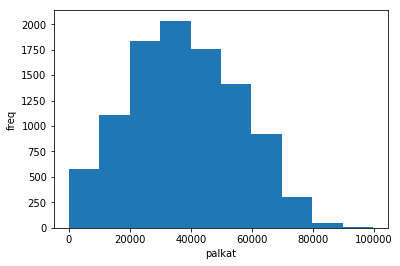

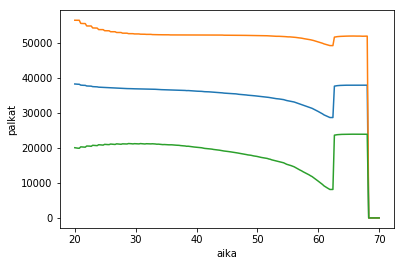

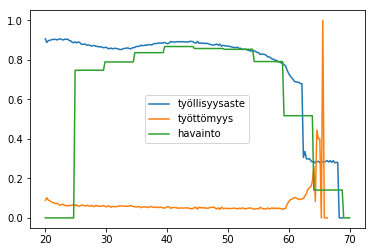

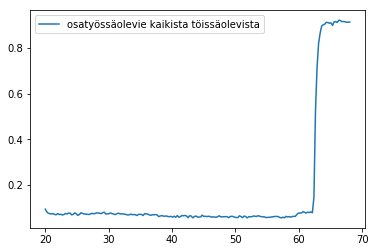

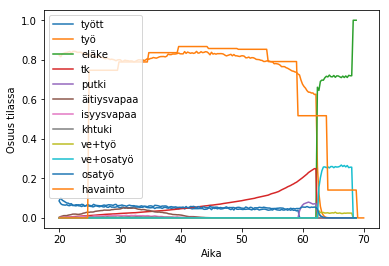

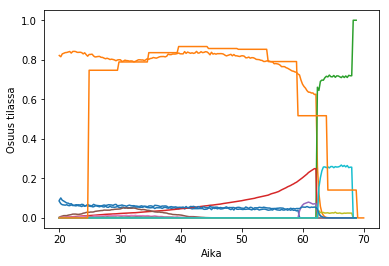

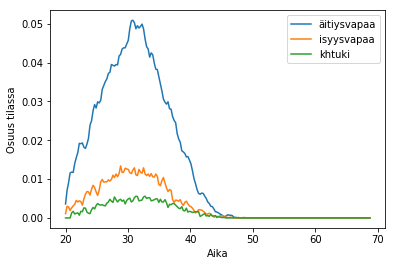

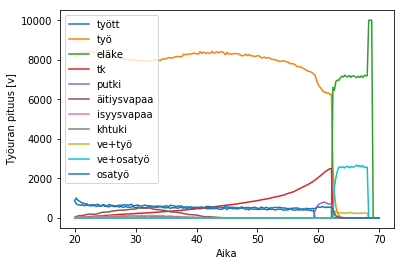

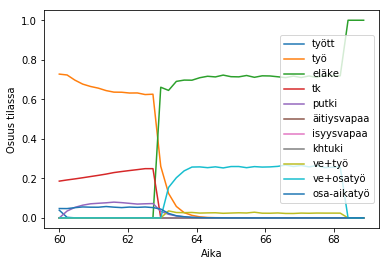

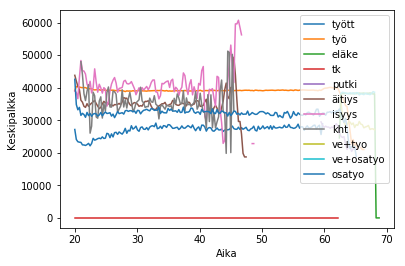

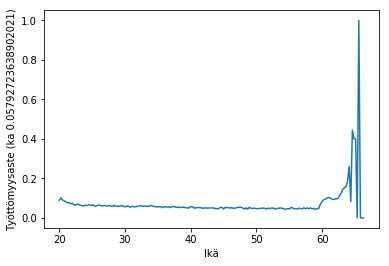

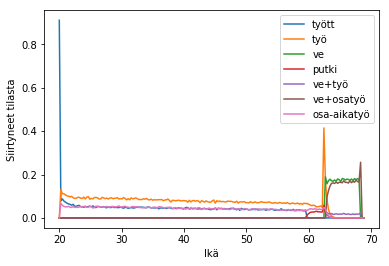

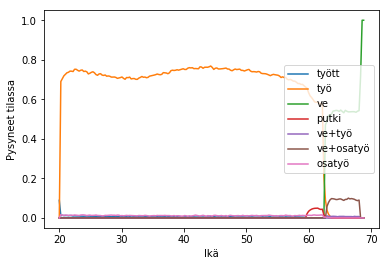

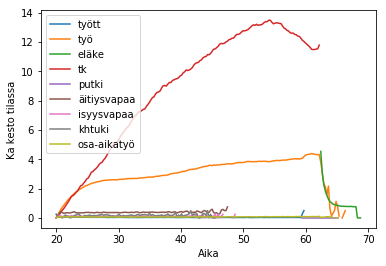

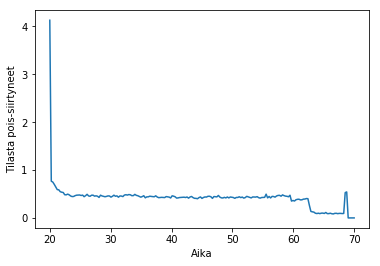

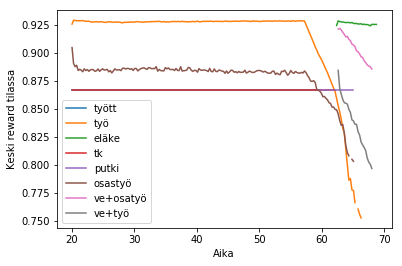

No handles with labels found to put in legend.


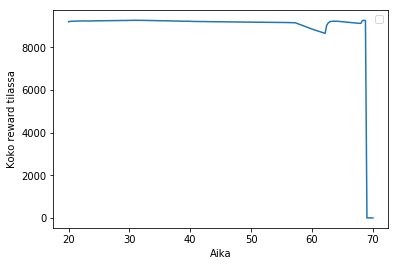

Yhteensä reward 183.42970347035876


In [6]:
cc1_toe=Lifecycle(EK=False,minimal=False,ansiopvraha_toe=1.0)
cc1_toe.run_RL(train=True,steps=25_000_000,cont=False,rlmodel='acktr',save='toe_12',pop=pop_size,start_from='perusmalli2')

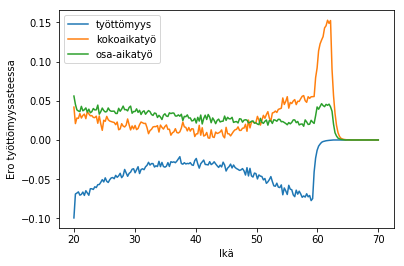

Työllisyysvaikutus noin 22937.0 htv ja 34481.0 työllistä (osatyö=0.5 htv)


In [7]:
cc1_toe.compare_with(cc1)

# Lomarahojen jaksotus

In [ ]:
#TBD

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.



Pop 10006: 100%|██████████| 10000/10000 [09:53<00:00, 16.94 p/s]

training...
----------------------------------
| explained_variance | -0.000998 |
| fps                | 1969      |
| nupdates           | 1         |
| policy_entropy     | 1.39      |
| policy_loss        | 15.2      |
| total_timesteps    | 0         |
| value_loss         | 122       |
----------------------------------
---------------------------------
| explained_variance | 0.727    |
| fps                | 2389     |
| nupdates           | 100      |
| policy_entropy     | 1.38     |
| policy_loss        | 0.0279   |
| total_timesteps    | 324819   |
| value_loss         | 0.0605   |
---------------------------------
---------------------------------
| explained_variance | 0.868    |
| fps                | 2379     |
| nupdates           | 200      |
| policy_entropy     | 1.36     |
| policy_loss        | -0.18    |
| total_timesteps    | 652919   |
| value_loss         | 0.0527   |
---------------------------------
---------------------------------
| explained_variance | 0.87

---------------------------------
| explained_variance | 0.978    |
| fps                | 2398     |
| nupdates           | 2700     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0183  |
| total_timesteps    | 8855419  |
| value_loss         | 0.00891  |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2398     |
| nupdates           | 2800     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0114  |
| total_timesteps    | 9183519  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2399     |
| nupdates           | 2900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0211  |
| total_timesteps    | 9511619  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2224     |
| nupdates           | 5400     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.0199  |
| total_timesteps    | 17714119 |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2208     |
| nupdates           | 5500     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0327  |
| total_timesteps    | 18042219 |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 2194     |
| nupdates           | 5600     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.017   |
| total_timesteps    | 18370319 |
| value_loss         | 0.0204   |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         




Population:   0%|          | 0/10000 [00:00<?, ? p/s]


Pop 7:   0%|          | 0/10000 [00:00<?, ? p/s]     


Pop 7:   0%|          | 1/10000 [00:00<1:35:25,  1.75 p/s]


Pop 8:   0%|          | 1/10000 [00:00<1:35:25,  1.75 p/s]


Pop 9:   0%|          | 2/10000 [00:00<1:35:24,  1.75 p/s]


Pop 10:   0%|          | 3/10000 [00:00<1:35:24,  1.75 p/s]


Pop 11:   0%|          | 4/10000 [00:00<1:35:23,  1.75 p/s]


Pop 12:   0%|          | 5/10000 [00:00<1:35:23,  1.75 p/s]


Pop 13:   0%|          | 6/10000 [00:00<1:35:22,  1.75 p/s]


Pop 14:   0%|          | 7/10000 [00:00<1:35:21,  1.75 p/s]


Pop 15:   0%|          | 8/10000 [00:01<1:35:21,  1.75 p/s]


Pop 15:   0%|          | 9/10000 [00:01<1:10:31,  2.36 p/s]


Pop 16:   0%|          | 9/10000 [00:01<1:10:31,  2.36 p/s]


Pop 17:   0%|          | 10/10000 [00:01<1:10:31,  2.36 p/s]


Pop 18:   0%|          | 11/10000 [00:01<1:10:31,  2.36 p/s]


Pop 19:   0%|          | 12/10000 [00:01<1:10:30,  2.36 p/s]


Pop 20:   0%|    

Pop 109:   1%|          | 102/10000 [00:07<13:45, 12.00 p/s]


Pop 110:   1%|          | 103/10000 [00:07<13:44, 12.00 p/s]


Pop 111:   1%|          | 104/10000 [00:08<13:44, 12.00 p/s]


Pop 111:   1%|          | 105/10000 [00:08<13:22, 12.33 p/s]


Pop 112:   1%|          | 105/10000 [00:08<13:22, 12.33 p/s]


Pop 113:   1%|          | 106/10000 [00:08<13:22, 12.33 p/s]


Pop 114:   1%|          | 107/10000 [00:08<13:22, 12.33 p/s]


Pop 115:   1%|          | 108/10000 [00:08<13:22, 12.33 p/s]


Pop 116:   1%|          | 109/10000 [00:08<13:22, 12.33 p/s]


Pop 117:   1%|          | 110/10000 [00:08<13:22, 12.33 p/s]


Pop 118:   1%|          | 111/10000 [00:08<13:22, 12.33 p/s]


Pop 119:   1%|          | 112/10000 [00:09<13:21, 12.33 p/s]


Pop 119:   1%|          | 113/10000 [00:09<13:00, 12.68 p/s]


Pop 120:   1%|          | 113/10000 [00:09<13:00, 12.68 p/s]


Pop 121:   1%|          | 114/10000 [00:09<12:59, 12.68 p/s]


Pop 122:   1%|          | 115/10000 [00:09<12:59, 12.68

Pop 209:   2%|▏         | 202/10000 [00:16<12:49, 12.73 p/s]


Pop 210:   2%|▏         | 203/10000 [00:16<12:49, 12.73 p/s]


Pop 211:   2%|▏         | 204/10000 [00:16<12:49, 12.73 p/s]


Pop 212:   2%|▏         | 205/10000 [00:16<12:49, 12.73 p/s]


Pop 213:   2%|▏         | 206/10000 [00:16<12:49, 12.73 p/s]


Pop 214:   2%|▏         | 207/10000 [00:16<12:49, 12.73 p/s]


Pop 215:   2%|▏         | 208/10000 [00:16<12:49, 12.73 p/s]


Pop 215:   2%|▏         | 209/10000 [00:16<12:51, 12.68 p/s]


Pop 216:   2%|▏         | 209/10000 [00:16<12:51, 12.68 p/s]


Pop 217:   2%|▏         | 210/10000 [00:16<12:51, 12.68 p/s]


Pop 218:   2%|▏         | 211/10000 [00:16<12:51, 12.68 p/s]


Pop 219:   2%|▏         | 212/10000 [00:16<12:51, 12.68 p/s]


Pop 220:   2%|▏         | 213/10000 [00:16<12:51, 12.68 p/s]


Pop 221:   2%|▏         | 214/10000 [00:16<12:51, 12.68 p/s]


Pop 222:   2%|▏         | 215/10000 [00:16<12:51, 12.68 p/s]


Pop 223:   2%|▏         | 216/10000 [00:17<12:51, 12.68

Pop 310:   3%|▎         | 303/10000 [00:23<12:39, 12.76 p/s]


Pop 311:   3%|▎         | 304/10000 [00:24<12:39, 12.76 p/s]


Pop 311:   3%|▎         | 305/10000 [00:24<12:39, 12.76 p/s]


Pop 312:   3%|▎         | 305/10000 [00:24<12:39, 12.76 p/s]


Pop 313:   3%|▎         | 306/10000 [00:24<12:39, 12.76 p/s]


Pop 314:   3%|▎         | 307/10000 [00:24<12:39, 12.76 p/s]


Pop 315:   3%|▎         | 308/10000 [00:24<12:39, 12.76 p/s]


Pop 316:   3%|▎         | 309/10000 [00:24<12:39, 12.76 p/s]


Pop 317:   3%|▎         | 310/10000 [00:24<12:39, 12.76 p/s]


Pop 318:   3%|▎         | 311/10000 [00:24<12:39, 12.76 p/s]


Pop 319:   3%|▎         | 312/10000 [00:24<12:38, 12.76 p/s]


Pop 319:   3%|▎         | 313/10000 [00:24<12:39, 12.76 p/s]


Pop 320:   3%|▎         | 313/10000 [00:24<12:39, 12.76 p/s]


Pop 321:   3%|▎         | 314/10000 [00:24<12:39, 12.76 p/s]


Pop 322:   3%|▎         | 315/10000 [00:24<12:39, 12.76 p/s]


Pop 323:   3%|▎         | 316/10000 [00:24<12:38, 12.76

Pop 410:   4%|▍         | 403/10000 [00:31<12:34, 12.73 p/s]


Pop 411:   4%|▍         | 404/10000 [00:31<12:34, 12.73 p/s]


Pop 412:   4%|▍         | 405/10000 [00:31<12:34, 12.73 p/s]


Pop 413:   4%|▍         | 406/10000 [00:31<12:33, 12.73 p/s]


Pop 414:   4%|▍         | 407/10000 [00:31<12:33, 12.73 p/s]


Pop 415:   4%|▍         | 408/10000 [00:32<12:33, 12.73 p/s]


Pop 415:   4%|▍         | 409/10000 [00:32<12:36, 12.68 p/s]


Pop 416:   4%|▍         | 409/10000 [00:32<12:36, 12.68 p/s]


Pop 417:   4%|▍         | 410/10000 [00:32<12:36, 12.68 p/s]


Pop 418:   4%|▍         | 411/10000 [00:32<12:35, 12.68 p/s]


Pop 419:   4%|▍         | 412/10000 [00:32<12:35, 12.68 p/s]


Pop 420:   4%|▍         | 413/10000 [00:32<12:35, 12.68 p/s]


Pop 421:   4%|▍         | 414/10000 [00:32<12:35, 12.68 p/s]


Pop 422:   4%|▍         | 415/10000 [00:32<12:35, 12.68 p/s]


Pop 423:   4%|▍         | 416/10000 [00:32<12:35, 12.68 p/s]


Pop 423:   4%|▍         | 417/10000 [00:33<12:25, 12.85

Pop 511:   5%|▌         | 504/10000 [00:39<12:11, 12.97 p/s]


Pop 511:   5%|▌         | 505/10000 [00:39<12:13, 12.95 p/s]


Pop 512:   5%|▌         | 505/10000 [00:39<12:13, 12.95 p/s]


Pop 513:   5%|▌         | 506/10000 [00:39<12:13, 12.95 p/s]


Pop 514:   5%|▌         | 507/10000 [00:39<12:13, 12.95 p/s]


Pop 515:   5%|▌         | 508/10000 [00:39<12:13, 12.95 p/s]


Pop 516:   5%|▌         | 509/10000 [00:39<12:13, 12.95 p/s]


Pop 517:   5%|▌         | 510/10000 [00:39<12:13, 12.95 p/s]


Pop 518:   5%|▌         | 511/10000 [00:39<12:13, 12.95 p/s]


Pop 519:   5%|▌         | 512/10000 [00:40<12:12, 12.95 p/s]


Pop 519:   5%|▌         | 513/10000 [00:40<12:15, 12.89 p/s]


Pop 520:   5%|▌         | 513/10000 [00:40<12:15, 12.89 p/s]


Pop 521:   5%|▌         | 514/10000 [00:40<12:15, 12.89 p/s]


Pop 522:   5%|▌         | 515/10000 [00:40<12:15, 12.89 p/s]


Pop 523:   5%|▌         | 516/10000 [00:40<12:15, 12.89 p/s]


Pop 524:   5%|▌         | 517/10000 [00:40<12:15, 12.89

Pop 611:   6%|▌         | 604/10000 [00:47<12:03, 12.98 p/s]


Pop 612:   6%|▌         | 605/10000 [00:47<12:03, 12.98 p/s]


Pop 613:   6%|▌         | 606/10000 [00:47<12:03, 12.98 p/s]


Pop 614:   6%|▌         | 607/10000 [00:47<12:03, 12.98 p/s]


Pop 615:   6%|▌         | 608/10000 [00:47<12:03, 12.98 p/s]


Pop 615:   6%|▌         | 609/10000 [00:47<12:01, 13.02 p/s]


Pop 616:   6%|▌         | 609/10000 [00:47<12:01, 13.02 p/s]


Pop 617:   6%|▌         | 610/10000 [00:47<12:01, 13.02 p/s]


Pop 618:   6%|▌         | 611/10000 [00:47<12:01, 13.02 p/s]


Pop 619:   6%|▌         | 612/10000 [00:47<12:00, 13.02 p/s]


Pop 620:   6%|▌         | 613/10000 [00:47<12:00, 13.02 p/s]


Pop 621:   6%|▌         | 614/10000 [00:47<12:00, 13.02 p/s]


Pop 622:   6%|▌         | 615/10000 [00:47<12:00, 13.02 p/s]


Pop 623:   6%|▌         | 616/10000 [00:48<12:00, 13.02 p/s]


Pop 623:   6%|▌         | 617/10000 [00:48<12:05, 12.94 p/s]


Pop 624:   6%|▌         | 617/10000 [00:48<12:05, 12.94

Pop 711:   7%|▋         | 705/10000 [00:55<11:40, 13.27 p/s]


Pop 712:   7%|▋         | 705/10000 [00:55<11:40, 13.27 p/s]


Pop 713:   7%|▋         | 706/10000 [00:55<11:40, 13.27 p/s]


Pop 714:   7%|▋         | 707/10000 [00:55<11:40, 13.27 p/s]


Pop 715:   7%|▋         | 708/10000 [00:55<11:40, 13.27 p/s]


Pop 716:   7%|▋         | 709/10000 [00:55<11:40, 13.27 p/s]


Pop 717:   7%|▋         | 710/10000 [00:55<11:40, 13.27 p/s]


Pop 718:   7%|▋         | 711/10000 [00:55<11:40, 13.27 p/s]


Pop 719:   7%|▋         | 712/10000 [00:55<11:40, 13.27 p/s]


Pop 719:   7%|▋         | 713/10000 [00:55<11:34, 13.38 p/s]


Pop 720:   7%|▋         | 713/10000 [00:55<11:34, 13.38 p/s]


Pop 721:   7%|▋         | 714/10000 [00:55<11:34, 13.38 p/s]


Pop 722:   7%|▋         | 715/10000 [00:55<11:34, 13.38 p/s]


Pop 723:   7%|▋         | 716/10000 [00:55<11:33, 13.38 p/s]


Pop 724:   7%|▋         | 717/10000 [00:55<11:33, 13.38 p/s]


Pop 725:   7%|▋         | 718/10000 [00:55<11:33, 13.38

Pop 812:   8%|▊         | 805/10000 [01:02<11:43, 13.07 p/s]


Pop 813:   8%|▊         | 806/10000 [01:02<11:43, 13.07 p/s]


Pop 814:   8%|▊         | 807/10000 [01:02<11:43, 13.07 p/s]


Pop 815:   8%|▊         | 808/10000 [01:02<11:43, 13.07 p/s]


Pop 815:   8%|▊         | 809/10000 [01:02<11:43, 13.07 p/s]


Pop 816:   8%|▊         | 809/10000 [01:02<11:43, 13.07 p/s]


Pop 817:   8%|▊         | 810/10000 [01:02<11:43, 13.07 p/s]


Pop 818:   8%|▊         | 811/10000 [01:02<11:43, 13.07 p/s]


Pop 819:   8%|▊         | 812/10000 [01:02<11:43, 13.07 p/s]


Pop 820:   8%|▊         | 813/10000 [01:02<11:43, 13.07 p/s]


Pop 821:   8%|▊         | 814/10000 [01:02<11:42, 13.07 p/s]


Pop 822:   8%|▊         | 815/10000 [01:02<11:42, 13.07 p/s]


Pop 823:   8%|▊         | 816/10000 [01:03<11:42, 13.07 p/s]


Pop 823:   8%|▊         | 817/10000 [01:03<11:45, 13.02 p/s]


Pop 824:   8%|▊         | 817/10000 [01:03<11:45, 13.02 p/s]


Pop 825:   8%|▊         | 818/10000 [01:03<11:45, 13.02

Pop 912:   9%|▉         | 905/10000 [01:10<12:02, 12.59 p/s]


Pop 913:   9%|▉         | 906/10000 [01:10<12:02, 12.59 p/s]


Pop 914:   9%|▉         | 907/10000 [01:10<12:02, 12.59 p/s]


Pop 915:   9%|▉         | 908/10000 [01:10<12:02, 12.59 p/s]


Pop 916:   9%|▉         | 909/10000 [01:10<12:02, 12.59 p/s]


Pop 917:   9%|▉         | 910/10000 [01:10<12:02, 12.59 p/s]


Pop 918:   9%|▉         | 911/10000 [01:10<12:02, 12.59 p/s]


Pop 919:   9%|▉         | 912/10000 [01:11<12:01, 12.59 p/s]


Pop 919:   9%|▉         | 913/10000 [01:11<11:50, 12.79 p/s]


Pop 920:   9%|▉         | 913/10000 [01:11<11:50, 12.79 p/s]


Pop 921:   9%|▉         | 914/10000 [01:11<11:50, 12.79 p/s]


Pop 922:   9%|▉         | 915/10000 [01:11<11:50, 12.79 p/s]


Pop 923:   9%|▉         | 916/10000 [01:11<11:50, 12.79 p/s]


Pop 924:   9%|▉         | 917/10000 [01:11<11:50, 12.79 p/s]


Pop 925:   9%|▉         | 918/10000 [01:11<11:50, 12.79 p/s]


Pop 926:   9%|▉         | 919/10000 [01:11<11:50, 12.79

Pop 1013:  10%|█         | 1006/10000 [01:18<11:53, 12.61 p/s]


Pop 1014:  10%|█         | 1007/10000 [01:18<11:53, 12.61 p/s]


Pop 1015:  10%|█         | 1008/10000 [01:18<11:53, 12.61 p/s]


Pop 1015:  10%|█         | 1009/10000 [01:18<11:43, 12.77 p/s]


Pop 1016:  10%|█         | 1009/10000 [01:18<11:43, 12.77 p/s]


Pop 1017:  10%|█         | 1010/10000 [01:18<11:43, 12.77 p/s]


Pop 1018:  10%|█         | 1011/10000 [01:18<11:43, 12.77 p/s]


Pop 1019:  10%|█         | 1012/10000 [01:18<11:43, 12.77 p/s]


Pop 1020:  10%|█         | 1013/10000 [01:18<11:43, 12.77 p/s]


Pop 1021:  10%|█         | 1014/10000 [01:18<11:43, 12.77 p/s]


Pop 1022:  10%|█         | 1015/10000 [01:18<11:43, 12.77 p/s]


Pop 1023:  10%|█         | 1016/10000 [01:19<11:43, 12.77 p/s]


Pop 1023:  10%|█         | 1017/10000 [01:19<11:34, 12.93 p/s]


Pop 1024:  10%|█         | 1017/10000 [01:19<11:34, 12.93 p/s]


Pop 1025:  10%|█         | 1018/10000 [01:19<11:34, 12.93 p/s]


Pop 1026:  10%|█         

Pop 1111:  11%|█         | 1104/10000 [01:26<11:38, 12.74 p/s]


Pop 1111:  11%|█         | 1105/10000 [01:26<11:33, 12.83 p/s]


Pop 1112:  11%|█         | 1105/10000 [01:26<11:33, 12.83 p/s]


Pop 1113:  11%|█         | 1106/10000 [01:26<11:33, 12.83 p/s]


Pop 1114:  11%|█         | 1107/10000 [01:26<11:32, 12.83 p/s]


Pop 1115:  11%|█         | 1108/10000 [01:26<11:32, 12.83 p/s]


Pop 1116:  11%|█         | 1109/10000 [01:26<11:32, 12.83 p/s]


Pop 1117:  11%|█         | 1110/10000 [01:26<11:32, 12.83 p/s]


Pop 1118:  11%|█         | 1111/10000 [01:26<11:32, 12.83 p/s]


Pop 1119:  11%|█         | 1112/10000 [01:26<11:32, 12.83 p/s]


Pop 1119:  11%|█         | 1113/10000 [01:26<11:19, 13.08 p/s]


Pop 1120:  11%|█         | 1113/10000 [01:26<11:19, 13.08 p/s]


Pop 1121:  11%|█         | 1114/10000 [01:26<11:19, 13.08 p/s]


Pop 1122:  11%|█         | 1115/10000 [01:26<11:19, 13.08 p/s]


Pop 1123:  11%|█         | 1116/10000 [01:26<11:19, 13.08 p/s]


Pop 1124:  11%|█         

Pop 1208:  12%|█▏        | 1201/10000 [01:33<11:19, 12.95 p/s]


Pop 1209:  12%|█▏        | 1202/10000 [01:33<11:19, 12.95 p/s]


Pop 1210:  12%|█▏        | 1203/10000 [01:33<11:19, 12.95 p/s]


Pop 1211:  12%|█▏        | 1204/10000 [01:33<11:19, 12.95 p/s]


Pop 1212:  12%|█▏        | 1205/10000 [01:33<11:18, 12.95 p/s]


Pop 1213:  12%|█▏        | 1206/10000 [01:33<11:18, 12.95 p/s]


Pop 1214:  12%|█▏        | 1207/10000 [01:33<11:18, 12.95 p/s]


Pop 1215:  12%|█▏        | 1208/10000 [01:34<11:18, 12.95 p/s]


Pop 1215:  12%|█▏        | 1209/10000 [01:34<11:09, 13.14 p/s]


Pop 1216:  12%|█▏        | 1209/10000 [01:34<11:09, 13.14 p/s]


Pop 1217:  12%|█▏        | 1210/10000 [01:34<11:08, 13.14 p/s]


Pop 1218:  12%|█▏        | 1211/10000 [01:34<11:08, 13.14 p/s]


Pop 1219:  12%|█▏        | 1212/10000 [01:34<11:08, 13.14 p/s]


Pop 1220:  12%|█▏        | 1213/10000 [01:34<11:08, 13.14 p/s]


Pop 1221:  12%|█▏        | 1214/10000 [01:34<11:08, 13.14 p/s]


Pop 1222:  12%|█▏        

Pop 1306:  13%|█▎        | 1299/10000 [01:41<11:17, 12.84 p/s]


Pop 1307:  13%|█▎        | 1300/10000 [01:41<11:17, 12.84 p/s]


Pop 1308:  13%|█▎        | 1301/10000 [01:41<11:17, 12.84 p/s]


Pop 1309:  13%|█▎        | 1302/10000 [01:41<11:17, 12.84 p/s]


Pop 1310:  13%|█▎        | 1303/10000 [01:41<11:17, 12.84 p/s]


Pop 1311:  13%|█▎        | 1304/10000 [01:41<11:17, 12.84 p/s]


Pop 1311:  13%|█▎        | 1305/10000 [01:41<11:09, 12.99 p/s]


Pop 1312:  13%|█▎        | 1305/10000 [01:41<11:09, 12.99 p/s]


Pop 1313:  13%|█▎        | 1306/10000 [01:41<11:09, 12.99 p/s]


Pop 1314:  13%|█▎        | 1307/10000 [01:41<11:09, 12.99 p/s]


Pop 1315:  13%|█▎        | 1308/10000 [01:41<11:09, 12.99 p/s]


Pop 1316:  13%|█▎        | 1309/10000 [01:41<11:09, 12.99 p/s]


Pop 1317:  13%|█▎        | 1310/10000 [01:41<11:09, 12.99 p/s]


Pop 1318:  13%|█▎        | 1311/10000 [01:41<11:09, 12.99 p/s]


Pop 1319:  13%|█▎        | 1312/10000 [01:42<11:09, 12.99 p/s]


Pop 1319:  13%|█▎        

Pop 1404:  14%|█▍        | 1397/10000 [01:48<10:44, 13.35 p/s]


Pop 1405:  14%|█▍        | 1398/10000 [01:48<10:44, 13.35 p/s]


Pop 1406:  14%|█▍        | 1399/10000 [01:48<10:44, 13.35 p/s]


Pop 1407:  14%|█▍        | 1400/10000 [01:48<10:44, 13.35 p/s]


Pop 1407:  14%|█▍        | 1401/10000 [01:48<10:35, 13.53 p/s]


Pop 1408:  14%|█▍        | 1401/10000 [01:48<10:35, 13.53 p/s]


Pop 1409:  14%|█▍        | 1402/10000 [01:48<10:35, 13.53 p/s]


Pop 1410:  14%|█▍        | 1403/10000 [01:48<10:35, 13.53 p/s]


Pop 1411:  14%|█▍        | 1404/10000 [01:48<10:35, 13.53 p/s]


Pop 1412:  14%|█▍        | 1405/10000 [01:48<10:35, 13.53 p/s]


Pop 1413:  14%|█▍        | 1406/10000 [01:48<10:35, 13.53 p/s]


Pop 1414:  14%|█▍        | 1407/10000 [01:48<10:34, 13.53 p/s]


Pop 1415:  14%|█▍        | 1408/10000 [01:49<10:34, 13.53 p/s]


Pop 1415:  14%|█▍        | 1409/10000 [01:49<10:31, 13.59 p/s]


Pop 1416:  14%|█▍        | 1409/10000 [01:49<10:31, 13.59 p/s]


Pop 1417:  14%|█▍        

Pop 1502:  15%|█▍        | 1495/10000 [01:55<10:36, 13.37 p/s]


Pop 1503:  15%|█▍        | 1496/10000 [01:55<10:36, 13.37 p/s]


Pop 1503:  15%|█▍        | 1497/10000 [01:55<10:33, 13.41 p/s]


Pop 1504:  15%|█▍        | 1497/10000 [01:55<10:33, 13.41 p/s]


Pop 1505:  15%|█▍        | 1498/10000 [01:55<10:33, 13.41 p/s]


Pop 1506:  15%|█▍        | 1499/10000 [01:55<10:33, 13.41 p/s]


Pop 1507:  15%|█▌        | 1500/10000 [01:55<10:33, 13.41 p/s]


Pop 1508:  15%|█▌        | 1501/10000 [01:55<10:33, 13.41 p/s]


Pop 1509:  15%|█▌        | 1502/10000 [01:55<10:33, 13.41 p/s]


Pop 1510:  15%|█▌        | 1503/10000 [01:55<10:33, 13.41 p/s]


Pop 1511:  15%|█▌        | 1504/10000 [01:56<10:33, 13.41 p/s]


Pop 1511:  15%|█▌        | 1505/10000 [01:56<10:32, 13.44 p/s]


Pop 1512:  15%|█▌        | 1505/10000 [01:56<10:32, 13.44 p/s]


Pop 1513:  15%|█▌        | 1506/10000 [01:56<10:31, 13.44 p/s]


Pop 1514:  15%|█▌        | 1507/10000 [01:56<10:31, 13.44 p/s]


Pop 1515:  15%|█▌        

Pop 1599:  16%|█▌        | 1593/10000 [02:02<10:25, 13.43 p/s]


Pop 1600:  16%|█▌        | 1593/10000 [02:02<10:25, 13.43 p/s]


Pop 1601:  16%|█▌        | 1594/10000 [02:02<10:25, 13.43 p/s]


Pop 1602:  16%|█▌        | 1595/10000 [02:02<10:25, 13.43 p/s]


Pop 1603:  16%|█▌        | 1596/10000 [02:02<10:25, 13.43 p/s]


Pop 1604:  16%|█▌        | 1597/10000 [02:03<10:25, 13.43 p/s]


Pop 1605:  16%|█▌        | 1598/10000 [02:03<10:25, 13.43 p/s]


Pop 1606:  16%|█▌        | 1599/10000 [02:03<10:25, 13.43 p/s]


Pop 1607:  16%|█▌        | 1600/10000 [02:03<10:25, 13.43 p/s]


Pop 1607:  16%|█▌        | 1601/10000 [02:03<10:33, 13.26 p/s]


Pop 1608:  16%|█▌        | 1601/10000 [02:03<10:33, 13.26 p/s]


Pop 1609:  16%|█▌        | 1602/10000 [02:03<10:33, 13.26 p/s]


Pop 1610:  16%|█▌        | 1603/10000 [02:03<10:33, 13.26 p/s]


Pop 1611:  16%|█▌        | 1604/10000 [02:03<10:33, 13.26 p/s]


Pop 1612:  16%|█▌        | 1605/10000 [02:03<10:33, 13.26 p/s]


Pop 1613:  16%|█▌        

Pop 1697:  17%|█▋        | 1690/10000 [02:10<10:58, 12.62 p/s]


Pop 1698:  17%|█▋        | 1691/10000 [02:10<10:58, 12.62 p/s]


Pop 1699:  17%|█▋        | 1692/10000 [02:10<10:58, 12.62 p/s]


Pop 1700:  17%|█▋        | 1693/10000 [02:10<10:57, 12.62 p/s]


Pop 1701:  17%|█▋        | 1694/10000 [02:10<10:57, 12.62 p/s]


Pop 1702:  17%|█▋        | 1695/10000 [02:10<10:57, 12.62 p/s]


Pop 1703:  17%|█▋        | 1696/10000 [02:11<10:57, 12.62 p/s]


Pop 1703:  17%|█▋        | 1697/10000 [02:11<11:08, 12.42 p/s]


Pop 1704:  17%|█▋        | 1697/10000 [02:11<11:08, 12.42 p/s]


Pop 1705:  17%|█▋        | 1698/10000 [02:11<11:08, 12.42 p/s]


Pop 1706:  17%|█▋        | 1699/10000 [02:11<11:08, 12.42 p/s]


Pop 1707:  17%|█▋        | 1700/10000 [02:11<11:08, 12.42 p/s]


Pop 1708:  17%|█▋        | 1701/10000 [02:11<11:08, 12.42 p/s]


Pop 1709:  17%|█▋        | 1702/10000 [02:11<11:08, 12.42 p/s]


Pop 1710:  17%|█▋        | 1703/10000 [02:11<11:08, 12.42 p/s]


Pop 1711:  17%|█▋        

Pop 1795:  18%|█▊        | 1788/10000 [02:17<10:25, 13.13 p/s]


Pop 1796:  18%|█▊        | 1789/10000 [02:17<10:25, 13.13 p/s]


Pop 1797:  18%|█▊        | 1790/10000 [02:17<10:25, 13.13 p/s]


Pop 1798:  18%|█▊        | 1791/10000 [02:17<10:25, 13.13 p/s]


Pop 1799:  18%|█▊        | 1792/10000 [02:18<10:25, 13.13 p/s]


Pop 1799:  18%|█▊        | 1793/10000 [02:18<10:38, 12.86 p/s]


Pop 1800:  18%|█▊        | 1793/10000 [02:18<10:38, 12.86 p/s]


Pop 1801:  18%|█▊        | 1794/10000 [02:18<10:38, 12.86 p/s]


Pop 1802:  18%|█▊        | 1795/10000 [02:18<10:38, 12.86 p/s]


Pop 1803:  18%|█▊        | 1796/10000 [02:18<10:38, 12.86 p/s]


Pop 1804:  18%|█▊        | 1797/10000 [02:18<10:38, 12.86 p/s]


Pop 1805:  18%|█▊        | 1798/10000 [02:18<10:38, 12.86 p/s]


Pop 1806:  18%|█▊        | 1799/10000 [02:18<10:37, 12.86 p/s]


Pop 1807:  18%|█▊        | 1800/10000 [02:19<10:37, 12.86 p/s]


Pop 1807:  18%|█▊        | 1801/10000 [02:19<10:33, 12.94 p/s]


Pop 1808:  18%|█▊        

Pop 1893:  19%|█▉        | 1886/10000 [02:25<10:06, 13.39 p/s]


Pop 1894:  19%|█▉        | 1887/10000 [02:25<10:06, 13.39 p/s]


Pop 1895:  19%|█▉        | 1888/10000 [02:25<10:05, 13.39 p/s]


Pop 1895:  19%|█▉        | 1889/10000 [02:25<10:08, 13.33 p/s]


Pop 1896:  19%|█▉        | 1889/10000 [02:25<10:08, 13.33 p/s]


Pop 1897:  19%|█▉        | 1890/10000 [02:25<10:08, 13.33 p/s]


Pop 1898:  19%|█▉        | 1891/10000 [02:25<10:08, 13.33 p/s]


Pop 1899:  19%|█▉        | 1892/10000 [02:25<10:08, 13.33 p/s]


Pop 1900:  19%|█▉        | 1893/10000 [02:25<10:08, 13.33 p/s]


Pop 1901:  19%|█▉        | 1894/10000 [02:25<10:08, 13.33 p/s]


Pop 1902:  19%|█▉        | 1895/10000 [02:25<10:07, 13.33 p/s]


Pop 1903:  19%|█▉        | 1896/10000 [02:26<10:07, 13.33 p/s]


Pop 1903:  19%|█▉        | 1897/10000 [02:26<10:03, 13.42 p/s]


Pop 1904:  19%|█▉        | 1897/10000 [02:26<10:03, 13.42 p/s]


Pop 1905:  19%|█▉        | 1898/10000 [02:26<10:03, 13.42 p/s]


Pop 1906:  19%|█▉        

Pop 1991:  20%|█▉        | 1984/10000 [02:32<09:48, 13.63 p/s]


Pop 1991:  20%|█▉        | 1985/10000 [02:32<09:50, 13.57 p/s]


Pop 1992:  20%|█▉        | 1985/10000 [02:32<09:50, 13.57 p/s]


Pop 1993:  20%|█▉        | 1986/10000 [02:32<09:50, 13.57 p/s]


Pop 1994:  20%|█▉        | 1987/10000 [02:32<09:50, 13.57 p/s]


Pop 1995:  20%|█▉        | 1988/10000 [02:32<09:50, 13.57 p/s]


Pop 1996:  20%|█▉        | 1989/10000 [02:32<09:50, 13.57 p/s]


Pop 1997:  20%|█▉        | 1990/10000 [02:32<09:50, 13.57 p/s]


Pop 1998:  20%|█▉        | 1991/10000 [02:32<09:50, 13.57 p/s]


Pop 1999:  20%|█▉        | 1992/10000 [02:33<09:50, 13.57 p/s]


Pop 1999:  20%|█▉        | 1993/10000 [02:33<09:46, 13.65 p/s]


Pop 2000:  20%|█▉        | 1993/10000 [02:33<09:46, 13.65 p/s]


Pop 2001:  20%|█▉        | 1994/10000 [02:33<09:46, 13.65 p/s]


Pop 2002:  20%|█▉        | 1995/10000 [02:33<09:46, 13.65 p/s]


Pop 2003:  20%|█▉        | 1996/10000 [02:33<09:46, 13.65 p/s]


Pop 2004:  20%|█▉        

Pop 2087:  21%|██        | 2081/10000 [02:39<11:36, 11.37 p/s]


Pop 2088:  21%|██        | 2081/10000 [02:39<11:36, 11.37 p/s]


Pop 2089:  21%|██        | 2082/10000 [02:39<11:36, 11.37 p/s]


Pop 2090:  21%|██        | 2083/10000 [02:39<11:36, 11.37 p/s]


Pop 2091:  21%|██        | 2084/10000 [02:39<11:36, 11.37 p/s]


Pop 2092:  21%|██        | 2085/10000 [02:39<11:36, 11.37 p/s]


Pop 2093:  21%|██        | 2086/10000 [02:39<11:36, 11.37 p/s]


Pop 2094:  21%|██        | 2087/10000 [02:39<11:36, 11.37 p/s]


Pop 2095:  21%|██        | 2088/10000 [02:40<11:36, 11.37 p/s]


Pop 2095:  21%|██        | 2089/10000 [02:40<11:06, 11.86 p/s]


Pop 2096:  21%|██        | 2089/10000 [02:40<11:06, 11.86 p/s]


Pop 2097:  21%|██        | 2090/10000 [02:40<11:06, 11.86 p/s]


Pop 2098:  21%|██        | 2091/10000 [02:40<11:06, 11.86 p/s]


Pop 2099:  21%|██        | 2092/10000 [02:40<11:06, 11.86 p/s]


Pop 2100:  21%|██        | 2093/10000 [02:40<11:06, 11.86 p/s]


Pop 2101:  21%|██        

Pop 2185:  22%|██▏       | 2178/10000 [02:47<09:47, 13.32 p/s]


Pop 2186:  22%|██▏       | 2179/10000 [02:47<09:47, 13.32 p/s]


Pop 2187:  22%|██▏       | 2180/10000 [02:47<09:47, 13.32 p/s]


Pop 2188:  22%|██▏       | 2181/10000 [02:47<09:46, 13.32 p/s]


Pop 2189:  22%|██▏       | 2182/10000 [02:47<09:46, 13.32 p/s]


Pop 2190:  22%|██▏       | 2183/10000 [02:47<09:46, 13.32 p/s]


Pop 2191:  22%|██▏       | 2184/10000 [02:47<09:46, 13.32 p/s]


Pop 2191:  22%|██▏       | 2185/10000 [02:47<09:40, 13.45 p/s]


Pop 2192:  22%|██▏       | 2185/10000 [02:47<09:40, 13.45 p/s]


Pop 2193:  22%|██▏       | 2186/10000 [02:47<09:40, 13.45 p/s]


Pop 2194:  22%|██▏       | 2187/10000 [02:47<09:40, 13.45 p/s]


Pop 2195:  22%|██▏       | 2188/10000 [02:47<09:40, 13.45 p/s]


Pop 2196:  22%|██▏       | 2189/10000 [02:47<09:40, 13.45 p/s]


Pop 2197:  22%|██▏       | 2190/10000 [02:47<09:40, 13.45 p/s]


Pop 2198:  22%|██▏       | 2191/10000 [02:47<09:40, 13.45 p/s]


Pop 2199:  22%|██▏       

Pop 2283:  23%|██▎       | 2276/10000 [02:54<09:32, 13.49 p/s]


Pop 2284:  23%|██▎       | 2277/10000 [02:54<09:32, 13.49 p/s]


Pop 2285:  23%|██▎       | 2278/10000 [02:54<09:32, 13.49 p/s]


Pop 2286:  23%|██▎       | 2279/10000 [02:54<09:32, 13.49 p/s]


Pop 2287:  23%|██▎       | 2280/10000 [02:54<09:32, 13.49 p/s]


Pop 2287:  23%|██▎       | 2281/10000 [02:54<09:23, 13.69 p/s]


Pop 2288:  23%|██▎       | 2281/10000 [02:54<09:23, 13.69 p/s]


Pop 2289:  23%|██▎       | 2282/10000 [02:54<09:23, 13.69 p/s]


Pop 2290:  23%|██▎       | 2283/10000 [02:54<09:23, 13.69 p/s]


Pop 2291:  23%|██▎       | 2284/10000 [02:54<09:23, 13.69 p/s]


Pop 2292:  23%|██▎       | 2285/10000 [02:54<09:23, 13.69 p/s]


Pop 2293:  23%|██▎       | 2286/10000 [02:54<09:23, 13.69 p/s]


Pop 2294:  23%|██▎       | 2287/10000 [02:54<09:23, 13.69 p/s]


Pop 2295:  23%|██▎       | 2288/10000 [02:55<09:23, 13.69 p/s]


Pop 2295:  23%|██▎       | 2289/10000 [02:55<09:17, 13.83 p/s]


Pop 2296:  23%|██▎       

Pop 2381:  24%|██▎       | 2374/10000 [03:01<09:14, 13.76 p/s]


Pop 2382:  24%|██▍       | 2375/10000 [03:01<09:14, 13.76 p/s]


Pop 2383:  24%|██▍       | 2376/10000 [03:01<09:14, 13.76 p/s]


Pop 2383:  24%|██▍       | 2377/10000 [03:01<09:10, 13.84 p/s]


Pop 2384:  24%|██▍       | 2377/10000 [03:01<09:10, 13.84 p/s]


Pop 2385:  24%|██▍       | 2378/10000 [03:01<09:10, 13.84 p/s]


Pop 2386:  24%|██▍       | 2379/10000 [03:01<09:10, 13.84 p/s]


Pop 2387:  24%|██▍       | 2380/10000 [03:01<09:10, 13.84 p/s]


Pop 2388:  24%|██▍       | 2381/10000 [03:01<09:10, 13.84 p/s]


Pop 2389:  24%|██▍       | 2382/10000 [03:01<09:10, 13.84 p/s]


Pop 2390:  24%|██▍       | 2383/10000 [03:01<09:10, 13.84 p/s]


Pop 2391:  24%|██▍       | 2384/10000 [03:02<09:10, 13.84 p/s]


Pop 2391:  24%|██▍       | 2385/10000 [03:02<09:13, 13.75 p/s]


Pop 2392:  24%|██▍       | 2385/10000 [03:02<09:13, 13.75 p/s]


Pop 2393:  24%|██▍       | 2386/10000 [03:02<09:13, 13.75 p/s]


Pop 2394:  24%|██▍       

Pop 2479:  25%|██▍       | 2472/10000 [03:08<09:23, 13.35 p/s]


Pop 2479:  25%|██▍       | 2473/10000 [03:08<09:25, 13.31 p/s]


Pop 2480:  25%|██▍       | 2473/10000 [03:08<09:25, 13.31 p/s]


Pop 2481:  25%|██▍       | 2474/10000 [03:08<09:25, 13.31 p/s]


Pop 2482:  25%|██▍       | 2475/10000 [03:09<09:25, 13.31 p/s]


Pop 2483:  25%|██▍       | 2476/10000 [03:09<09:25, 13.31 p/s]


Pop 2484:  25%|██▍       | 2477/10000 [03:09<09:25, 13.31 p/s]


Pop 2485:  25%|██▍       | 2478/10000 [03:09<09:25, 13.31 p/s]


Pop 2486:  25%|██▍       | 2479/10000 [03:09<09:25, 13.31 p/s]


Pop 2487:  25%|██▍       | 2480/10000 [03:09<09:25, 13.31 p/s]


Pop 2487:  25%|██▍       | 2481/10000 [03:09<09:25, 13.30 p/s]


Pop 2488:  25%|██▍       | 2481/10000 [03:09<09:25, 13.30 p/s]


Pop 2489:  25%|██▍       | 2482/10000 [03:09<09:25, 13.30 p/s]


Pop 2490:  25%|██▍       | 2483/10000 [03:09<09:25, 13.30 p/s]


Pop 2491:  25%|██▍       | 2484/10000 [03:09<09:25, 13.30 p/s]


Pop 2492:  25%|██▍       

Pop 2576:  26%|██▌       | 2569/10000 [03:16<09:26, 13.12 p/s]


Pop 2577:  26%|██▌       | 2570/10000 [03:16<09:26, 13.12 p/s]


Pop 2578:  26%|██▌       | 2571/10000 [03:16<09:26, 13.12 p/s]


Pop 2579:  26%|██▌       | 2572/10000 [03:16<09:26, 13.12 p/s]


Pop 2580:  26%|██▌       | 2573/10000 [03:16<09:26, 13.12 p/s]


Pop 2581:  26%|██▌       | 2574/10000 [03:16<09:26, 13.12 p/s]


Pop 2582:  26%|██▌       | 2575/10000 [03:16<09:25, 13.12 p/s]


Pop 2583:  26%|██▌       | 2576/10000 [03:16<09:25, 13.12 p/s]


Pop 2583:  26%|██▌       | 2577/10000 [03:16<09:32, 12.97 p/s]


Pop 2584:  26%|██▌       | 2577/10000 [03:16<09:32, 12.97 p/s]


Pop 2585:  26%|██▌       | 2578/10000 [03:16<09:32, 12.97 p/s]


Pop 2586:  26%|██▌       | 2579/10000 [03:16<09:32, 12.97 p/s]


Pop 2587:  26%|██▌       | 2580/10000 [03:16<09:32, 12.97 p/s]


Pop 2588:  26%|██▌       | 2581/10000 [03:16<09:32, 12.97 p/s]


Pop 2589:  26%|██▌       | 2582/10000 [03:16<09:32, 12.97 p/s]


Pop 2590:  26%|██▌       

Pop 2674:  27%|██▋       | 2667/10000 [03:23<09:06, 13.42 p/s]


Pop 2675:  27%|██▋       | 2668/10000 [03:23<09:06, 13.42 p/s]


Pop 2676:  27%|██▋       | 2669/10000 [03:23<09:06, 13.42 p/s]


Pop 2677:  27%|██▋       | 2670/10000 [03:23<09:06, 13.42 p/s]


Pop 2678:  27%|██▋       | 2671/10000 [03:23<09:06, 13.42 p/s]


Pop 2679:  27%|██▋       | 2672/10000 [03:24<09:06, 13.42 p/s]


Pop 2679:  27%|██▋       | 2673/10000 [03:24<09:06, 13.42 p/s]


Pop 2680:  27%|██▋       | 2673/10000 [03:24<09:06, 13.42 p/s]


Pop 2681:  27%|██▋       | 2674/10000 [03:24<09:06, 13.42 p/s]


Pop 2682:  27%|██▋       | 2675/10000 [03:24<09:05, 13.42 p/s]


Pop 2683:  27%|██▋       | 2676/10000 [03:24<09:05, 13.42 p/s]


Pop 2684:  27%|██▋       | 2677/10000 [03:24<09:05, 13.42 p/s]


Pop 2685:  27%|██▋       | 2678/10000 [03:24<09:05, 13.42 p/s]


Pop 2686:  27%|██▋       | 2679/10000 [03:24<09:05, 13.42 p/s]


Pop 2687:  27%|██▋       | 2680/10000 [03:24<09:05, 13.42 p/s]


Pop 2687:  27%|██▋       

Pop 2772:  28%|██▊       | 2765/10000 [03:30<09:07, 13.21 p/s]


Pop 2773:  28%|██▊       | 2766/10000 [03:30<09:07, 13.21 p/s]


Pop 2774:  28%|██▊       | 2767/10000 [03:30<09:07, 13.21 p/s]


Pop 2775:  28%|██▊       | 2768/10000 [03:31<09:07, 13.21 p/s]


Pop 2775:  28%|██▊       | 2769/10000 [03:31<09:14, 13.04 p/s]


Pop 2776:  28%|██▊       | 2769/10000 [03:31<09:14, 13.04 p/s]


Pop 2777:  28%|██▊       | 2770/10000 [03:31<09:14, 13.04 p/s]


Pop 2778:  28%|██▊       | 2771/10000 [03:31<09:14, 13.04 p/s]


Pop 2779:  28%|██▊       | 2772/10000 [03:31<09:14, 13.04 p/s]


Pop 2780:  28%|██▊       | 2773/10000 [03:31<09:14, 13.04 p/s]


Pop 2781:  28%|██▊       | 2774/10000 [03:31<09:14, 13.04 p/s]


Pop 2782:  28%|██▊       | 2775/10000 [03:31<09:14, 13.04 p/s]


Pop 2783:  28%|██▊       | 2776/10000 [03:32<09:14, 13.04 p/s]


Pop 2783:  28%|██▊       | 2777/10000 [03:32<09:15, 13.00 p/s]


Pop 2784:  28%|██▊       | 2777/10000 [03:32<09:15, 13.00 p/s]


Pop 2785:  28%|██▊       

Pop 2870:  29%|██▊       | 2863/10000 [03:38<08:58, 13.25 p/s]


Pop 2871:  29%|██▊       | 2864/10000 [03:38<08:58, 13.25 p/s]


Pop 2871:  29%|██▊       | 2865/10000 [03:38<08:58, 13.26 p/s]


Pop 2872:  29%|██▊       | 2865/10000 [03:38<08:58, 13.26 p/s]


Pop 2873:  29%|██▊       | 2866/10000 [03:38<08:58, 13.26 p/s]


Pop 2874:  29%|██▊       | 2867/10000 [03:38<08:58, 13.26 p/s]


Pop 2875:  29%|██▊       | 2868/10000 [03:38<08:57, 13.26 p/s]


Pop 2876:  29%|██▊       | 2869/10000 [03:38<08:57, 13.26 p/s]


Pop 2877:  29%|██▊       | 2870/10000 [03:38<08:57, 13.26 p/s]


Pop 2878:  29%|██▊       | 2871/10000 [03:38<08:57, 13.26 p/s]


Pop 2879:  29%|██▊       | 2872/10000 [03:39<08:57, 13.26 p/s]


Pop 2879:  29%|██▊       | 2873/10000 [03:39<09:00, 13.18 p/s]


Pop 2880:  29%|██▊       | 2873/10000 [03:39<09:00, 13.18 p/s]


Pop 2881:  29%|██▊       | 2874/10000 [03:39<09:00, 13.18 p/s]


Pop 2882:  29%|██▉       | 2875/10000 [03:39<09:00, 13.18 p/s]


Pop 2883:  29%|██▉       

Pop 2967:  30%|██▉       | 2961/10000 [03:46<08:50, 13.28 p/s]


Pop 2968:  30%|██▉       | 2961/10000 [03:46<08:50, 13.28 p/s]


Pop 2969:  30%|██▉       | 2962/10000 [03:46<08:50, 13.28 p/s]


Pop 2970:  30%|██▉       | 2963/10000 [03:46<08:50, 13.28 p/s]


Pop 2971:  30%|██▉       | 2964/10000 [03:46<08:50, 13.28 p/s]


Pop 2972:  30%|██▉       | 2965/10000 [03:46<08:49, 13.28 p/s]


Pop 2973:  30%|██▉       | 2966/10000 [03:46<08:49, 13.28 p/s]


Pop 2974:  30%|██▉       | 2967/10000 [03:46<08:49, 13.28 p/s]


Pop 2975:  30%|██▉       | 2968/10000 [03:46<08:49, 13.28 p/s]


Pop 2975:  30%|██▉       | 2969/10000 [03:46<08:50, 13.25 p/s]


Pop 2976:  30%|██▉       | 2969/10000 [03:46<08:50, 13.25 p/s]


Pop 2977:  30%|██▉       | 2970/10000 [03:46<08:50, 13.25 p/s]


Pop 2978:  30%|██▉       | 2971/10000 [03:46<08:50, 13.25 p/s]


Pop 2979:  30%|██▉       | 2972/10000 [03:46<08:50, 13.25 p/s]


Pop 2980:  30%|██▉       | 2973/10000 [03:46<08:50, 13.25 p/s]


Pop 2981:  30%|██▉       

Pop 3065:  31%|███       | 3058/10000 [03:53<08:38, 13.39 p/s]


Pop 3066:  31%|███       | 3059/10000 [03:53<08:38, 13.39 p/s]


Pop 3067:  31%|███       | 3060/10000 [03:53<08:38, 13.39 p/s]


Pop 3068:  31%|███       | 3061/10000 [03:53<08:38, 13.39 p/s]


Pop 3069:  31%|███       | 3062/10000 [03:53<08:38, 13.39 p/s]


Pop 3070:  31%|███       | 3063/10000 [03:53<08:38, 13.39 p/s]


Pop 3071:  31%|███       | 3064/10000 [03:53<08:38, 13.39 p/s]


Pop 3071:  31%|███       | 3065/10000 [03:53<08:34, 13.49 p/s]


Pop 3072:  31%|███       | 3065/10000 [03:53<08:34, 13.49 p/s]


Pop 3073:  31%|███       | 3066/10000 [03:53<08:34, 13.49 p/s]


Pop 3074:  31%|███       | 3067/10000 [03:53<08:34, 13.49 p/s]


Pop 3075:  31%|███       | 3068/10000 [03:53<08:34, 13.49 p/s]


Pop 3076:  31%|███       | 3069/10000 [03:53<08:33, 13.49 p/s]


Pop 3077:  31%|███       | 3070/10000 [03:53<08:33, 13.49 p/s]


Pop 3078:  31%|███       | 3071/10000 [03:53<08:33, 13.49 p/s]


Pop 3079:  31%|███       

Pop 3163:  32%|███▏      | 3156/10000 [04:00<08:46, 13.01 p/s]


Pop 3164:  32%|███▏      | 3157/10000 [04:00<08:45, 13.01 p/s]


Pop 3165:  32%|███▏      | 3158/10000 [04:00<08:45, 13.01 p/s]


Pop 3166:  32%|███▏      | 3159/10000 [04:00<08:45, 13.01 p/s]


Pop 3167:  32%|███▏      | 3160/10000 [04:01<08:45, 13.01 p/s]


Pop 3167:  32%|███▏      | 3161/10000 [04:01<08:47, 12.98 p/s]


Pop 3168:  32%|███▏      | 3161/10000 [04:01<08:47, 12.98 p/s]


Pop 3169:  32%|███▏      | 3162/10000 [04:01<08:46, 12.98 p/s]


Pop 3170:  32%|███▏      | 3163/10000 [04:01<08:46, 12.98 p/s]


Pop 3171:  32%|███▏      | 3164/10000 [04:01<08:46, 12.98 p/s]


Pop 3172:  32%|███▏      | 3165/10000 [04:01<08:46, 12.98 p/s]


Pop 3173:  32%|███▏      | 3166/10000 [04:01<08:46, 12.98 p/s]


Pop 3174:  32%|███▏      | 3167/10000 [04:01<08:46, 12.98 p/s]


Pop 3175:  32%|███▏      | 3168/10000 [04:01<08:46, 12.98 p/s]


Pop 3175:  32%|███▏      | 3169/10000 [04:01<08:42, 13.06 p/s]


Pop 3176:  32%|███▏      

Pop 3261:  33%|███▎      | 3254/10000 [04:07<08:28, 13.26 p/s]


Pop 3262:  33%|███▎      | 3255/10000 [04:07<08:28, 13.26 p/s]


Pop 3263:  33%|███▎      | 3256/10000 [04:08<08:28, 13.26 p/s]


Pop 3263:  33%|███▎      | 3257/10000 [04:08<08:22, 13.42 p/s]


Pop 3264:  33%|███▎      | 3257/10000 [04:08<08:22, 13.42 p/s]


Pop 3265:  33%|███▎      | 3258/10000 [04:08<08:22, 13.42 p/s]


Pop 3266:  33%|███▎      | 3259/10000 [04:08<08:22, 13.42 p/s]


Pop 3267:  33%|███▎      | 3260/10000 [04:08<08:22, 13.42 p/s]


Pop 3268:  33%|███▎      | 3261/10000 [04:08<08:22, 13.42 p/s]


Pop 3269:  33%|███▎      | 3262/10000 [04:08<08:22, 13.42 p/s]


Pop 3270:  33%|███▎      | 3263/10000 [04:08<08:22, 13.42 p/s]


Pop 3271:  33%|███▎      | 3264/10000 [04:08<08:22, 13.42 p/s]


Pop 3271:  33%|███▎      | 3265/10000 [04:08<08:18, 13.51 p/s]


Pop 3272:  33%|███▎      | 3265/10000 [04:08<08:18, 13.51 p/s]


Pop 3273:  33%|███▎      | 3266/10000 [04:08<08:18, 13.51 p/s]


Pop 3274:  33%|███▎      

Pop 3359:  34%|███▎      | 3352/10000 [04:15<08:19, 13.32 p/s]


Pop 3359:  34%|███▎      | 3353/10000 [04:15<08:25, 13.16 p/s]


Pop 3360:  34%|███▎      | 3353/10000 [04:15<08:25, 13.16 p/s]


Pop 3361:  34%|███▎      | 3354/10000 [04:15<08:25, 13.16 p/s]


Pop 3362:  34%|███▎      | 3355/10000 [04:15<08:24, 13.16 p/s]


Pop 3363:  34%|███▎      | 3356/10000 [04:15<08:24, 13.16 p/s]


Pop 3364:  34%|███▎      | 3357/10000 [04:15<08:24, 13.16 p/s]


Pop 3365:  34%|███▎      | 3358/10000 [04:15<08:24, 13.16 p/s]


Pop 3366:  34%|███▎      | 3359/10000 [04:15<08:24, 13.16 p/s]


Pop 3367:  34%|███▎      | 3360/10000 [04:16<08:24, 13.16 p/s]


Pop 3367:  34%|███▎      | 3361/10000 [04:16<08:25, 13.14 p/s]


Pop 3368:  34%|███▎      | 3361/10000 [04:16<08:25, 13.14 p/s]


Pop 3369:  34%|███▎      | 3362/10000 [04:16<08:25, 13.14 p/s]


Pop 3370:  34%|███▎      | 3363/10000 [04:16<08:25, 13.14 p/s]


Pop 3371:  34%|███▎      | 3364/10000 [04:16<08:25, 13.14 p/s]


Pop 3372:  34%|███▎      

Pop 3456:  34%|███▍      | 3449/10000 [04:23<08:20, 13.09 p/s]


Pop 3457:  34%|███▍      | 3450/10000 [04:23<08:20, 13.09 p/s]


Pop 3458:  35%|███▍      | 3451/10000 [04:23<08:20, 13.09 p/s]


Pop 3459:  35%|███▍      | 3452/10000 [04:23<08:20, 13.09 p/s]


Pop 3460:  35%|███▍      | 3453/10000 [04:23<08:20, 13.09 p/s]


Pop 3461:  35%|███▍      | 3454/10000 [04:23<08:20, 13.09 p/s]


Pop 3462:  35%|███▍      | 3455/10000 [04:23<08:20, 13.09 p/s]


Pop 3463:  35%|███▍      | 3456/10000 [04:23<08:19, 13.09 p/s]


Pop 3463:  35%|███▍      | 3457/10000 [04:23<08:20, 13.07 p/s]


Pop 3464:  35%|███▍      | 3457/10000 [04:23<08:20, 13.07 p/s]


Pop 3465:  35%|███▍      | 3458/10000 [04:23<08:20, 13.07 p/s]


Pop 3466:  35%|███▍      | 3459/10000 [04:23<08:20, 13.07 p/s]


Pop 3467:  35%|███▍      | 3460/10000 [04:23<08:20, 13.07 p/s]


Pop 3468:  35%|███▍      | 3461/10000 [04:23<08:20, 13.07 p/s]


Pop 3469:  35%|███▍      | 3462/10000 [04:23<08:20, 13.07 p/s]


Pop 3470:  35%|███▍      

Pop 3554:  35%|███▌      | 3547/10000 [04:30<07:54, 13.59 p/s]


Pop 3555:  35%|███▌      | 3548/10000 [04:30<07:54, 13.59 p/s]


Pop 3556:  35%|███▌      | 3549/10000 [04:30<07:54, 13.59 p/s]


Pop 3557:  36%|███▌      | 3550/10000 [04:30<07:54, 13.59 p/s]


Pop 3558:  36%|███▌      | 3551/10000 [04:30<07:54, 13.59 p/s]


Pop 3559:  36%|███▌      | 3552/10000 [04:30<07:54, 13.59 p/s]


Pop 3559:  36%|███▌      | 3553/10000 [04:30<07:48, 13.76 p/s]


Pop 3560:  36%|███▌      | 3553/10000 [04:30<07:48, 13.76 p/s]


Pop 3561:  36%|███▌      | 3554/10000 [04:30<07:48, 13.76 p/s]


Pop 3562:  36%|███▌      | 3555/10000 [04:30<07:48, 13.76 p/s]


Pop 3563:  36%|███▌      | 3556/10000 [04:30<07:48, 13.76 p/s]


Pop 3564:  36%|███▌      | 3557/10000 [04:30<07:48, 13.76 p/s]


Pop 3565:  36%|███▌      | 3558/10000 [04:30<07:48, 13.76 p/s]


Pop 3566:  36%|███▌      | 3559/10000 [04:30<07:47, 13.76 p/s]


Pop 3567:  36%|███▌      | 3560/10000 [04:31<07:47, 13.76 p/s]


Pop 3567:  36%|███▌      

Pop 3652:  36%|███▋      | 3645/10000 [04:37<07:23, 14.33 p/s]


Pop 3653:  36%|███▋      | 3646/10000 [04:37<07:23, 14.33 p/s]


Pop 3654:  36%|███▋      | 3647/10000 [04:37<07:23, 14.33 p/s]


Pop 3655:  36%|███▋      | 3648/10000 [04:37<07:23, 14.33 p/s]


Pop 3655:  36%|███▋      | 3649/10000 [04:37<07:21, 14.38 p/s]


Pop 3656:  36%|███▋      | 3649/10000 [04:37<07:21, 14.38 p/s]


Pop 3657:  36%|███▋      | 3650/10000 [04:37<07:21, 14.38 p/s]


Pop 3658:  37%|███▋      | 3651/10000 [04:37<07:21, 14.38 p/s]


Pop 3659:  37%|███▋      | 3652/10000 [04:37<07:21, 14.38 p/s]


Pop 3660:  37%|███▋      | 3653/10000 [04:37<07:21, 14.38 p/s]


Pop 3661:  37%|███▋      | 3654/10000 [04:37<07:21, 14.38 p/s]


Pop 3662:  37%|███▋      | 3655/10000 [04:37<07:21, 14.38 p/s]


Pop 3663:  37%|███▋      | 3656/10000 [04:38<07:21, 14.38 p/s]


Pop 3663:  37%|███▋      | 3657/10000 [04:38<07:20, 14.40 p/s]


Pop 3664:  37%|███▋      | 3657/10000 [04:38<07:20, 14.40 p/s]


Pop 3665:  37%|███▋      

Pop 3750:  37%|███▋      | 3743/10000 [04:43<07:31, 13.86 p/s]


Pop 3751:  37%|███▋      | 3744/10000 [04:44<07:31, 13.86 p/s]


Pop 3751:  37%|███▋      | 3745/10000 [04:44<07:37, 13.68 p/s]


Pop 3752:  37%|███▋      | 3745/10000 [04:44<07:37, 13.68 p/s]


Pop 3753:  37%|███▋      | 3746/10000 [04:44<07:37, 13.68 p/s]


Pop 3754:  37%|███▋      | 3747/10000 [04:44<07:36, 13.68 p/s]


Pop 3755:  37%|███▋      | 3748/10000 [04:44<07:36, 13.68 p/s]


Pop 3756:  37%|███▋      | 3749/10000 [04:44<07:36, 13.68 p/s]


Pop 3757:  38%|███▊      | 3750/10000 [04:44<07:36, 13.68 p/s]


Pop 3758:  38%|███▊      | 3751/10000 [04:44<07:36, 13.68 p/s]


Pop 3759:  38%|███▊      | 3752/10000 [04:44<07:36, 13.68 p/s]


Pop 3759:  38%|███▊      | 3753/10000 [04:44<07:44, 13.44 p/s]


Pop 3760:  38%|███▊      | 3753/10000 [04:44<07:44, 13.44 p/s]


Pop 3761:  38%|███▊      | 3754/10000 [04:44<07:44, 13.44 p/s]


Pop 3762:  38%|███▊      | 3755/10000 [04:44<07:44, 13.44 p/s]


Pop 3763:  38%|███▊      

Pop 3847:  38%|███▊      | 3841/10000 [04:51<07:35, 13.51 p/s]


Pop 3848:  38%|███▊      | 3841/10000 [04:51<07:35, 13.51 p/s]


Pop 3849:  38%|███▊      | 3842/10000 [04:51<07:35, 13.51 p/s]


Pop 3850:  38%|███▊      | 3843/10000 [04:51<07:35, 13.51 p/s]


Pop 3851:  38%|███▊      | 3844/10000 [04:51<07:35, 13.51 p/s]


Pop 3852:  38%|███▊      | 3845/10000 [04:51<07:35, 13.51 p/s]


Pop 3853:  38%|███▊      | 3846/10000 [04:51<07:35, 13.51 p/s]


Pop 3854:  38%|███▊      | 3847/10000 [04:51<07:35, 13.51 p/s]


Pop 3855:  38%|███▊      | 3848/10000 [04:52<07:35, 13.51 p/s]


Pop 3855:  38%|███▊      | 3849/10000 [04:52<07:37, 13.44 p/s]


Pop 3856:  38%|███▊      | 3849/10000 [04:52<07:37, 13.44 p/s]


Pop 3857:  38%|███▊      | 3850/10000 [04:52<07:37, 13.44 p/s]


Pop 3858:  39%|███▊      | 3851/10000 [04:52<07:37, 13.44 p/s]


Pop 3859:  39%|███▊      | 3852/10000 [04:52<07:37, 13.44 p/s]


Pop 3860:  39%|███▊      | 3853/10000 [04:52<07:37, 13.44 p/s]


Pop 3861:  39%|███▊      

Pop 3945:  39%|███▉      | 3938/10000 [04:58<07:32, 13.40 p/s]


Pop 3946:  39%|███▉      | 3939/10000 [04:58<07:32, 13.40 p/s]


Pop 3947:  39%|███▉      | 3940/10000 [04:58<07:32, 13.40 p/s]


Pop 3948:  39%|███▉      | 3941/10000 [04:58<07:32, 13.40 p/s]


Pop 3949:  39%|███▉      | 3942/10000 [04:58<07:32, 13.40 p/s]


Pop 3950:  39%|███▉      | 3943/10000 [04:58<07:32, 13.40 p/s]


Pop 3951:  39%|███▉      | 3944/10000 [04:59<07:32, 13.40 p/s]


Pop 3951:  39%|███▉      | 3945/10000 [04:59<07:28, 13.51 p/s]


Pop 3952:  39%|███▉      | 3945/10000 [04:59<07:28, 13.51 p/s]


Pop 3953:  39%|███▉      | 3946/10000 [04:59<07:28, 13.51 p/s]


Pop 3954:  39%|███▉      | 3947/10000 [04:59<07:28, 13.51 p/s]


Pop 3955:  39%|███▉      | 3948/10000 [04:59<07:27, 13.51 p/s]


Pop 3956:  39%|███▉      | 3949/10000 [04:59<07:27, 13.51 p/s]


Pop 3957:  40%|███▉      | 3950/10000 [04:59<07:27, 13.51 p/s]


Pop 3958:  40%|███▉      | 3951/10000 [04:59<07:27, 13.51 p/s]


Pop 3959:  40%|███▉      

Pop 4043:  40%|████      | 4036/10000 [05:05<07:13, 13.77 p/s]


Pop 4044:  40%|████      | 4037/10000 [05:05<07:13, 13.77 p/s]


Pop 4045:  40%|████      | 4038/10000 [05:05<07:12, 13.77 p/s]


Pop 4046:  40%|████      | 4039/10000 [05:05<07:12, 13.77 p/s]


Pop 4047:  40%|████      | 4040/10000 [05:06<07:12, 13.77 p/s]


Pop 4047:  40%|████      | 4041/10000 [05:06<07:10, 13.85 p/s]


Pop 4048:  40%|████      | 4041/10000 [05:06<07:10, 13.85 p/s]


Pop 4049:  40%|████      | 4042/10000 [05:06<07:10, 13.85 p/s]


Pop 4050:  40%|████      | 4043/10000 [05:06<07:10, 13.85 p/s]


Pop 4051:  40%|████      | 4044/10000 [05:06<07:10, 13.85 p/s]


Pop 4052:  40%|████      | 4045/10000 [05:06<07:10, 13.85 p/s]


Pop 4053:  40%|████      | 4046/10000 [05:06<07:09, 13.85 p/s]


Pop 4054:  40%|████      | 4047/10000 [05:06<07:09, 13.85 p/s]


Pop 4055:  40%|████      | 4048/10000 [05:06<07:09, 13.85 p/s]


Pop 4055:  40%|████      | 4049/10000 [05:06<07:06, 13.95 p/s]


Pop 4056:  40%|████      

Pop 4141:  41%|████▏     | 4134/10000 [05:12<07:05, 13.80 p/s]


Pop 4142:  41%|████▏     | 4135/10000 [05:12<07:05, 13.80 p/s]


Pop 4143:  41%|████▏     | 4136/10000 [05:13<07:05, 13.80 p/s]


Pop 4143:  41%|████▏     | 4137/10000 [05:13<07:08, 13.68 p/s]


Pop 4144:  41%|████▏     | 4137/10000 [05:13<07:08, 13.68 p/s]


Pop 4145:  41%|████▏     | 4138/10000 [05:13<07:08, 13.68 p/s]


Pop 4146:  41%|████▏     | 4139/10000 [05:13<07:08, 13.68 p/s]


Pop 4147:  41%|████▏     | 4140/10000 [05:13<07:08, 13.68 p/s]


Pop 4148:  41%|████▏     | 4141/10000 [05:13<07:08, 13.68 p/s]


Pop 4149:  41%|████▏     | 4142/10000 [05:13<07:08, 13.68 p/s]


Pop 4150:  41%|████▏     | 4143/10000 [05:13<07:08, 13.68 p/s]


Pop 4151:  41%|████▏     | 4144/10000 [05:13<07:08, 13.68 p/s]


Pop 4151:  41%|████▏     | 4145/10000 [05:13<07:07, 13.68 p/s]


Pop 4152:  41%|████▏     | 4145/10000 [05:13<07:07, 13.68 p/s]


Pop 4153:  41%|████▏     | 4146/10000 [05:13<07:07, 13.68 p/s]


Pop 4154:  41%|████▏     

Pop 4239:  42%|████▏     | 4232/10000 [05:20<07:00, 13.70 p/s]


Pop 4239:  42%|████▏     | 4233/10000 [05:20<07:01, 13.68 p/s]


Pop 4240:  42%|████▏     | 4233/10000 [05:20<07:01, 13.68 p/s]


Pop 4241:  42%|████▏     | 4234/10000 [05:20<07:01, 13.68 p/s]


Pop 4242:  42%|████▏     | 4235/10000 [05:20<07:01, 13.68 p/s]


Pop 4243:  42%|████▏     | 4236/10000 [05:20<07:01, 13.68 p/s]


Pop 4244:  42%|████▏     | 4237/10000 [05:20<07:01, 13.68 p/s]


Pop 4245:  42%|████▏     | 4238/10000 [05:20<07:01, 13.68 p/s]


Pop 4246:  42%|████▏     | 4239/10000 [05:20<07:01, 13.68 p/s]


Pop 4247:  42%|████▏     | 4240/10000 [05:20<07:01, 13.68 p/s]


Pop 4247:  42%|████▏     | 4241/10000 [05:20<07:00, 13.70 p/s]


Pop 4248:  42%|████▏     | 4241/10000 [05:20<07:00, 13.70 p/s]


Pop 4249:  42%|████▏     | 4242/10000 [05:20<07:00, 13.70 p/s]


Pop 4250:  42%|████▏     | 4243/10000 [05:20<07:00, 13.70 p/s]


Pop 4251:  42%|████▏     | 4244/10000 [05:20<07:00, 13.70 p/s]


Pop 4252:  42%|████▏     

Pop 4336:  43%|████▎     | 4329/10000 [05:27<07:02, 13.43 p/s]


Pop 4337:  43%|████▎     | 4330/10000 [05:27<07:02, 13.43 p/s]


Pop 4338:  43%|████▎     | 4331/10000 [05:27<07:02, 13.43 p/s]


Pop 4339:  43%|████▎     | 4332/10000 [05:27<07:02, 13.43 p/s]


Pop 4340:  43%|████▎     | 4333/10000 [05:27<07:02, 13.43 p/s]


Pop 4341:  43%|████▎     | 4334/10000 [05:27<07:01, 13.43 p/s]


Pop 4342:  43%|████▎     | 4335/10000 [05:27<07:01, 13.43 p/s]


Pop 4343:  43%|████▎     | 4336/10000 [05:27<07:01, 13.43 p/s]


Pop 4343:  43%|████▎     | 4337/10000 [05:27<07:06, 13.27 p/s]


Pop 4344:  43%|████▎     | 4337/10000 [05:27<07:06, 13.27 p/s]


Pop 4345:  43%|████▎     | 4338/10000 [05:27<07:06, 13.27 p/s]


Pop 4346:  43%|████▎     | 4339/10000 [05:27<07:06, 13.27 p/s]


Pop 4347:  43%|████▎     | 4340/10000 [05:27<07:06, 13.27 p/s]


Pop 4348:  43%|████▎     | 4341/10000 [05:27<07:06, 13.27 p/s]


Pop 4349:  43%|████▎     | 4342/10000 [05:27<07:06, 13.27 p/s]


Pop 4350:  43%|████▎     

Pop 4434:  44%|████▍     | 4427/10000 [05:34<06:43, 13.82 p/s]


Pop 4435:  44%|████▍     | 4428/10000 [05:34<06:43, 13.82 p/s]


Pop 4436:  44%|████▍     | 4429/10000 [05:34<06:42, 13.82 p/s]


Pop 4437:  44%|████▍     | 4430/10000 [05:34<06:42, 13.82 p/s]


Pop 4438:  44%|████▍     | 4431/10000 [05:34<06:42, 13.82 p/s]


Pop 4439:  44%|████▍     | 4432/10000 [05:34<06:42, 13.82 p/s]


Pop 4439:  44%|████▍     | 4433/10000 [05:34<06:41, 13.88 p/s]


Pop 4440:  44%|████▍     | 4433/10000 [05:34<06:41, 13.88 p/s]


Pop 4441:  44%|████▍     | 4434/10000 [05:34<06:41, 13.88 p/s]


Pop 4442:  44%|████▍     | 4435/10000 [05:34<06:40, 13.88 p/s]


Pop 4443:  44%|████▍     | 4436/10000 [05:34<06:40, 13.88 p/s]


Pop 4444:  44%|████▍     | 4437/10000 [05:34<06:40, 13.88 p/s]


Pop 4445:  44%|████▍     | 4438/10000 [05:34<06:40, 13.88 p/s]


Pop 4446:  44%|████▍     | 4439/10000 [05:34<06:40, 13.88 p/s]


Pop 4447:  44%|████▍     | 4440/10000 [05:35<06:40, 13.88 p/s]


Pop 4447:  44%|████▍     

Pop 4532:  45%|████▌     | 4525/10000 [05:41<06:47, 13.45 p/s]


Pop 4533:  45%|████▌     | 4526/10000 [05:41<06:47, 13.45 p/s]


Pop 4534:  45%|████▌     | 4527/10000 [05:41<06:47, 13.45 p/s]


Pop 4535:  45%|████▌     | 4528/10000 [05:41<06:46, 13.45 p/s]


Pop 4535:  45%|████▌     | 4529/10000 [05:41<06:48, 13.39 p/s]


Pop 4536:  45%|████▌     | 4529/10000 [05:41<06:48, 13.39 p/s]


Pop 4537:  45%|████▌     | 4530/10000 [05:41<06:48, 13.39 p/s]


Pop 4538:  45%|████▌     | 4531/10000 [05:41<06:48, 13.39 p/s]


Pop 4539:  45%|████▌     | 4532/10000 [05:41<06:48, 13.39 p/s]


Pop 4540:  45%|████▌     | 4533/10000 [05:41<06:48, 13.39 p/s]


Pop 4541:  45%|████▌     | 4534/10000 [05:41<06:48, 13.39 p/s]


Pop 4542:  45%|████▌     | 4535/10000 [05:41<06:48, 13.39 p/s]


Pop 4543:  45%|████▌     | 4536/10000 [05:42<06:48, 13.39 p/s]


Pop 4543:  45%|████▌     | 4537/10000 [05:42<06:49, 13.34 p/s]


Pop 4544:  45%|████▌     | 4537/10000 [05:42<06:49, 13.34 p/s]


Pop 4545:  45%|████▌     

Pop 4630:  46%|████▌     | 4623/10000 [05:48<06:38, 13.49 p/s]


Pop 4631:  46%|████▌     | 4624/10000 [05:48<06:38, 13.49 p/s]


Pop 4631:  46%|████▋     | 4625/10000 [05:48<06:36, 13.55 p/s]


Pop 4632:  46%|████▋     | 4625/10000 [05:48<06:36, 13.55 p/s]


Pop 4633:  46%|████▋     | 4626/10000 [05:49<06:36, 13.55 p/s]


Pop 4634:  46%|████▋     | 4627/10000 [05:49<06:36, 13.55 p/s]


Pop 4635:  46%|████▋     | 4628/10000 [05:49<06:36, 13.55 p/s]


Pop 4636:  46%|████▋     | 4629/10000 [05:49<06:36, 13.55 p/s]


Pop 4637:  46%|████▋     | 4630/10000 [05:49<06:36, 13.55 p/s]


Pop 4638:  46%|████▋     | 4631/10000 [05:49<06:36, 13.55 p/s]


Pop 4639:  46%|████▋     | 4632/10000 [05:49<06:36, 13.55 p/s]


Pop 4639:  46%|████▋     | 4633/10000 [05:49<06:39, 13.43 p/s]


Pop 4640:  46%|████▋     | 4633/10000 [05:49<06:39, 13.43 p/s]


Pop 4641:  46%|████▋     | 4634/10000 [05:49<06:39, 13.43 p/s]


Pop 4642:  46%|████▋     | 4635/10000 [05:49<06:39, 13.43 p/s]


Pop 4643:  46%|████▋     

Pop 4727:  47%|████▋     | 4721/10000 [05:56<06:49, 12.88 p/s]


Pop 4728:  47%|████▋     | 4721/10000 [05:56<06:49, 12.88 p/s]


Pop 4729:  47%|████▋     | 4722/10000 [05:56<06:49, 12.88 p/s]


Pop 4730:  47%|████▋     | 4723/10000 [05:56<06:49, 12.88 p/s]


Pop 4731:  47%|████▋     | 4724/10000 [05:56<06:49, 12.88 p/s]


Pop 4732:  47%|████▋     | 4725/10000 [05:56<06:49, 12.88 p/s]


Pop 4733:  47%|████▋     | 4726/10000 [05:56<06:49, 12.88 p/s]


Pop 4734:  47%|████▋     | 4727/10000 [05:56<06:49, 12.88 p/s]


Pop 4735:  47%|████▋     | 4728/10000 [05:56<06:49, 12.88 p/s]


Pop 4735:  47%|████▋     | 4729/10000 [05:56<06:51, 12.82 p/s]


Pop 4736:  47%|████▋     | 4729/10000 [05:56<06:51, 12.82 p/s]


Pop 4737:  47%|████▋     | 4730/10000 [05:56<06:51, 12.82 p/s]


Pop 4738:  47%|████▋     | 4731/10000 [05:56<06:51, 12.82 p/s]


Pop 4739:  47%|████▋     | 4732/10000 [05:56<06:51, 12.82 p/s]


Pop 4740:  47%|████▋     | 4733/10000 [05:56<06:50, 12.82 p/s]


Pop 4741:  47%|████▋     

Pop 4825:  48%|████▊     | 4818/10000 [06:03<06:23, 13.51 p/s]


Pop 4826:  48%|████▊     | 4819/10000 [06:03<06:23, 13.51 p/s]


Pop 4827:  48%|████▊     | 4820/10000 [06:03<06:23, 13.51 p/s]


Pop 4828:  48%|████▊     | 4821/10000 [06:03<06:23, 13.51 p/s]


Pop 4829:  48%|████▊     | 4822/10000 [06:03<06:23, 13.51 p/s]


Pop 4830:  48%|████▊     | 4823/10000 [06:03<06:23, 13.51 p/s]


Pop 4831:  48%|████▊     | 4824/10000 [06:04<06:23, 13.51 p/s]


Pop 4831:  48%|████▊     | 4825/10000 [06:04<06:23, 13.51 p/s]


Pop 4832:  48%|████▊     | 4825/10000 [06:04<06:23, 13.51 p/s]


Pop 4833:  48%|████▊     | 4826/10000 [06:04<06:22, 13.51 p/s]


Pop 4834:  48%|████▊     | 4827/10000 [06:04<06:22, 13.51 p/s]


Pop 4835:  48%|████▊     | 4828/10000 [06:04<06:22, 13.51 p/s]


Pop 4836:  48%|████▊     | 4829/10000 [06:04<06:22, 13.51 p/s]


Pop 4837:  48%|████▊     | 4830/10000 [06:04<06:22, 13.51 p/s]


Pop 4838:  48%|████▊     | 4831/10000 [06:04<06:22, 13.51 p/s]


Pop 4839:  48%|████▊     

Pop 4923:  49%|████▉     | 4916/10000 [06:10<06:41, 12.65 p/s]


Pop 4924:  49%|████▉     | 4917/10000 [06:10<06:41, 12.65 p/s]


Pop 4925:  49%|████▉     | 4918/10000 [06:10<06:41, 12.65 p/s]


Pop 4926:  49%|████▉     | 4919/10000 [06:10<06:41, 12.65 p/s]


Pop 4927:  49%|████▉     | 4920/10000 [06:11<06:41, 12.65 p/s]


Pop 4927:  49%|████▉     | 4921/10000 [06:11<06:41, 12.66 p/s]


Pop 4928:  49%|████▉     | 4921/10000 [06:11<06:41, 12.66 p/s]


Pop 4929:  49%|████▉     | 4922/10000 [06:11<06:41, 12.66 p/s]


Pop 4930:  49%|████▉     | 4923/10000 [06:11<06:41, 12.66 p/s]


Pop 4931:  49%|████▉     | 4924/10000 [06:11<06:40, 12.66 p/s]


Pop 4932:  49%|████▉     | 4925/10000 [06:11<06:40, 12.66 p/s]


Pop 4933:  49%|████▉     | 4926/10000 [06:11<06:40, 12.66 p/s]


Pop 4934:  49%|████▉     | 4927/10000 [06:11<06:40, 12.66 p/s]


Pop 4935:  49%|████▉     | 4928/10000 [06:12<06:40, 12.66 p/s]


Pop 4935:  49%|████▉     | 4929/10000 [06:12<06:37, 12.76 p/s]


Pop 4936:  49%|████▉     

Pop 5021:  50%|█████     | 5014/10000 [06:18<06:14, 13.32 p/s]


Pop 5022:  50%|█████     | 5015/10000 [06:18<06:14, 13.32 p/s]


Pop 5023:  50%|█████     | 5016/10000 [06:18<06:14, 13.32 p/s]


Pop 5023:  50%|█████     | 5017/10000 [06:18<06:10, 13.46 p/s]


Pop 5024:  50%|█████     | 5017/10000 [06:18<06:10, 13.46 p/s]


Pop 5025:  50%|█████     | 5018/10000 [06:18<06:10, 13.46 p/s]


Pop 5026:  50%|█████     | 5019/10000 [06:18<06:10, 13.46 p/s]


Pop 5027:  50%|█████     | 5020/10000 [06:18<06:10, 13.46 p/s]


Pop 5028:  50%|█████     | 5021/10000 [06:18<06:10, 13.46 p/s]


Pop 5029:  50%|█████     | 5022/10000 [06:18<06:09, 13.46 p/s]


Pop 5030:  50%|█████     | 5023/10000 [06:18<06:09, 13.46 p/s]


Pop 5031:  50%|█████     | 5024/10000 [06:19<06:09, 13.46 p/s]


Pop 5031:  50%|█████     | 5025/10000 [06:19<06:07, 13.53 p/s]


Pop 5032:  50%|█████     | 5025/10000 [06:19<06:07, 13.53 p/s]


Pop 5033:  50%|█████     | 5026/10000 [06:19<06:07, 13.53 p/s]


Pop 5034:  50%|█████     

Pop 5119:  51%|█████     | 5112/10000 [06:25<06:02, 13.48 p/s]


Pop 5119:  51%|█████     | 5113/10000 [06:25<05:59, 13.61 p/s]


Pop 5120:  51%|█████     | 5113/10000 [06:25<05:59, 13.61 p/s]


Pop 5121:  51%|█████     | 5114/10000 [06:25<05:59, 13.61 p/s]


Pop 5122:  51%|█████     | 5115/10000 [06:25<05:59, 13.61 p/s]


Pop 5123:  51%|█████     | 5116/10000 [06:25<05:58, 13.61 p/s]


Pop 5124:  51%|█████     | 5117/10000 [06:25<05:58, 13.61 p/s]


Pop 5125:  51%|█████     | 5118/10000 [06:25<05:58, 13.61 p/s]


Pop 5126:  51%|█████     | 5119/10000 [06:25<05:58, 13.61 p/s]


Pop 5127:  51%|█████     | 5120/10000 [06:26<05:58, 13.61 p/s]


Pop 5127:  51%|█████     | 5121/10000 [06:26<06:00, 13.55 p/s]


Pop 5128:  51%|█████     | 5121/10000 [06:26<06:00, 13.55 p/s]


Pop 5129:  51%|█████     | 5122/10000 [06:26<06:00, 13.55 p/s]


Pop 5130:  51%|█████     | 5123/10000 [06:26<06:00, 13.55 p/s]


Pop 5131:  51%|█████     | 5124/10000 [06:26<05:59, 13.55 p/s]


Pop 5132:  51%|█████▏    

Pop 5216:  52%|█████▏    | 5209/10000 [06:33<06:01, 13.24 p/s]


Pop 5217:  52%|█████▏    | 5210/10000 [06:33<06:01, 13.24 p/s]


Pop 5218:  52%|█████▏    | 5211/10000 [06:33<06:01, 13.24 p/s]


Pop 5219:  52%|█████▏    | 5212/10000 [06:33<06:01, 13.24 p/s]


Pop 5220:  52%|█████▏    | 5213/10000 [06:33<06:01, 13.24 p/s]


Pop 5221:  52%|█████▏    | 5214/10000 [06:33<06:01, 13.24 p/s]


Pop 5222:  52%|█████▏    | 5215/10000 [06:33<06:01, 13.24 p/s]


Pop 5223:  52%|█████▏    | 5216/10000 [06:33<06:01, 13.24 p/s]


Pop 5223:  52%|█████▏    | 5217/10000 [06:33<05:59, 13.30 p/s]


Pop 5224:  52%|█████▏    | 5217/10000 [06:33<05:59, 13.30 p/s]


Pop 5225:  52%|█████▏    | 5218/10000 [06:33<05:59, 13.30 p/s]


Pop 5226:  52%|█████▏    | 5219/10000 [06:33<05:59, 13.30 p/s]


Pop 5227:  52%|█████▏    | 5220/10000 [06:33<05:59, 13.30 p/s]


Pop 5228:  52%|█████▏    | 5221/10000 [06:33<05:59, 13.30 p/s]


Pop 5229:  52%|█████▏    | 5222/10000 [06:33<05:59, 13.30 p/s]


Pop 5230:  52%|█████▏    

Pop 5314:  53%|█████▎    | 5307/10000 [06:40<05:35, 14.00 p/s]


Pop 5315:  53%|█████▎    | 5308/10000 [06:40<05:35, 14.00 p/s]


Pop 5316:  53%|█████▎    | 5309/10000 [06:40<05:35, 14.00 p/s]


Pop 5317:  53%|█████▎    | 5310/10000 [06:40<05:34, 14.00 p/s]


Pop 5318:  53%|█████▎    | 5311/10000 [06:40<05:34, 14.00 p/s]


Pop 5319:  53%|█████▎    | 5312/10000 [06:40<05:34, 14.00 p/s]


Pop 5319:  53%|█████▎    | 5313/10000 [06:40<05:37, 13.91 p/s]


Pop 5320:  53%|█████▎    | 5313/10000 [06:40<05:37, 13.91 p/s]


Pop 5321:  53%|█████▎    | 5314/10000 [06:40<05:36, 13.91 p/s]


Pop 5322:  53%|█████▎    | 5315/10000 [06:40<05:36, 13.91 p/s]


Pop 5323:  53%|█████▎    | 5316/10000 [06:40<05:36, 13.91 p/s]


Pop 5324:  53%|█████▎    | 5317/10000 [06:40<05:36, 13.91 p/s]


Pop 5325:  53%|█████▎    | 5318/10000 [06:40<05:36, 13.91 p/s]


Pop 5326:  53%|█████▎    | 5319/10000 [06:40<05:36, 13.91 p/s]


Pop 5327:  53%|█████▎    | 5320/10000 [06:41<05:36, 13.91 p/s]


Pop 5327:  53%|█████▎    

Pop 5412:  54%|█████▍    | 5405/10000 [06:47<05:39, 13.52 p/s]


Pop 5413:  54%|█████▍    | 5406/10000 [06:47<05:39, 13.52 p/s]


Pop 5414:  54%|█████▍    | 5407/10000 [06:47<05:39, 13.52 p/s]


Pop 5415:  54%|█████▍    | 5408/10000 [06:47<05:39, 13.52 p/s]


Pop 5415:  54%|█████▍    | 5409/10000 [06:47<05:37, 13.61 p/s]


Pop 5416:  54%|█████▍    | 5409/10000 [06:47<05:37, 13.61 p/s]


Pop 5417:  54%|█████▍    | 5410/10000 [06:47<05:37, 13.61 p/s]


Pop 5418:  54%|█████▍    | 5411/10000 [06:47<05:37, 13.61 p/s]


Pop 5419:  54%|█████▍    | 5412/10000 [06:47<05:37, 13.61 p/s]


Pop 5420:  54%|█████▍    | 5413/10000 [06:47<05:37, 13.61 p/s]


Pop 5421:  54%|█████▍    | 5414/10000 [06:47<05:36, 13.61 p/s]


Pop 5422:  54%|█████▍    | 5415/10000 [06:47<05:36, 13.61 p/s]


Pop 5423:  54%|█████▍    | 5416/10000 [06:48<05:36, 13.61 p/s]


Pop 5423:  54%|█████▍    | 5417/10000 [06:48<05:34, 13.71 p/s]


Pop 5424:  54%|█████▍    | 5417/10000 [06:48<05:34, 13.71 p/s]


Pop 5425:  54%|█████▍    

Pop 5510:  55%|█████▌    | 5503/10000 [06:54<05:26, 13.75 p/s]


Pop 5511:  55%|█████▌    | 5504/10000 [06:54<05:26, 13.75 p/s]


Pop 5511:  55%|█████▌    | 5505/10000 [06:54<05:26, 13.78 p/s]


Pop 5512:  55%|█████▌    | 5505/10000 [06:54<05:26, 13.78 p/s]


Pop 5513:  55%|█████▌    | 5506/10000 [06:54<05:26, 13.78 p/s]


Pop 5514:  55%|█████▌    | 5507/10000 [06:54<05:25, 13.78 p/s]


Pop 5515:  55%|█████▌    | 5508/10000 [06:54<05:25, 13.78 p/s]


Pop 5516:  55%|█████▌    | 5509/10000 [06:54<05:25, 13.78 p/s]


Pop 5517:  55%|█████▌    | 5510/10000 [06:54<05:25, 13.78 p/s]


Pop 5518:  55%|█████▌    | 5511/10000 [06:54<05:25, 13.78 p/s]


Pop 5519:  55%|█████▌    | 5512/10000 [06:55<05:25, 13.78 p/s]


Pop 5519:  55%|█████▌    | 5513/10000 [06:55<05:23, 13.87 p/s]


Pop 5520:  55%|█████▌    | 5513/10000 [06:55<05:23, 13.87 p/s]


Pop 5521:  55%|█████▌    | 5514/10000 [06:55<05:23, 13.87 p/s]


Pop 5522:  55%|█████▌    | 5515/10000 [06:55<05:23, 13.87 p/s]


Pop 5523:  55%|█████▌    

Pop 5607:  56%|█████▌    | 5601/10000 [07:01<05:27, 13.42 p/s]


Pop 5608:  56%|█████▌    | 5601/10000 [07:01<05:27, 13.42 p/s]


Pop 5609:  56%|█████▌    | 5602/10000 [07:01<05:27, 13.42 p/s]


Pop 5610:  56%|█████▌    | 5603/10000 [07:01<05:27, 13.42 p/s]


Pop 5611:  56%|█████▌    | 5604/10000 [07:01<05:27, 13.42 p/s]


Pop 5612:  56%|█████▌    | 5605/10000 [07:01<05:27, 13.42 p/s]


Pop 5613:  56%|█████▌    | 5606/10000 [07:01<05:27, 13.42 p/s]


Pop 5614:  56%|█████▌    | 5607/10000 [07:01<05:27, 13.42 p/s]


Pop 5615:  56%|█████▌    | 5608/10000 [07:02<05:27, 13.42 p/s]


Pop 5615:  56%|█████▌    | 5609/10000 [07:02<05:27, 13.39 p/s]


Pop 5616:  56%|█████▌    | 5609/10000 [07:02<05:27, 13.39 p/s]


Pop 5617:  56%|█████▌    | 5610/10000 [07:02<05:27, 13.39 p/s]


Pop 5618:  56%|█████▌    | 5611/10000 [07:02<05:27, 13.39 p/s]


Pop 5619:  56%|█████▌    | 5612/10000 [07:02<05:27, 13.39 p/s]


Pop 5620:  56%|█████▌    | 5613/10000 [07:02<05:27, 13.39 p/s]


Pop 5621:  56%|█████▌    

Pop 5705:  57%|█████▋    | 5698/10000 [07:08<05:19, 13.49 p/s]


Pop 5706:  57%|█████▋    | 5699/10000 [07:08<05:18, 13.49 p/s]


Pop 5707:  57%|█████▋    | 5700/10000 [07:08<05:18, 13.49 p/s]


Pop 5708:  57%|█████▋    | 5701/10000 [07:08<05:18, 13.49 p/s]


Pop 5709:  57%|█████▋    | 5702/10000 [07:08<05:18, 13.49 p/s]


Pop 5710:  57%|█████▋    | 5703/10000 [07:08<05:18, 13.49 p/s]


Pop 5711:  57%|█████▋    | 5704/10000 [07:09<05:18, 13.49 p/s]


Pop 5711:  57%|█████▋    | 5705/10000 [07:09<05:15, 13.60 p/s]


Pop 5712:  57%|█████▋    | 5705/10000 [07:09<05:15, 13.60 p/s]


Pop 5713:  57%|█████▋    | 5706/10000 [07:09<05:15, 13.60 p/s]


Pop 5714:  57%|█████▋    | 5707/10000 [07:09<05:15, 13.60 p/s]


Pop 5715:  57%|█████▋    | 5708/10000 [07:09<05:15, 13.60 p/s]


Pop 5716:  57%|█████▋    | 5709/10000 [07:09<05:15, 13.60 p/s]


Pop 5717:  57%|█████▋    | 5710/10000 [07:09<05:15, 13.60 p/s]


Pop 5718:  57%|█████▋    | 5711/10000 [07:09<05:15, 13.60 p/s]


Pop 5719:  57%|█████▋    

Pop 5803:  58%|█████▊    | 5796/10000 [07:16<05:22, 13.04 p/s]


Pop 5804:  58%|█████▊    | 5797/10000 [07:16<05:22, 13.04 p/s]


Pop 5805:  58%|█████▊    | 5798/10000 [07:16<05:22, 13.04 p/s]


Pop 5806:  58%|█████▊    | 5799/10000 [07:16<05:22, 13.04 p/s]


Pop 5807:  58%|█████▊    | 5800/10000 [07:16<05:21, 13.04 p/s]


Pop 5807:  58%|█████▊    | 5801/10000 [07:16<05:17, 13.22 p/s]


Pop 5808:  58%|█████▊    | 5801/10000 [07:16<05:17, 13.22 p/s]


Pop 5809:  58%|█████▊    | 5802/10000 [07:16<05:17, 13.22 p/s]


Pop 5810:  58%|█████▊    | 5803/10000 [07:16<05:17, 13.22 p/s]


Pop 5811:  58%|█████▊    | 5804/10000 [07:16<05:17, 13.22 p/s]


Pop 5812:  58%|█████▊    | 5805/10000 [07:16<05:17, 13.22 p/s]


Pop 5813:  58%|█████▊    | 5806/10000 [07:16<05:17, 13.22 p/s]


Pop 5814:  58%|█████▊    | 5807/10000 [07:16<05:17, 13.22 p/s]


Pop 5815:  58%|█████▊    | 5808/10000 [07:17<05:17, 13.22 p/s]


Pop 5815:  58%|█████▊    | 5809/10000 [07:17<05:14, 13.31 p/s]


Pop 5816:  58%|█████▊    

Pop 5901:  59%|█████▉    | 5894/10000 [07:23<05:14, 13.06 p/s]


Pop 5902:  59%|█████▉    | 5895/10000 [07:23<05:14, 13.06 p/s]


Pop 5903:  59%|█████▉    | 5896/10000 [07:23<05:14, 13.06 p/s]


Pop 5903:  59%|█████▉    | 5897/10000 [07:23<05:08, 13.28 p/s]


Pop 5904:  59%|█████▉    | 5897/10000 [07:23<05:08, 13.28 p/s]


Pop 5905:  59%|█████▉    | 5898/10000 [07:23<05:08, 13.28 p/s]


Pop 5906:  59%|█████▉    | 5899/10000 [07:23<05:08, 13.28 p/s]


Pop 5907:  59%|█████▉    | 5900/10000 [07:23<05:08, 13.28 p/s]


Pop 5908:  59%|█████▉    | 5901/10000 [07:23<05:08, 13.28 p/s]


Pop 5909:  59%|█████▉    | 5902/10000 [07:23<05:08, 13.28 p/s]


Pop 5910:  59%|█████▉    | 5903/10000 [07:23<05:08, 13.28 p/s]


Pop 5911:  59%|█████▉    | 5904/10000 [07:24<05:08, 13.28 p/s]


Pop 5911:  59%|█████▉    | 5905/10000 [07:24<05:06, 13.35 p/s]


Pop 5912:  59%|█████▉    | 5905/10000 [07:24<05:06, 13.35 p/s]


Pop 5913:  59%|█████▉    | 5906/10000 [07:24<05:06, 13.35 p/s]


Pop 5914:  59%|█████▉    

Pop 5999:  60%|█████▉    | 5992/10000 [07:31<05:03, 13.22 p/s]


Pop 5999:  60%|█████▉    | 5993/10000 [07:31<05:00, 13.33 p/s]


Pop 6000:  60%|█████▉    | 5993/10000 [07:31<05:00, 13.33 p/s]


Pop 6001:  60%|█████▉    | 5994/10000 [07:31<05:00, 13.33 p/s]


Pop 6002:  60%|█████▉    | 5995/10000 [07:31<05:00, 13.33 p/s]


Pop 6003:  60%|█████▉    | 5996/10000 [07:31<05:00, 13.33 p/s]


Pop 6004:  60%|█████▉    | 5997/10000 [07:31<05:00, 13.33 p/s]


Pop 6005:  60%|█████▉    | 5998/10000 [07:31<05:00, 13.33 p/s]


Pop 6006:  60%|█████▉    | 5999/10000 [07:31<05:00, 13.33 p/s]


Pop 6007:  60%|██████    | 6000/10000 [07:31<05:00, 13.33 p/s]


Pop 6007:  60%|██████    | 6001/10000 [07:31<04:58, 13.40 p/s]


Pop 6008:  60%|██████    | 6001/10000 [07:31<04:58, 13.40 p/s]


Pop 6009:  60%|██████    | 6002/10000 [07:31<04:58, 13.40 p/s]


Pop 6010:  60%|██████    | 6003/10000 [07:31<04:58, 13.40 p/s]


Pop 6011:  60%|██████    | 6004/10000 [07:31<04:58, 13.40 p/s]


Pop 6012:  60%|██████    

Pop 6096:  61%|██████    | 6089/10000 [07:38<05:00, 13.02 p/s]


Pop 6097:  61%|██████    | 6090/10000 [07:38<05:00, 13.02 p/s]


Pop 6098:  61%|██████    | 6091/10000 [07:38<05:00, 13.02 p/s]


Pop 6099:  61%|██████    | 6092/10000 [07:38<05:00, 13.02 p/s]


Pop 6100:  61%|██████    | 6093/10000 [07:38<05:00, 13.02 p/s]


Pop 6101:  61%|██████    | 6094/10000 [07:38<04:59, 13.02 p/s]


Pop 6102:  61%|██████    | 6095/10000 [07:38<04:59, 13.02 p/s]


Pop 6103:  61%|██████    | 6096/10000 [07:38<04:59, 13.02 p/s]


Pop 6103:  61%|██████    | 6097/10000 [07:38<04:59, 13.04 p/s]


Pop 6104:  61%|██████    | 6097/10000 [07:38<04:59, 13.04 p/s]


Pop 6105:  61%|██████    | 6098/10000 [07:38<04:59, 13.04 p/s]


Pop 6106:  61%|██████    | 6099/10000 [07:38<04:59, 13.04 p/s]


Pop 6107:  61%|██████    | 6100/10000 [07:39<04:59, 13.04 p/s]


Pop 6108:  61%|██████    | 6101/10000 [07:39<04:59, 13.04 p/s]


Pop 6109:  61%|██████    | 6102/10000 [07:39<04:59, 13.04 p/s]


Pop 6110:  61%|██████    

Pop 6194:  62%|██████▏   | 6187/10000 [07:45<04:46, 13.31 p/s]


Pop 6195:  62%|██████▏   | 6188/10000 [07:45<04:46, 13.31 p/s]


Pop 6196:  62%|██████▏   | 6189/10000 [07:45<04:46, 13.31 p/s]


Pop 6197:  62%|██████▏   | 6190/10000 [07:45<04:46, 13.31 p/s]


Pop 6198:  62%|██████▏   | 6191/10000 [07:45<04:46, 13.31 p/s]


Pop 6199:  62%|██████▏   | 6192/10000 [07:46<04:46, 13.31 p/s]


Pop 6199:  62%|██████▏   | 6193/10000 [07:46<04:42, 13.45 p/s]


Pop 6200:  62%|██████▏   | 6193/10000 [07:46<04:42, 13.45 p/s]


Pop 6201:  62%|██████▏   | 6194/10000 [07:46<04:42, 13.45 p/s]


Pop 6202:  62%|██████▏   | 6195/10000 [07:46<04:42, 13.45 p/s]


Pop 6203:  62%|██████▏   | 6196/10000 [07:46<04:42, 13.45 p/s]


Pop 6204:  62%|██████▏   | 6197/10000 [07:46<04:42, 13.45 p/s]


Pop 6205:  62%|██████▏   | 6198/10000 [07:46<04:42, 13.45 p/s]


Pop 6206:  62%|██████▏   | 6199/10000 [07:46<04:42, 13.45 p/s]


Pop 6207:  62%|██████▏   | 6200/10000 [07:46<04:42, 13.45 p/s]


Pop 6207:  62%|██████▏   

Pop 6292:  63%|██████▎   | 6285/10000 [07:52<04:34, 13.52 p/s]


Pop 6293:  63%|██████▎   | 6286/10000 [07:52<04:34, 13.52 p/s]


Pop 6294:  63%|██████▎   | 6287/10000 [07:52<04:34, 13.52 p/s]


Pop 6295:  63%|██████▎   | 6288/10000 [07:53<04:34, 13.52 p/s]


Pop 6295:  63%|██████▎   | 6289/10000 [07:53<04:31, 13.66 p/s]


Pop 6296:  63%|██████▎   | 6289/10000 [07:53<04:31, 13.66 p/s]


Pop 6297:  63%|██████▎   | 6290/10000 [07:53<04:31, 13.66 p/s]


Pop 6298:  63%|██████▎   | 6291/10000 [07:53<04:31, 13.66 p/s]


Pop 6299:  63%|██████▎   | 6292/10000 [07:53<04:31, 13.66 p/s]


Pop 6300:  63%|██████▎   | 6293/10000 [07:53<04:31, 13.66 p/s]


Pop 6301:  63%|██████▎   | 6294/10000 [07:53<04:31, 13.66 p/s]


Pop 6302:  63%|██████▎   | 6295/10000 [07:53<04:31, 13.66 p/s]


Pop 6303:  63%|██████▎   | 6296/10000 [07:53<04:31, 13.66 p/s]


Pop 6303:  63%|██████▎   | 6297/10000 [07:53<04:29, 13.75 p/s]


Pop 6304:  63%|██████▎   | 6297/10000 [07:53<04:29, 13.75 p/s]


Pop 6305:  63%|██████▎   

Pop 6390:  64%|██████▍   | 6383/10000 [07:59<04:31, 13.31 p/s]


Pop 6391:  64%|██████▍   | 6384/10000 [08:00<04:31, 13.31 p/s]


Pop 6391:  64%|██████▍   | 6385/10000 [08:00<04:31, 13.29 p/s]


Pop 6392:  64%|██████▍   | 6385/10000 [08:00<04:31, 13.29 p/s]


Pop 6393:  64%|██████▍   | 6386/10000 [08:00<04:31, 13.29 p/s]


Pop 6394:  64%|██████▍   | 6387/10000 [08:00<04:31, 13.29 p/s]


Pop 6395:  64%|██████▍   | 6388/10000 [08:00<04:31, 13.29 p/s]


Pop 6396:  64%|██████▍   | 6389/10000 [08:00<04:31, 13.29 p/s]


Pop 6397:  64%|██████▍   | 6390/10000 [08:00<04:31, 13.29 p/s]


Pop 6398:  64%|██████▍   | 6391/10000 [08:00<04:31, 13.29 p/s]


Pop 6399:  64%|██████▍   | 6392/10000 [08:00<04:31, 13.29 p/s]


Pop 6399:  64%|██████▍   | 6393/10000 [08:00<04:29, 13.37 p/s]


Pop 6400:  64%|██████▍   | 6393/10000 [08:00<04:29, 13.37 p/s]


Pop 6401:  64%|██████▍   | 6394/10000 [08:00<04:29, 13.37 p/s]


Pop 6402:  64%|██████▍   | 6395/10000 [08:00<04:29, 13.37 p/s]


Pop 6403:  64%|██████▍   

Pop 6487:  65%|██████▍   | 6481/10000 [08:07<04:25, 13.25 p/s]


Pop 6488:  65%|██████▍   | 6481/10000 [08:07<04:25, 13.25 p/s]


Pop 6489:  65%|██████▍   | 6482/10000 [08:07<04:25, 13.25 p/s]


Pop 6490:  65%|██████▍   | 6483/10000 [08:07<04:25, 13.25 p/s]


Pop 6491:  65%|██████▍   | 6484/10000 [08:07<04:25, 13.25 p/s]


Pop 6492:  65%|██████▍   | 6485/10000 [08:07<04:25, 13.25 p/s]


Pop 6493:  65%|██████▍   | 6486/10000 [08:07<04:25, 13.25 p/s]


Pop 6494:  65%|██████▍   | 6487/10000 [08:07<04:25, 13.25 p/s]


Pop 6495:  65%|██████▍   | 6488/10000 [08:08<04:25, 13.25 p/s]


Pop 6495:  65%|██████▍   | 6489/10000 [08:08<04:24, 13.28 p/s]


Pop 6496:  65%|██████▍   | 6489/10000 [08:08<04:24, 13.28 p/s]


Pop 6497:  65%|██████▍   | 6490/10000 [08:08<04:24, 13.28 p/s]


Pop 6498:  65%|██████▍   | 6491/10000 [08:08<04:24, 13.28 p/s]


Pop 6499:  65%|██████▍   | 6492/10000 [08:08<04:24, 13.28 p/s]


Pop 6500:  65%|██████▍   | 6493/10000 [08:08<04:24, 13.28 p/s]


Pop 6501:  65%|██████▍   

Pop 6585:  66%|██████▌   | 6578/10000 [08:14<04:20, 13.13 p/s]


Pop 6586:  66%|██████▌   | 6579/10000 [08:14<04:20, 13.13 p/s]


Pop 6587:  66%|██████▌   | 6580/10000 [08:14<04:20, 13.13 p/s]


Pop 6588:  66%|██████▌   | 6581/10000 [08:14<04:20, 13.13 p/s]


Pop 6589:  66%|██████▌   | 6582/10000 [08:14<04:20, 13.13 p/s]


Pop 6590:  66%|██████▌   | 6583/10000 [08:14<04:20, 13.13 p/s]


Pop 6591:  66%|██████▌   | 6584/10000 [08:15<04:20, 13.13 p/s]


Pop 6591:  66%|██████▌   | 6585/10000 [08:15<04:19, 13.14 p/s]


Pop 6592:  66%|██████▌   | 6585/10000 [08:15<04:19, 13.14 p/s]


Pop 6593:  66%|██████▌   | 6586/10000 [08:15<04:19, 13.14 p/s]


Pop 6594:  66%|██████▌   | 6587/10000 [08:15<04:19, 13.14 p/s]


Pop 6595:  66%|██████▌   | 6588/10000 [08:15<04:19, 13.14 p/s]


Pop 6596:  66%|██████▌   | 6589/10000 [08:15<04:19, 13.14 p/s]


Pop 6597:  66%|██████▌   | 6590/10000 [08:15<04:19, 13.14 p/s]


Pop 6598:  66%|██████▌   | 6591/10000 [08:15<04:19, 13.14 p/s]


Pop 6599:  66%|██████▌   

Pop 6683:  67%|██████▋   | 6676/10000 [08:22<04:16, 12.95 p/s]


Pop 6684:  67%|██████▋   | 6677/10000 [08:22<04:16, 12.95 p/s]


Pop 6685:  67%|██████▋   | 6678/10000 [08:22<04:16, 12.95 p/s]


Pop 6686:  67%|██████▋   | 6679/10000 [08:22<04:16, 12.95 p/s]


Pop 6687:  67%|██████▋   | 6680/10000 [08:22<04:16, 12.95 p/s]


Pop 6687:  67%|██████▋   | 6681/10000 [08:22<04:13, 13.11 p/s]


Pop 6688:  67%|██████▋   | 6681/10000 [08:22<04:13, 13.11 p/s]


Pop 6689:  67%|██████▋   | 6682/10000 [08:22<04:13, 13.11 p/s]


Pop 6690:  67%|██████▋   | 6683/10000 [08:22<04:13, 13.11 p/s]


Pop 6691:  67%|██████▋   | 6684/10000 [08:22<04:12, 13.11 p/s]


Pop 6692:  67%|██████▋   | 6685/10000 [08:22<04:12, 13.11 p/s]


Pop 6693:  67%|██████▋   | 6686/10000 [08:22<04:12, 13.11 p/s]


Pop 6694:  67%|██████▋   | 6687/10000 [08:22<04:12, 13.11 p/s]


Pop 6695:  67%|██████▋   | 6688/10000 [08:23<04:12, 13.11 p/s]


Pop 6695:  67%|██████▋   | 6689/10000 [08:23<04:09, 13.26 p/s]


Pop 6696:  67%|██████▋   

Pop 6781:  68%|██████▊   | 6774/10000 [08:29<04:01, 13.36 p/s]


Pop 6782:  68%|██████▊   | 6775/10000 [08:29<04:01, 13.36 p/s]


Pop 6783:  68%|██████▊   | 6776/10000 [08:29<04:01, 13.36 p/s]


Pop 6783:  68%|██████▊   | 6777/10000 [08:29<04:02, 13.27 p/s]


Pop 6784:  68%|██████▊   | 6777/10000 [08:29<04:02, 13.27 p/s]


Pop 6785:  68%|██████▊   | 6778/10000 [08:29<04:02, 13.27 p/s]


Pop 6786:  68%|██████▊   | 6779/10000 [08:29<04:02, 13.27 p/s]


Pop 6787:  68%|██████▊   | 6780/10000 [08:29<04:02, 13.27 p/s]


Pop 6788:  68%|██████▊   | 6781/10000 [08:29<04:02, 13.27 p/s]


Pop 6789:  68%|██████▊   | 6782/10000 [08:29<04:02, 13.27 p/s]


Pop 6790:  68%|██████▊   | 6783/10000 [08:29<04:02, 13.27 p/s]


Pop 6791:  68%|██████▊   | 6784/10000 [08:30<04:02, 13.27 p/s]


Pop 6791:  68%|██████▊   | 6785/10000 [08:30<04:05, 13.11 p/s]


Pop 6792:  68%|██████▊   | 6785/10000 [08:30<04:05, 13.11 p/s]


Pop 6793:  68%|██████▊   | 6786/10000 [08:30<04:05, 13.11 p/s]


Pop 6794:  68%|██████▊   

Pop 6879:  69%|██████▊   | 6872/10000 [08:37<03:54, 13.34 p/s]


Pop 6879:  69%|██████▊   | 6873/10000 [08:37<03:52, 13.45 p/s]


Pop 6880:  69%|██████▊   | 6873/10000 [08:37<03:52, 13.45 p/s]


Pop 6881:  69%|██████▊   | 6874/10000 [08:37<03:52, 13.45 p/s]


Pop 6882:  69%|██████▉   | 6875/10000 [08:37<03:52, 13.45 p/s]


Pop 6883:  69%|██████▉   | 6876/10000 [08:37<03:52, 13.45 p/s]


Pop 6884:  69%|██████▉   | 6877/10000 [08:37<03:52, 13.45 p/s]


Pop 6885:  69%|██████▉   | 6878/10000 [08:37<03:52, 13.45 p/s]


Pop 6886:  69%|██████▉   | 6879/10000 [08:37<03:52, 13.45 p/s]


Pop 6887:  69%|██████▉   | 6880/10000 [08:37<03:52, 13.45 p/s]


Pop 6887:  69%|██████▉   | 6881/10000 [08:37<03:51, 13.48 p/s]


Pop 6888:  69%|██████▉   | 6881/10000 [08:37<03:51, 13.48 p/s]


Pop 6889:  69%|██████▉   | 6882/10000 [08:37<03:51, 13.48 p/s]


Pop 6890:  69%|██████▉   | 6883/10000 [08:37<03:51, 13.48 p/s]


Pop 6891:  69%|██████▉   | 6884/10000 [08:37<03:51, 13.48 p/s]


Pop 6892:  69%|██████▉   

Pop 6976:  70%|██████▉   | 6969/10000 [08:43<03:37, 13.93 p/s]


Pop 6977:  70%|██████▉   | 6970/10000 [08:43<03:37, 13.93 p/s]


Pop 6978:  70%|██████▉   | 6971/10000 [08:44<03:37, 13.93 p/s]


Pop 6979:  70%|██████▉   | 6972/10000 [08:44<03:37, 13.93 p/s]


Pop 6980:  70%|██████▉   | 6973/10000 [08:44<03:37, 13.93 p/s]


Pop 6981:  70%|██████▉   | 6974/10000 [08:44<03:37, 13.93 p/s]


Pop 6982:  70%|██████▉   | 6975/10000 [08:44<03:37, 13.93 p/s]


Pop 6983:  70%|██████▉   | 6976/10000 [08:44<03:37, 13.93 p/s]


Pop 6983:  70%|██████▉   | 6977/10000 [08:44<03:36, 13.96 p/s]


Pop 6984:  70%|██████▉   | 6977/10000 [08:44<03:36, 13.96 p/s]


Pop 6985:  70%|██████▉   | 6978/10000 [08:44<03:36, 13.96 p/s]


Pop 6986:  70%|██████▉   | 6979/10000 [08:44<03:36, 13.96 p/s]


Pop 6987:  70%|██████▉   | 6980/10000 [08:44<03:36, 13.96 p/s]


Pop 6988:  70%|██████▉   | 6981/10000 [08:44<03:36, 13.96 p/s]


Pop 6989:  70%|██████▉   | 6982/10000 [08:44<03:36, 13.96 p/s]


Pop 6990:  70%|██████▉   

Pop 7074:  71%|███████   | 7067/10000 [08:50<03:31, 13.90 p/s]


Pop 7075:  71%|███████   | 7068/10000 [08:50<03:31, 13.90 p/s]


Pop 7076:  71%|███████   | 7069/10000 [08:50<03:30, 13.90 p/s]


Pop 7077:  71%|███████   | 7070/10000 [08:50<03:30, 13.90 p/s]


Pop 7078:  71%|███████   | 7071/10000 [08:50<03:30, 13.90 p/s]


Pop 7079:  71%|███████   | 7072/10000 [08:51<03:30, 13.90 p/s]


Pop 7079:  71%|███████   | 7073/10000 [08:51<03:30, 13.90 p/s]


Pop 7080:  71%|███████   | 7073/10000 [08:51<03:30, 13.90 p/s]


Pop 7081:  71%|███████   | 7074/10000 [08:51<03:30, 13.90 p/s]


Pop 7082:  71%|███████   | 7075/10000 [08:51<03:30, 13.90 p/s]


Pop 7083:  71%|███████   | 7076/10000 [08:51<03:30, 13.90 p/s]


Pop 7084:  71%|███████   | 7077/10000 [08:51<03:30, 13.90 p/s]


Pop 7085:  71%|███████   | 7078/10000 [08:51<03:30, 13.90 p/s]


Pop 7086:  71%|███████   | 7079/10000 [08:51<03:30, 13.90 p/s]


Pop 7087:  71%|███████   | 7080/10000 [08:52<03:30, 13.90 p/s]


Pop 7087:  71%|███████   

Pop 7172:  72%|███████▏  | 7165/10000 [08:58<03:32, 13.35 p/s]


Pop 7173:  72%|███████▏  | 7166/10000 [08:58<03:32, 13.35 p/s]


Pop 7174:  72%|███████▏  | 7167/10000 [08:58<03:32, 13.35 p/s]


Pop 7175:  72%|███████▏  | 7168/10000 [08:58<03:32, 13.35 p/s]


Pop 7175:  72%|███████▏  | 7169/10000 [08:58<03:32, 13.32 p/s]


Pop 7176:  72%|███████▏  | 7169/10000 [08:58<03:32, 13.32 p/s]


Pop 7177:  72%|███████▏  | 7170/10000 [08:58<03:32, 13.32 p/s]


Pop 7178:  72%|███████▏  | 7171/10000 [08:58<03:32, 13.32 p/s]


Pop 7179:  72%|███████▏  | 7172/10000 [08:58<03:32, 13.32 p/s]


Pop 7180:  72%|███████▏  | 7173/10000 [08:58<03:32, 13.32 p/s]


Pop 7181:  72%|███████▏  | 7174/10000 [08:58<03:32, 13.32 p/s]


Pop 7182:  72%|███████▏  | 7175/10000 [08:58<03:32, 13.32 p/s]


Pop 7183:  72%|███████▏  | 7176/10000 [08:59<03:32, 13.32 p/s]


Pop 7183:  72%|███████▏  | 7177/10000 [08:59<03:32, 13.27 p/s]


Pop 7184:  72%|███████▏  | 7177/10000 [08:59<03:32, 13.27 p/s]


Pop 7185:  72%|███████▏  

Pop 7270:  73%|███████▎  | 7263/10000 [09:05<03:26, 13.26 p/s]


Pop 7271:  73%|███████▎  | 7264/10000 [09:05<03:26, 13.26 p/s]


Pop 7271:  73%|███████▎  | 7265/10000 [09:05<03:26, 13.26 p/s]


Pop 7272:  73%|███████▎  | 7265/10000 [09:05<03:26, 13.26 p/s]


Pop 7273:  73%|███████▎  | 7266/10000 [09:05<03:26, 13.26 p/s]


Pop 7274:  73%|███████▎  | 7267/10000 [09:05<03:26, 13.26 p/s]


Pop 7275:  73%|███████▎  | 7268/10000 [09:05<03:26, 13.26 p/s]


Pop 7276:  73%|███████▎  | 7269/10000 [09:05<03:26, 13.26 p/s]


Pop 7277:  73%|███████▎  | 7270/10000 [09:05<03:25, 13.26 p/s]


Pop 7278:  73%|███████▎  | 7271/10000 [09:05<03:25, 13.26 p/s]


Pop 7279:  73%|███████▎  | 7272/10000 [09:06<03:25, 13.26 p/s]


Pop 7279:  73%|███████▎  | 7273/10000 [09:06<03:23, 13.39 p/s]


Pop 7280:  73%|███████▎  | 7273/10000 [09:06<03:23, 13.39 p/s]


Pop 7281:  73%|███████▎  | 7274/10000 [09:06<03:23, 13.39 p/s]


Pop 7282:  73%|███████▎  | 7275/10000 [09:06<03:23, 13.39 p/s]


Pop 7283:  73%|███████▎  

Pop 7367:  74%|███████▎  | 7361/10000 [09:12<03:07, 14.08 p/s]


Pop 7368:  74%|███████▎  | 7361/10000 [09:12<03:07, 14.08 p/s]


Pop 7369:  74%|███████▎  | 7362/10000 [09:12<03:07, 14.08 p/s]


Pop 7370:  74%|███████▎  | 7363/10000 [09:12<03:07, 14.08 p/s]


Pop 7371:  74%|███████▎  | 7364/10000 [09:12<03:07, 14.08 p/s]


Pop 7372:  74%|███████▎  | 7365/10000 [09:12<03:07, 14.08 p/s]


Pop 7373:  74%|███████▎  | 7366/10000 [09:12<03:07, 14.08 p/s]


Pop 7374:  74%|███████▎  | 7367/10000 [09:12<03:07, 14.08 p/s]


Pop 7375:  74%|███████▎  | 7368/10000 [09:13<03:06, 14.08 p/s]


Pop 7375:  74%|███████▎  | 7369/10000 [09:13<03:05, 14.17 p/s]


Pop 7376:  74%|███████▎  | 7369/10000 [09:13<03:05, 14.17 p/s]


Pop 7377:  74%|███████▎  | 7370/10000 [09:13<03:05, 14.17 p/s]


Pop 7378:  74%|███████▎  | 7371/10000 [09:13<03:05, 14.17 p/s]


Pop 7379:  74%|███████▎  | 7372/10000 [09:13<03:05, 14.17 p/s]


Pop 7380:  74%|███████▎  | 7373/10000 [09:13<03:05, 14.17 p/s]


Pop 7381:  74%|███████▎  

Pop 7465:  75%|███████▍  | 7458/10000 [09:19<03:07, 13.55 p/s]


Pop 7466:  75%|███████▍  | 7459/10000 [09:19<03:07, 13.55 p/s]


Pop 7467:  75%|███████▍  | 7460/10000 [09:19<03:07, 13.55 p/s]


Pop 7468:  75%|███████▍  | 7461/10000 [09:19<03:07, 13.55 p/s]


Pop 7469:  75%|███████▍  | 7462/10000 [09:19<03:07, 13.55 p/s]


Pop 7470:  75%|███████▍  | 7463/10000 [09:19<03:07, 13.55 p/s]


Pop 7471:  75%|███████▍  | 7464/10000 [09:20<03:07, 13.55 p/s]


Pop 7471:  75%|███████▍  | 7465/10000 [09:20<03:06, 13.62 p/s]


Pop 7472:  75%|███████▍  | 7465/10000 [09:20<03:06, 13.62 p/s]


Pop 7473:  75%|███████▍  | 7466/10000 [09:20<03:06, 13.62 p/s]


Pop 7474:  75%|███████▍  | 7467/10000 [09:20<03:05, 13.62 p/s]


Pop 7475:  75%|███████▍  | 7468/10000 [09:20<03:05, 13.62 p/s]


Pop 7476:  75%|███████▍  | 7469/10000 [09:20<03:05, 13.62 p/s]


Pop 7477:  75%|███████▍  | 7470/10000 [09:20<03:05, 13.62 p/s]


Pop 7478:  75%|███████▍  | 7471/10000 [09:20<03:05, 13.62 p/s]


Pop 7479:  75%|███████▍  

Pop 7563:  76%|███████▌  | 7556/10000 [09:27<03:05, 13.15 p/s]


Pop 7564:  76%|███████▌  | 7557/10000 [09:27<03:05, 13.15 p/s]


Pop 7565:  76%|███████▌  | 7558/10000 [09:27<03:05, 13.15 p/s]


Pop 7566:  76%|███████▌  | 7559/10000 [09:27<03:05, 13.15 p/s]


Pop 7567:  76%|███████▌  | 7560/10000 [09:27<03:05, 13.15 p/s]


Pop 7567:  76%|███████▌  | 7561/10000 [09:27<03:05, 13.13 p/s]


Pop 7568:  76%|███████▌  | 7561/10000 [09:27<03:05, 13.13 p/s]


Pop 7569:  76%|███████▌  | 7562/10000 [09:27<03:05, 13.13 p/s]


Pop 7570:  76%|███████▌  | 7563/10000 [09:27<03:05, 13.13 p/s]


Pop 7571:  76%|███████▌  | 7564/10000 [09:27<03:05, 13.13 p/s]


Pop 7572:  76%|███████▌  | 7565/10000 [09:27<03:05, 13.13 p/s]


Pop 7573:  76%|███████▌  | 7566/10000 [09:27<03:05, 13.13 p/s]


Pop 7574:  76%|███████▌  | 7567/10000 [09:27<03:05, 13.13 p/s]


Pop 7575:  76%|███████▌  | 7568/10000 [09:28<03:05, 13.13 p/s]


Pop 7575:  76%|███████▌  | 7569/10000 [09:28<03:03, 13.25 p/s]


Pop 7576:  76%|███████▌  

Pop 7661:  77%|███████▋  | 7654/10000 [09:34<02:54, 13.43 p/s]


Pop 7662:  77%|███████▋  | 7655/10000 [09:34<02:54, 13.43 p/s]


Pop 7663:  77%|███████▋  | 7656/10000 [09:34<02:54, 13.43 p/s]


Pop 7663:  77%|███████▋  | 7657/10000 [09:34<02:55, 13.34 p/s]


Pop 7664:  77%|███████▋  | 7657/10000 [09:34<02:55, 13.34 p/s]


Pop 7665:  77%|███████▋  | 7658/10000 [09:34<02:55, 13.34 p/s]


Pop 7666:  77%|███████▋  | 7659/10000 [09:34<02:55, 13.34 p/s]


Pop 7667:  77%|███████▋  | 7660/10000 [09:34<02:55, 13.34 p/s]


Pop 7668:  77%|███████▋  | 7661/10000 [09:34<02:55, 13.34 p/s]


Pop 7669:  77%|███████▋  | 7662/10000 [09:34<02:55, 13.34 p/s]


Pop 7670:  77%|███████▋  | 7663/10000 [09:34<02:55, 13.34 p/s]


Pop 7671:  77%|███████▋  | 7664/10000 [09:35<02:55, 13.34 p/s]


Pop 7671:  77%|███████▋  | 7665/10000 [09:35<02:52, 13.56 p/s]


Pop 7672:  77%|███████▋  | 7665/10000 [09:35<02:52, 13.56 p/s]


Pop 7673:  77%|███████▋  | 7666/10000 [09:35<02:52, 13.56 p/s]


Pop 7674:  77%|███████▋  

Pop 7759:  78%|███████▊  | 7752/10000 [09:41<02:41, 13.92 p/s]


Pop 7759:  78%|███████▊  | 7753/10000 [09:41<02:43, 13.71 p/s]


Pop 7760:  78%|███████▊  | 7753/10000 [09:41<02:43, 13.71 p/s]


Pop 7761:  78%|███████▊  | 7754/10000 [09:41<02:43, 13.71 p/s]


Pop 7762:  78%|███████▊  | 7755/10000 [09:41<02:43, 13.71 p/s]


Pop 7763:  78%|███████▊  | 7756/10000 [09:41<02:43, 13.71 p/s]


Pop 7764:  78%|███████▊  | 7757/10000 [09:41<02:43, 13.71 p/s]


Pop 7765:  78%|███████▊  | 7758/10000 [09:41<02:43, 13.71 p/s]


Pop 7766:  78%|███████▊  | 7759/10000 [09:41<02:43, 13.71 p/s]


Pop 7767:  78%|███████▊  | 7760/10000 [09:42<02:43, 13.71 p/s]


Pop 7767:  78%|███████▊  | 7761/10000 [09:42<02:43, 13.68 p/s]


Pop 7768:  78%|███████▊  | 7761/10000 [09:42<02:43, 13.68 p/s]


Pop 7769:  78%|███████▊  | 7762/10000 [09:42<02:43, 13.68 p/s]


Pop 7770:  78%|███████▊  | 7763/10000 [09:42<02:43, 13.68 p/s]


Pop 7771:  78%|███████▊  | 7764/10000 [09:42<02:43, 13.68 p/s]


Pop 7772:  78%|███████▊  

Pop 7856:  78%|███████▊  | 7849/10000 [09:48<02:35, 13.80 p/s]


Pop 7857:  78%|███████▊  | 7850/10000 [09:48<02:35, 13.80 p/s]


Pop 7858:  79%|███████▊  | 7851/10000 [09:48<02:35, 13.80 p/s]


Pop 7859:  79%|███████▊  | 7852/10000 [09:48<02:35, 13.80 p/s]


Pop 7860:  79%|███████▊  | 7853/10000 [09:48<02:35, 13.80 p/s]


Pop 7861:  79%|███████▊  | 7854/10000 [09:48<02:35, 13.80 p/s]


Pop 7862:  79%|███████▊  | 7855/10000 [09:49<02:35, 13.80 p/s]


Pop 7863:  79%|███████▊  | 7856/10000 [09:49<02:35, 13.80 p/s]


Pop 7863:  79%|███████▊  | 7857/10000 [09:49<02:34, 13.88 p/s]


Pop 7864:  79%|███████▊  | 7857/10000 [09:49<02:34, 13.88 p/s]


Pop 7865:  79%|███████▊  | 7858/10000 [09:49<02:34, 13.88 p/s]


Pop 7866:  79%|███████▊  | 7859/10000 [09:49<02:34, 13.88 p/s]


Pop 7867:  79%|███████▊  | 7860/10000 [09:49<02:34, 13.88 p/s]


Pop 7868:  79%|███████▊  | 7861/10000 [09:49<02:34, 13.88 p/s]


Pop 7869:  79%|███████▊  | 7862/10000 [09:49<02:34, 13.88 p/s]


Pop 7870:  79%|███████▊  

Pop 7954:  79%|███████▉  | 7947/10000 [09:56<02:35, 13.23 p/s]


Pop 7955:  79%|███████▉  | 7948/10000 [09:56<02:35, 13.23 p/s]


Pop 7956:  79%|███████▉  | 7949/10000 [09:56<02:35, 13.23 p/s]


Pop 7957:  80%|███████▉  | 7950/10000 [09:56<02:34, 13.23 p/s]


Pop 7958:  80%|███████▉  | 7951/10000 [09:56<02:34, 13.23 p/s]


Pop 7959:  80%|███████▉  | 7952/10000 [09:56<02:34, 13.23 p/s]


Pop 7959:  80%|███████▉  | 7953/10000 [09:56<02:33, 13.32 p/s]


Pop 7960:  80%|███████▉  | 7953/10000 [09:56<02:33, 13.32 p/s]


Pop 7961:  80%|███████▉  | 7954/10000 [09:56<02:33, 13.32 p/s]


Pop 7962:  80%|███████▉  | 7955/10000 [09:56<02:33, 13.32 p/s]


Pop 7963:  80%|███████▉  | 7956/10000 [09:56<02:33, 13.32 p/s]


Pop 7964:  80%|███████▉  | 7957/10000 [09:56<02:33, 13.32 p/s]


Pop 7965:  80%|███████▉  | 7958/10000 [09:56<02:33, 13.32 p/s]


Pop 7966:  80%|███████▉  | 7959/10000 [09:56<02:33, 13.32 p/s]


Pop 7967:  80%|███████▉  | 7960/10000 [09:57<02:33, 13.32 p/s]


Pop 7967:  80%|███████▉  

Pop 8052:  80%|████████  | 8045/10000 [10:03<02:25, 13.41 p/s]


Pop 8053:  80%|████████  | 8046/10000 [10:03<02:25, 13.41 p/s]


Pop 8054:  80%|████████  | 8047/10000 [10:03<02:25, 13.41 p/s]


Pop 8055:  80%|████████  | 8048/10000 [10:03<02:25, 13.41 p/s]


Pop 8055:  80%|████████  | 8049/10000 [10:03<02:27, 13.27 p/s]


Pop 8056:  80%|████████  | 8049/10000 [10:03<02:27, 13.27 p/s]


Pop 8057:  80%|████████  | 8050/10000 [10:03<02:26, 13.27 p/s]


Pop 8058:  81%|████████  | 8051/10000 [10:03<02:26, 13.27 p/s]


Pop 8059:  81%|████████  | 8052/10000 [10:03<02:26, 13.27 p/s]


Pop 8060:  81%|████████  | 8053/10000 [10:03<02:26, 13.27 p/s]


Pop 8061:  81%|████████  | 8054/10000 [10:03<02:26, 13.27 p/s]


Pop 8062:  81%|████████  | 8055/10000 [10:03<02:26, 13.27 p/s]


Pop 8063:  81%|████████  | 8056/10000 [10:04<02:26, 13.27 p/s]


Pop 8063:  81%|████████  | 8057/10000 [10:04<02:25, 13.33 p/s]


Pop 8064:  81%|████████  | 8057/10000 [10:04<02:25, 13.33 p/s]


Pop 8065:  81%|████████  

Pop 8150:  81%|████████▏ | 8143/10000 [10:10<02:21, 13.16 p/s]


Pop 8151:  81%|████████▏ | 8144/10000 [10:11<02:21, 13.16 p/s]


Pop 8151:  81%|████████▏ | 8145/10000 [10:11<02:20, 13.19 p/s]


Pop 8152:  81%|████████▏ | 8145/10000 [10:11<02:20, 13.19 p/s]


Pop 8153:  81%|████████▏ | 8146/10000 [10:11<02:20, 13.19 p/s]


Pop 8154:  81%|████████▏ | 8147/10000 [10:11<02:20, 13.19 p/s]


Pop 8155:  81%|████████▏ | 8148/10000 [10:11<02:20, 13.19 p/s]


Pop 8156:  81%|████████▏ | 8149/10000 [10:11<02:20, 13.19 p/s]


Pop 8157:  82%|████████▏ | 8150/10000 [10:11<02:20, 13.19 p/s]


Pop 8158:  82%|████████▏ | 8151/10000 [10:11<02:20, 13.19 p/s]


Pop 8159:  82%|████████▏ | 8152/10000 [10:11<02:20, 13.19 p/s]


Pop 8159:  82%|████████▏ | 8153/10000 [10:11<02:20, 13.15 p/s]


Pop 8160:  82%|████████▏ | 8153/10000 [10:11<02:20, 13.15 p/s]


Pop 8161:  82%|████████▏ | 8154/10000 [10:11<02:20, 13.15 p/s]


Pop 8162:  82%|████████▏ | 8155/10000 [10:11<02:20, 13.15 p/s]


Pop 8163:  82%|████████▏ 

Pop 8247:  82%|████████▏ | 8241/10000 [10:18<02:12, 13.29 p/s]


Pop 8248:  82%|████████▏ | 8241/10000 [10:18<02:12, 13.29 p/s]


Pop 8249:  82%|████████▏ | 8242/10000 [10:18<02:12, 13.29 p/s]


Pop 8250:  82%|████████▏ | 8243/10000 [10:18<02:12, 13.29 p/s]


Pop 8251:  82%|████████▏ | 8244/10000 [10:18<02:12, 13.29 p/s]


Pop 8252:  82%|████████▏ | 8245/10000 [10:18<02:12, 13.29 p/s]


Pop 8253:  82%|████████▏ | 8246/10000 [10:18<02:11, 13.29 p/s]


Pop 8254:  82%|████████▏ | 8247/10000 [10:18<02:11, 13.29 p/s]


Pop 8255:  82%|████████▏ | 8248/10000 [10:18<02:11, 13.29 p/s]


Pop 8255:  82%|████████▏ | 8249/10000 [10:18<02:11, 13.37 p/s]


Pop 8256:  82%|████████▏ | 8249/10000 [10:19<02:11, 13.37 p/s]


Pop 8257:  82%|████████▎ | 8250/10000 [10:19<02:10, 13.37 p/s]


Pop 8258:  83%|████████▎ | 8251/10000 [10:19<02:10, 13.37 p/s]


Pop 8259:  83%|████████▎ | 8252/10000 [10:19<02:10, 13.37 p/s]


Pop 8260:  83%|████████▎ | 8253/10000 [10:19<02:10, 13.37 p/s]


Pop 8261:  83%|████████▎ 

Pop 8345:  83%|████████▎ | 8338/10000 [10:25<02:06, 13.18 p/s]


Pop 8346:  83%|████████▎ | 8339/10000 [10:25<02:06, 13.18 p/s]


Pop 8347:  83%|████████▎ | 8340/10000 [10:25<02:05, 13.18 p/s]


Pop 8348:  83%|████████▎ | 8341/10000 [10:25<02:05, 13.18 p/s]


Pop 8349:  83%|████████▎ | 8342/10000 [10:25<02:05, 13.18 p/s]


Pop 8350:  83%|████████▎ | 8343/10000 [10:25<02:05, 13.18 p/s]


Pop 8351:  83%|████████▎ | 8344/10000 [10:26<02:05, 13.18 p/s]


Pop 8351:  83%|████████▎ | 8345/10000 [10:26<02:04, 13.28 p/s]


Pop 8352:  83%|████████▎ | 8345/10000 [10:26<02:04, 13.28 p/s]


Pop 8353:  83%|████████▎ | 8346/10000 [10:26<02:04, 13.28 p/s]


Pop 8354:  83%|████████▎ | 8347/10000 [10:26<02:04, 13.28 p/s]


Pop 8355:  83%|████████▎ | 8348/10000 [10:26<02:04, 13.28 p/s]


Pop 8356:  83%|████████▎ | 8349/10000 [10:26<02:04, 13.28 p/s]


Pop 8357:  84%|████████▎ | 8350/10000 [10:26<02:04, 13.28 p/s]


Pop 8358:  84%|████████▎ | 8351/10000 [10:26<02:04, 13.28 p/s]


Pop 8359:  84%|████████▎ 

Pop 8443:  84%|████████▍ | 8436/10000 [10:32<01:55, 13.59 p/s]


Pop 8444:  84%|████████▍ | 8437/10000 [10:32<01:54, 13.59 p/s]


Pop 8445:  84%|████████▍ | 8438/10000 [10:32<01:54, 13.59 p/s]


Pop 8446:  84%|████████▍ | 8439/10000 [10:32<01:54, 13.59 p/s]


Pop 8447:  84%|████████▍ | 8440/10000 [10:33<01:54, 13.59 p/s]


Pop 8447:  84%|████████▍ | 8441/10000 [10:33<01:55, 13.52 p/s]


Pop 8448:  84%|████████▍ | 8441/10000 [10:33<01:55, 13.52 p/s]


Pop 8449:  84%|████████▍ | 8442/10000 [10:33<01:55, 13.52 p/s]


Pop 8450:  84%|████████▍ | 8443/10000 [10:33<01:55, 13.52 p/s]


Pop 8451:  84%|████████▍ | 8444/10000 [10:33<01:55, 13.52 p/s]


Pop 8452:  84%|████████▍ | 8445/10000 [10:33<01:54, 13.52 p/s]


Pop 8453:  84%|████████▍ | 8446/10000 [10:33<01:54, 13.52 p/s]


Pop 8454:  84%|████████▍ | 8447/10000 [10:33<01:54, 13.52 p/s]


Pop 8455:  84%|████████▍ | 8448/10000 [10:34<01:54, 13.52 p/s]


Pop 8455:  84%|████████▍ | 8449/10000 [10:34<01:54, 13.59 p/s]


Pop 8456:  84%|████████▍ 

Pop 8541:  85%|████████▌ | 8534/10000 [10:39<01:49, 13.43 p/s]


Pop 8542:  85%|████████▌ | 8535/10000 [10:39<01:49, 13.43 p/s]


Pop 8543:  85%|████████▌ | 8536/10000 [10:40<01:48, 13.43 p/s]


Pop 8543:  85%|████████▌ | 8537/10000 [10:40<01:49, 13.38 p/s]


Pop 8544:  85%|████████▌ | 8537/10000 [10:40<01:49, 13.38 p/s]


Pop 8545:  85%|████████▌ | 8538/10000 [10:40<01:49, 13.38 p/s]


Pop 8546:  85%|████████▌ | 8539/10000 [10:40<01:49, 13.38 p/s]


Pop 8547:  85%|████████▌ | 8540/10000 [10:40<01:49, 13.38 p/s]


Pop 8548:  85%|████████▌ | 8541/10000 [10:40<01:49, 13.38 p/s]


Pop 8549:  85%|████████▌ | 8542/10000 [10:40<01:48, 13.38 p/s]


Pop 8550:  85%|████████▌ | 8543/10000 [10:40<01:48, 13.38 p/s]


Pop 8551:  85%|████████▌ | 8544/10000 [10:41<01:48, 13.38 p/s]


Pop 8551:  85%|████████▌ | 8545/10000 [10:41<01:49, 13.34 p/s]


Pop 8552:  85%|████████▌ | 8545/10000 [10:41<01:49, 13.34 p/s]


Pop 8553:  85%|████████▌ | 8546/10000 [10:41<01:49, 13.34 p/s]


Pop 8554:  85%|████████▌ 

Pop 8639:  86%|████████▋ | 8632/10000 [10:47<01:42, 13.30 p/s]


Pop 8639:  86%|████████▋ | 8633/10000 [10:47<01:42, 13.33 p/s]


Pop 8640:  86%|████████▋ | 8633/10000 [10:47<01:42, 13.33 p/s]


Pop 8641:  86%|████████▋ | 8634/10000 [10:47<01:42, 13.33 p/s]


Pop 8642:  86%|████████▋ | 8635/10000 [10:47<01:42, 13.33 p/s]


Pop 8643:  86%|████████▋ | 8636/10000 [10:47<01:42, 13.33 p/s]


Pop 8644:  86%|████████▋ | 8637/10000 [10:47<01:42, 13.33 p/s]


Pop 8645:  86%|████████▋ | 8638/10000 [10:47<01:42, 13.33 p/s]


Pop 8646:  86%|████████▋ | 8639/10000 [10:47<01:42, 13.33 p/s]


Pop 8647:  86%|████████▋ | 8640/10000 [10:48<01:41, 13.33 p/s]


Pop 8647:  86%|████████▋ | 8641/10000 [10:48<01:42, 13.24 p/s]


Pop 8648:  86%|████████▋ | 8641/10000 [10:48<01:42, 13.24 p/s]


Pop 8649:  86%|████████▋ | 8642/10000 [10:48<01:42, 13.24 p/s]


Pop 8650:  86%|████████▋ | 8643/10000 [10:48<01:42, 13.24 p/s]


Pop 8651:  86%|████████▋ | 8644/10000 [10:48<01:42, 13.24 p/s]


Pop 8652:  86%|████████▋ 

Pop 8736:  87%|████████▋ | 8729/10000 [10:54<01:33, 13.58 p/s]


Pop 8737:  87%|████████▋ | 8730/10000 [10:54<01:33, 13.58 p/s]


Pop 8738:  87%|████████▋ | 8731/10000 [10:54<01:33, 13.58 p/s]


Pop 8739:  87%|████████▋ | 8732/10000 [10:54<01:33, 13.58 p/s]


Pop 8740:  87%|████████▋ | 8733/10000 [10:54<01:33, 13.58 p/s]


Pop 8741:  87%|████████▋ | 8734/10000 [10:54<01:33, 13.58 p/s]


Pop 8742:  87%|████████▋ | 8735/10000 [10:54<01:33, 13.58 p/s]


Pop 8743:  87%|████████▋ | 8736/10000 [10:55<01:33, 13.58 p/s]


Pop 8743:  87%|████████▋ | 8737/10000 [10:55<01:33, 13.47 p/s]


Pop 8744:  87%|████████▋ | 8737/10000 [10:55<01:33, 13.47 p/s]


Pop 8745:  87%|████████▋ | 8738/10000 [10:55<01:33, 13.47 p/s]


Pop 8746:  87%|████████▋ | 8739/10000 [10:55<01:33, 13.47 p/s]


Pop 8747:  87%|████████▋ | 8740/10000 [10:55<01:33, 13.47 p/s]


Pop 8748:  87%|████████▋ | 8741/10000 [10:55<01:33, 13.47 p/s]


Pop 8749:  87%|████████▋ | 8742/10000 [10:55<01:33, 13.47 p/s]


Pop 8750:  87%|████████▋ 

Pop 8834:  88%|████████▊ | 8827/10000 [11:02<01:27, 13.39 p/s]


Pop 8835:  88%|████████▊ | 8828/10000 [11:02<01:27, 13.39 p/s]


Pop 8836:  88%|████████▊ | 8829/10000 [11:02<01:27, 13.39 p/s]


Pop 8837:  88%|████████▊ | 8830/10000 [11:02<01:27, 13.39 p/s]


Pop 8838:  88%|████████▊ | 8831/10000 [11:02<01:27, 13.39 p/s]


Pop 8839:  88%|████████▊ | 8832/10000 [11:02<01:27, 13.39 p/s]


Pop 8839:  88%|████████▊ | 8833/10000 [11:02<01:26, 13.50 p/s]


Pop 8840:  88%|████████▊ | 8833/10000 [11:02<01:26, 13.50 p/s]


Pop 8841:  88%|████████▊ | 8834/10000 [11:02<01:26, 13.50 p/s]


Pop 8842:  88%|████████▊ | 8835/10000 [11:02<01:26, 13.50 p/s]


Pop 8843:  88%|████████▊ | 8836/10000 [11:02<01:26, 13.50 p/s]


Pop 8844:  88%|████████▊ | 8837/10000 [11:02<01:26, 13.50 p/s]


Pop 8845:  88%|████████▊ | 8838/10000 [11:02<01:26, 13.50 p/s]


Pop 8846:  88%|████████▊ | 8839/10000 [11:02<01:25, 13.50 p/s]


Pop 8847:  88%|████████▊ | 8840/10000 [11:03<01:25, 13.50 p/s]


Pop 8847:  88%|████████▊ 

Pop 8932:  89%|████████▉ | 8925/10000 [11:09<01:20, 13.28 p/s]


Pop 8933:  89%|████████▉ | 8926/10000 [11:09<01:20, 13.28 p/s]


Pop 8934:  89%|████████▉ | 8927/10000 [11:09<01:20, 13.28 p/s]


Pop 8935:  89%|████████▉ | 8928/10000 [11:09<01:20, 13.28 p/s]


Pop 8935:  89%|████████▉ | 8929/10000 [11:09<01:19, 13.39 p/s]


Pop 8936:  89%|████████▉ | 8929/10000 [11:09<01:19, 13.39 p/s]


Pop 8937:  89%|████████▉ | 8930/10000 [11:09<01:19, 13.39 p/s]


Pop 8938:  89%|████████▉ | 8931/10000 [11:09<01:19, 13.39 p/s]


Pop 8939:  89%|████████▉ | 8932/10000 [11:09<01:19, 13.39 p/s]


Pop 8940:  89%|████████▉ | 8933/10000 [11:09<01:19, 13.39 p/s]


Pop 8941:  89%|████████▉ | 8934/10000 [11:09<01:19, 13.39 p/s]


Pop 8942:  89%|████████▉ | 8935/10000 [11:09<01:19, 13.39 p/s]


Pop 8943:  89%|████████▉ | 8936/10000 [11:10<01:19, 13.39 p/s]


Pop 8943:  89%|████████▉ | 8937/10000 [11:10<01:18, 13.56 p/s]


Pop 8944:  89%|████████▉ | 8937/10000 [11:10<01:18, 13.56 p/s]


Pop 8945:  89%|████████▉ 

Pop 9030:  90%|█████████ | 9023/10000 [11:16<01:14, 13.20 p/s]


Pop 9031:  90%|█████████ | 9024/10000 [11:16<01:13, 13.20 p/s]


Pop 9031:  90%|█████████ | 9025/10000 [11:16<01:13, 13.19 p/s]


Pop 9032:  90%|█████████ | 9025/10000 [11:16<01:13, 13.19 p/s]


Pop 9033:  90%|█████████ | 9026/10000 [11:16<01:13, 13.19 p/s]


Pop 9034:  90%|█████████ | 9027/10000 [11:16<01:13, 13.19 p/s]


Pop 9035:  90%|█████████ | 9028/10000 [11:16<01:13, 13.19 p/s]


Pop 9036:  90%|█████████ | 9029/10000 [11:16<01:13, 13.19 p/s]


Pop 9037:  90%|█████████ | 9030/10000 [11:16<01:13, 13.19 p/s]


Pop 9038:  90%|█████████ | 9031/10000 [11:16<01:13, 13.19 p/s]


Pop 9039:  90%|█████████ | 9032/10000 [11:17<01:13, 13.19 p/s]


Pop 9039:  90%|█████████ | 9033/10000 [11:17<01:13, 13.19 p/s]


Pop 9040:  90%|█████████ | 9033/10000 [11:17<01:13, 13.19 p/s]


Pop 9041:  90%|█████████ | 9034/10000 [11:17<01:13, 13.19 p/s]


Pop 9042:  90%|█████████ | 9035/10000 [11:17<01:13, 13.19 p/s]


Pop 9043:  90%|█████████ 

Pop 9127:  91%|█████████ | 9121/10000 [11:24<01:06, 13.28 p/s]


Pop 9128:  91%|█████████ | 9121/10000 [11:24<01:06, 13.28 p/s]


Pop 9129:  91%|█████████ | 9122/10000 [11:24<01:06, 13.28 p/s]


Pop 9130:  91%|█████████ | 9123/10000 [11:24<01:06, 13.28 p/s]


Pop 9131:  91%|█████████ | 9124/10000 [11:24<01:05, 13.28 p/s]


Pop 9132:  91%|█████████▏| 9125/10000 [11:24<01:05, 13.28 p/s]


Pop 9133:  91%|█████████▏| 9126/10000 [11:24<01:05, 13.28 p/s]


Pop 9134:  91%|█████████▏| 9127/10000 [11:24<01:05, 13.28 p/s]


Pop 9135:  91%|█████████▏| 9128/10000 [11:24<01:05, 13.28 p/s]


Pop 9135:  91%|█████████▏| 9129/10000 [11:24<01:06, 13.19 p/s]


Pop 9136:  91%|█████████▏| 9129/10000 [11:24<01:06, 13.19 p/s]


Pop 9137:  91%|█████████▏| 9130/10000 [11:24<01:05, 13.19 p/s]


Pop 9138:  91%|█████████▏| 9131/10000 [11:24<01:05, 13.19 p/s]


Pop 9139:  91%|█████████▏| 9132/10000 [11:24<01:05, 13.19 p/s]


Pop 9140:  91%|█████████▏| 9133/10000 [11:24<01:05, 13.19 p/s]


Pop 9141:  91%|█████████▏

Pop 9225:  92%|█████████▏| 9218/10000 [11:31<00:57, 13.63 p/s]


Pop 9226:  92%|█████████▏| 9219/10000 [11:31<00:57, 13.63 p/s]


Pop 9227:  92%|█████████▏| 9220/10000 [11:31<00:57, 13.63 p/s]


Pop 9228:  92%|█████████▏| 9221/10000 [11:31<00:57, 13.63 p/s]


Pop 9229:  92%|█████████▏| 9222/10000 [11:31<00:57, 13.63 p/s]


Pop 9230:  92%|█████████▏| 9223/10000 [11:31<00:57, 13.63 p/s]


Pop 9231:  92%|█████████▏| 9224/10000 [11:31<00:56, 13.63 p/s]


Pop 9231:  92%|█████████▏| 9225/10000 [11:31<00:57, 13.59 p/s]


Pop 9232:  92%|█████████▏| 9225/10000 [11:31<00:57, 13.59 p/s]


Pop 9233:  92%|█████████▏| 9226/10000 [11:31<00:56, 13.59 p/s]


Pop 9234:  92%|█████████▏| 9227/10000 [11:31<00:56, 13.59 p/s]


Pop 9235:  92%|█████████▏| 9228/10000 [11:31<00:56, 13.59 p/s]


Pop 9236:  92%|█████████▏| 9229/10000 [11:31<00:56, 13.59 p/s]


Pop 9237:  92%|█████████▏| 9230/10000 [11:31<00:56, 13.59 p/s]


Pop 9238:  92%|█████████▏| 9231/10000 [11:31<00:56, 13.59 p/s]


Pop 9239:  92%|█████████▏

Pop 9323:  93%|█████████▎| 9316/10000 [11:38<00:50, 13.62 p/s]


Pop 9324:  93%|█████████▎| 9317/10000 [11:38<00:50, 13.62 p/s]


Pop 9325:  93%|█████████▎| 9318/10000 [11:38<00:50, 13.62 p/s]


Pop 9326:  93%|█████████▎| 9319/10000 [11:38<00:50, 13.62 p/s]


Pop 9327:  93%|█████████▎| 9320/10000 [11:38<00:49, 13.62 p/s]


Pop 9327:  93%|█████████▎| 9321/10000 [11:38<00:50, 13.58 p/s]


Pop 9328:  93%|█████████▎| 9321/10000 [11:38<00:50, 13.58 p/s]


Pop 9329:  93%|█████████▎| 9322/10000 [11:38<00:49, 13.58 p/s]


Pop 9330:  93%|█████████▎| 9323/10000 [11:38<00:49, 13.58 p/s]


Pop 9331:  93%|█████████▎| 9324/10000 [11:38<00:49, 13.58 p/s]


Pop 9332:  93%|█████████▎| 9325/10000 [11:38<00:49, 13.58 p/s]


Pop 9333:  93%|█████████▎| 9326/10000 [11:38<00:49, 13.58 p/s]


Pop 9334:  93%|█████████▎| 9327/10000 [11:38<00:49, 13.58 p/s]


Pop 9335:  93%|█████████▎| 9328/10000 [11:39<00:49, 13.58 p/s]


Pop 9335:  93%|█████████▎| 9329/10000 [11:39<00:49, 13.50 p/s]


Pop 9336:  93%|█████████▎

Pop 9421:  94%|█████████▍| 9414/10000 [11:45<00:44, 13.12 p/s]


Pop 9422:  94%|█████████▍| 9415/10000 [11:45<00:44, 13.12 p/s]


Pop 9423:  94%|█████████▍| 9416/10000 [11:46<00:44, 13.12 p/s]


Pop 9423:  94%|█████████▍| 9417/10000 [11:46<00:44, 13.14 p/s]


Pop 9424:  94%|█████████▍| 9417/10000 [11:46<00:44, 13.14 p/s]


Pop 9425:  94%|█████████▍| 9418/10000 [11:46<00:44, 13.14 p/s]


Pop 9426:  94%|█████████▍| 9419/10000 [11:46<00:44, 13.14 p/s]


Pop 9427:  94%|█████████▍| 9420/10000 [11:46<00:44, 13.14 p/s]


Pop 9428:  94%|█████████▍| 9421/10000 [11:46<00:44, 13.14 p/s]


Pop 9429:  94%|█████████▍| 9422/10000 [11:46<00:43, 13.14 p/s]


Pop 9430:  94%|█████████▍| 9423/10000 [11:46<00:43, 13.14 p/s]


Pop 9431:  94%|█████████▍| 9424/10000 [11:46<00:43, 13.14 p/s]


Pop 9431:  94%|█████████▍| 9425/10000 [11:46<00:43, 13.20 p/s]


Pop 9432:  94%|█████████▍| 9425/10000 [11:46<00:43, 13.20 p/s]


Pop 9433:  94%|█████████▍| 9426/10000 [11:46<00:43, 13.20 p/s]


Pop 9434:  94%|█████████▍

Pop 9519:  95%|█████████▌| 9512/10000 [11:53<00:35, 13.57 p/s]


Pop 9519:  95%|█████████▌| 9513/10000 [11:53<00:35, 13.66 p/s]


Pop 9520:  95%|█████████▌| 9513/10000 [11:53<00:35, 13.66 p/s]


Pop 9521:  95%|█████████▌| 9514/10000 [11:53<00:35, 13.66 p/s]


Pop 9522:  95%|█████████▌| 9515/10000 [11:53<00:35, 13.66 p/s]


Pop 9523:  95%|█████████▌| 9516/10000 [11:53<00:35, 13.66 p/s]


Pop 9524:  95%|█████████▌| 9517/10000 [11:53<00:35, 13.66 p/s]


Pop 9525:  95%|█████████▌| 9518/10000 [11:53<00:35, 13.66 p/s]


Pop 9526:  95%|█████████▌| 9519/10000 [11:53<00:35, 13.66 p/s]


Pop 9527:  95%|█████████▌| 9520/10000 [11:53<00:35, 13.66 p/s]


Pop 9527:  95%|█████████▌| 9521/10000 [11:53<00:35, 13.65 p/s]


Pop 9528:  95%|█████████▌| 9521/10000 [11:53<00:35, 13.65 p/s]


Pop 9529:  95%|█████████▌| 9522/10000 [11:53<00:35, 13.65 p/s]


Pop 9530:  95%|█████████▌| 9523/10000 [11:53<00:34, 13.65 p/s]


Pop 9531:  95%|█████████▌| 9524/10000 [11:53<00:34, 13.65 p/s]


Pop 9532:  95%|█████████▌

Pop 9616:  96%|█████████▌| 9609/10000 [12:00<00:29, 13.33 p/s]


Pop 9617:  96%|█████████▌| 9610/10000 [12:00<00:29, 13.33 p/s]


Pop 9618:  96%|█████████▌| 9611/10000 [12:00<00:29, 13.33 p/s]


Pop 9619:  96%|█████████▌| 9612/10000 [12:00<00:29, 13.33 p/s]


Pop 9620:  96%|█████████▌| 9613/10000 [12:00<00:29, 13.33 p/s]


Pop 9621:  96%|█████████▌| 9614/10000 [12:00<00:28, 13.33 p/s]


Pop 9622:  96%|█████████▌| 9615/10000 [12:00<00:28, 13.33 p/s]


Pop 9623:  96%|█████████▌| 9616/10000 [12:00<00:28, 13.33 p/s]


Pop 9623:  96%|█████████▌| 9617/10000 [12:00<00:28, 13.34 p/s]


Pop 9624:  96%|█████████▌| 9617/10000 [12:00<00:28, 13.34 p/s]


Pop 9625:  96%|█████████▌| 9618/10000 [12:00<00:28, 13.34 p/s]


Pop 9626:  96%|█████████▌| 9619/10000 [12:00<00:28, 13.34 p/s]


Pop 9627:  96%|█████████▌| 9620/10000 [12:00<00:28, 13.34 p/s]


Pop 9628:  96%|█████████▌| 9621/10000 [12:00<00:28, 13.34 p/s]


Pop 9629:  96%|█████████▌| 9622/10000 [12:00<00:28, 13.34 p/s]


Pop 9630:  96%|█████████▌

Pop 9714:  97%|█████████▋| 9707/10000 [12:07<00:21, 13.45 p/s]


Pop 9715:  97%|█████████▋| 9708/10000 [12:07<00:21, 13.45 p/s]


Pop 9716:  97%|█████████▋| 9709/10000 [12:07<00:21, 13.45 p/s]


Pop 9717:  97%|█████████▋| 9710/10000 [12:07<00:21, 13.45 p/s]


Pop 9718:  97%|█████████▋| 9711/10000 [12:07<00:21, 13.45 p/s]


Pop 9719:  97%|█████████▋| 9712/10000 [12:08<00:21, 13.45 p/s]


Pop 9719:  97%|█████████▋| 9713/10000 [12:08<00:21, 13.60 p/s]


Pop 9720:  97%|█████████▋| 9713/10000 [12:08<00:21, 13.60 p/s]


Pop 9721:  97%|█████████▋| 9714/10000 [12:08<00:21, 13.60 p/s]


Pop 9722:  97%|█████████▋| 9715/10000 [12:08<00:20, 13.60 p/s]


Pop 9723:  97%|█████████▋| 9716/10000 [12:08<00:20, 13.60 p/s]


Pop 9724:  97%|█████████▋| 9717/10000 [12:08<00:20, 13.60 p/s]


Pop 9725:  97%|█████████▋| 9718/10000 [12:08<00:20, 13.60 p/s]


Pop 9726:  97%|█████████▋| 9719/10000 [12:08<00:20, 13.60 p/s]


Pop 9727:  97%|█████████▋| 9720/10000 [12:08<00:20, 13.60 p/s]


Pop 9727:  97%|█████████▋

Pop 9812:  98%|█████████▊| 9805/10000 [12:14<00:14, 13.09 p/s]


Pop 9813:  98%|█████████▊| 9806/10000 [12:14<00:14, 13.09 p/s]


Pop 9814:  98%|█████████▊| 9807/10000 [12:14<00:14, 13.09 p/s]


Pop 9815:  98%|█████████▊| 9808/10000 [12:15<00:14, 13.09 p/s]


Pop 9815:  98%|█████████▊| 9809/10000 [12:15<00:14, 13.16 p/s]


Pop 9816:  98%|█████████▊| 9809/10000 [12:15<00:14, 13.16 p/s]


Pop 9817:  98%|█████████▊| 9810/10000 [12:15<00:14, 13.16 p/s]


Pop 9818:  98%|█████████▊| 9811/10000 [12:15<00:14, 13.16 p/s]


Pop 9819:  98%|█████████▊| 9812/10000 [12:15<00:14, 13.16 p/s]


Pop 9820:  98%|█████████▊| 9813/10000 [12:15<00:14, 13.16 p/s]


Pop 9821:  98%|█████████▊| 9814/10000 [12:15<00:14, 13.16 p/s]


Pop 9822:  98%|█████████▊| 9815/10000 [12:15<00:14, 13.16 p/s]


Pop 9823:  98%|█████████▊| 9816/10000 [12:15<00:13, 13.16 p/s]


Pop 9823:  98%|█████████▊| 9817/10000 [12:15<00:13, 13.21 p/s]


Pop 9824:  98%|█████████▊| 9817/10000 [12:15<00:13, 13.21 p/s]


Pop 9825:  98%|█████████▊

Pop 9910:  99%|█████████▉| 9903/10000 [12:21<00:07, 13.15 p/s]


Pop 9911:  99%|█████████▉| 9904/10000 [12:22<00:07, 13.15 p/s]


Pop 9911:  99%|█████████▉| 9905/10000 [12:22<00:07, 12.75 p/s]


Pop 9912:  99%|█████████▉| 9905/10000 [12:22<00:07, 12.75 p/s]


Pop 9913:  99%|█████████▉| 9906/10000 [12:22<00:07, 12.75 p/s]


Pop 9914:  99%|█████████▉| 9907/10000 [12:22<00:07, 12.75 p/s]


Pop 9915:  99%|█████████▉| 9908/10000 [12:22<00:07, 12.75 p/s]


Pop 9916:  99%|█████████▉| 9909/10000 [12:22<00:07, 12.75 p/s]


Pop 9917:  99%|█████████▉| 9910/10000 [12:22<00:07, 12.75 p/s]


Pop 9918:  99%|█████████▉| 9911/10000 [12:22<00:06, 12.75 p/s]


Pop 9919:  99%|█████████▉| 9912/10000 [12:23<00:06, 12.75 p/s]


Pop 9919:  99%|█████████▉| 9913/10000 [12:23<00:06, 12.79 p/s]


Pop 9920:  99%|█████████▉| 9913/10000 [12:23<00:06, 12.79 p/s]


Pop 9921:  99%|█████████▉| 9914/10000 [12:23<00:06, 12.79 p/s]


Pop 9922:  99%|█████████▉| 9915/10000 [12:23<00:06, 12.79 p/s]


Pop 9923:  99%|█████████▉

done


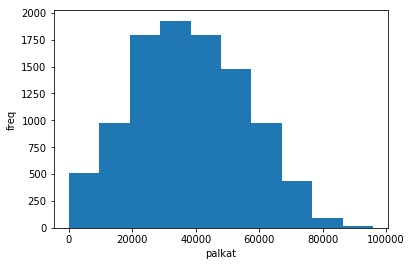

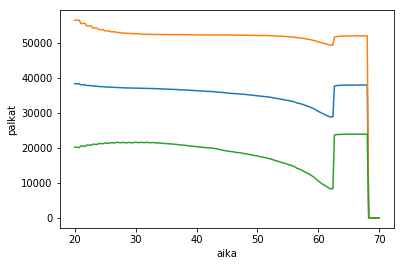

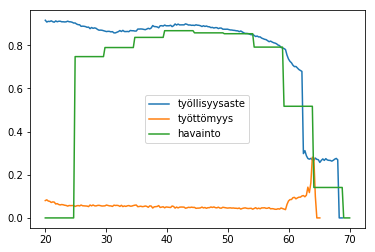

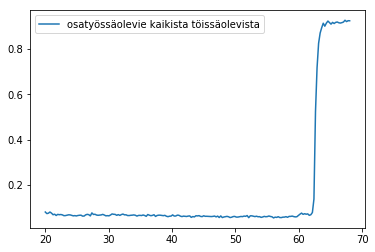

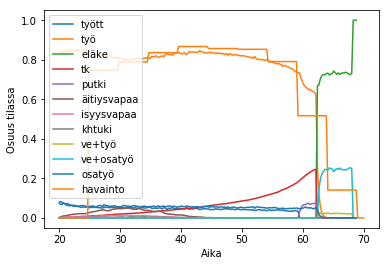

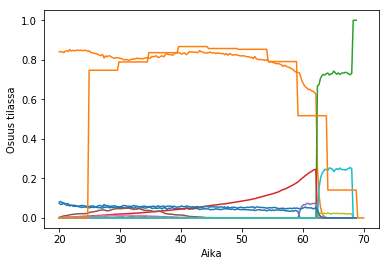

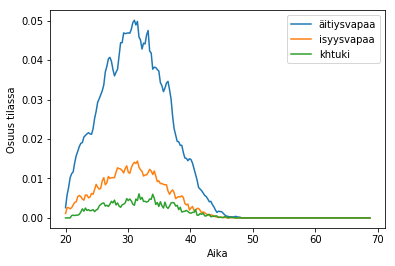

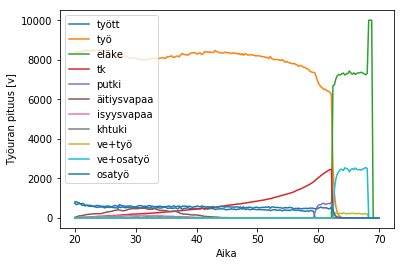

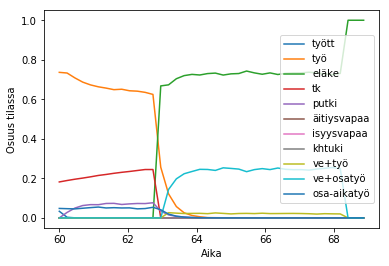

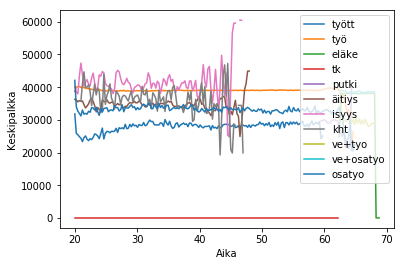

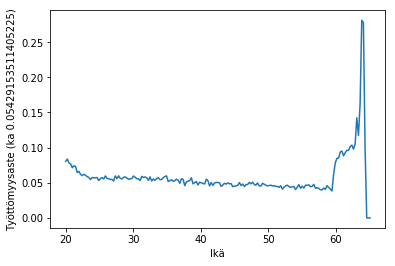

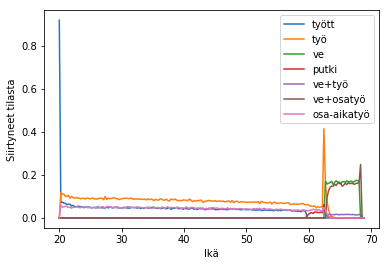

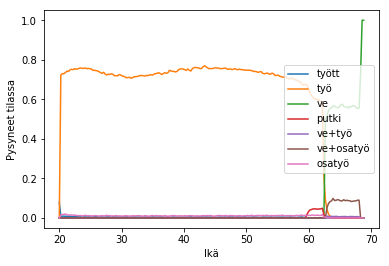

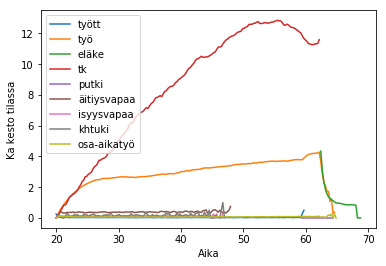

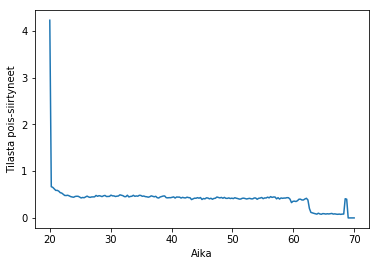

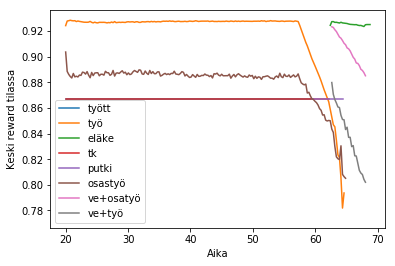

No handles with labels found to put in legend.


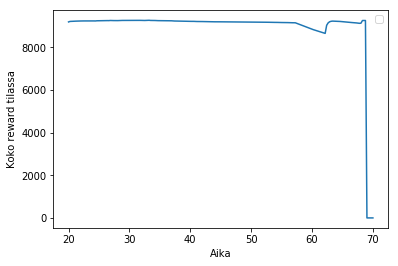

Yhteensä reward 183.45914125300496


In [8]:
cc1_350=Lifecycle(EK=False,minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350)
cc1_350.run_RL(train=True,steps=25_000_000,cont=False,rlmodel='acktr',save='50_short',pop=pop_size,start_from='perusmalli2')

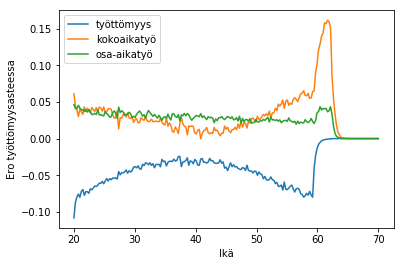

Työllisyysvaikutus noin 27943.0 htv ja 38586.0 työllistä (osatyö=0.5 htv)





Pop 10006: 100%|██████████| 10000/10000 [12:44<00:00, 12.86 p/s]

In [9]:
cc1_350.compare_with(cc1)